# - The project :: Income-Person-Prediction-Project
*****************************************************************
<img src="images/project.jpg" />


* Table of Contetnt ::
************************************************
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#Wrangling">Exploratory Data Analysis (EDA)</a></li>
<li><a href="#visualize">Data_Visualization_Process</a></li>
<li><a href="#ETl">ETl_Process</a></li>
<li><a href="#Prepration">Data_Prepration</a></li>
<li><a href="#Model">Bulid_ML_Model</a></li>
<li><a href="#Evaluation">Evaluate_Model</a></li>
<li><a href="#Save">Save_Model</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<img src="images/data.jpg" />


* Domain-Knowledge ::
    * Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. Size of training set: 10683 records.

        
<img src="images/present.gif" />

    


# Prediction Flight-Fare-Price
***********************************
        
<img src="images/process.gif" />

* Importing requried liberaries and Frameworks  ::

In [1]:
# Importing Liberaries and Framworks ::
import numpy     as np      # Apply Linear_Algebra operations and deal with arrays.
import pandas    as pd      # For Loading diff formats of data and Apply Wrangling and Mainpulating on data
import seaborn   as sns     # For Visualizing data
import warnings  as w       # For Ignoring any Warning
import missingno as mno     # Presnt Precentage of Nan Values
import datasist  as ds      # For Apply EDA and Visualization Using Simple Implementation
import matplotlib.pyplot as plt # For Set Plots , Charts and Maps Labels and Title  
import pandas_profiling  as pp  # To get describtion file of data


* Set some instructions

In [2]:
# To Make Matplotlib apply on any Version
%matplotlib inline      
# To ignore any Warning notification.
w.filterwarnings("ignore") 
# To Set Figsize of Plots , Charts and Maps
sns.set( rc = {"figure.figsize" : [50 , 35]} , font_scale=3.5)

In [3]:
# Loading dataset ::
df = pd.read_excel("Data_Train.xlsx"  , engine='openpyxl')
df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

* from thae result above we can see that ::
*********************************************************
* We have 10683  record of data.
* we have 11  features related Income.
* Our-Target Price that we will predict it usin ML Models.

*******************************************************
# Features of Flight-Fare data :
*******************************************************

* Airline      ::  The name of the airline.
    
* Date_of_Journey      ::  The date of the journey
* Source      ::  The source from which the service begins.
* Destination ::  The destination where the service ends.

* Route   ::   The route taken by the flight to reach the destination.

* Dep_Time   :: The time when the journey starts from the source..

* Arrival_Time  :: Time of arrival at the destination.
* Duration :: Total duration of the flight.
* Total_Stops :: Total stops between the source and destination.
* Additional_Info :: Additional information about the flight
* Price :: The price of the ticket which our target.


*******************************
 


<p id="Wrangling">Exploratory data analysis</p>

* *EDA Task* ::
*******************************
 *  It one of the most important phase of data scientist life cycle which we apply some statistical oprations toidentify the Behaviour of data  to extract meaningful knowledge , insights and vesion from that data to help steckholders to make more efficient decision which improve and enhance our Buesines.

* Statistical analysis Process ::

In [4]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


* from the features data dtype we see date as object dtype on that case we will casting it into datetime dtype and apply feature-engineering technices to extract day , month , weekday .

* and we found Duration feature as object dtype insted of intger dtype.
* We will drop Date_of_Journey Becouse we generate anouther features bsed on it.
* we will drop Route feature  Becouse we already have Arrival_Time feature.

In [7]:
df["Date"] = pd.to_datetime(df["Date_of_Journey"] , errors="coerce")
df.drop("Date_of_Journey" , axis=1 , inplace=True)
df.drop("Route" , axis=1 , inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Source           10683 non-null  object        
 2   Destination      10683 non-null  object        
 3   Dep_Time         10683 non-null  object        
 4   Arrival_Time     10683 non-null  object        
 5   Duration         10683 non-null  object        
 6   Total_Stops      10682 non-null  object        
 7   Additional_Info  10683 non-null  object        
 8   Price            10683 non-null  int64         
 9   Date             10683 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 834.7+ KB


In [9]:
df["Day"]     = df["Date"].dt.day
df["Month"]   = df["Date"].dt.month
df["Weekday"] = df["Date"].dt.weekday

In [10]:
df[["Day" , "Month" , "Weekday"]]

Day  Month  Weekday
0       24      3        6
1        5      1        5
2        6      9        4
3        5     12        3
4        3      1        3
...    ...    ...      ...
10678    4      9        2
10679   27      4        5
10680   27      4        5
10681    3      1        3
10682    5      9        3

[10683 rows x 3 columns]

In [11]:
# Converting duration into minutes
def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return test
df['Duration'] = df['Duration'].apply(duration)
df["Duration"] = df["Duration"].astype(int)

* Extracting whether its a morning,evening,night or afternoon flight from departure time & arrival time of the flight

In [12]:
def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
df['Dep_Time'] = df['Dep_Time'].apply(deparrtime)
df['Arrival_Time'] = df['Arrival_Time'].apply(deparrtime)

In [13]:
df["Total_Stops"].fillna(df["Total_Stops"].mode()[0] , inplace = True)

In [14]:
# Converting total_stops to 0,1,2,3 and so on

def stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        x.strip()
        stps=x.split(' ')[0]
        x=stps
    return x
df['Total_Stops']=df['Total_Stops'].apply(stops)

In [15]:
pd.options.mode.chained_assignment = None 
for i in range(df.shape[0]):
    if(df.iloc[i]['Additional_Info']=='No info'):
        df.iloc[i]['Additional_Info']='No Info' 

df.head(2)

Airline    Source Destination Dep_Time Arrival_Time  Duration  \
0     IndiGo  Banglore   New Delhi    Night        Night       170   
1  Air India   Kolkata    Banglore  Morning    Afternoon       445   

  Total_Stops Additional_Info  Price       Date  Day  Month  Weekday  
0           0         No info   3897 2019-03-24   24      3        6  
1           2         No info   7662 2019-01-05    5      1        5

Airline            0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Day                0
Month              0
Weekday            0
dtype: int64

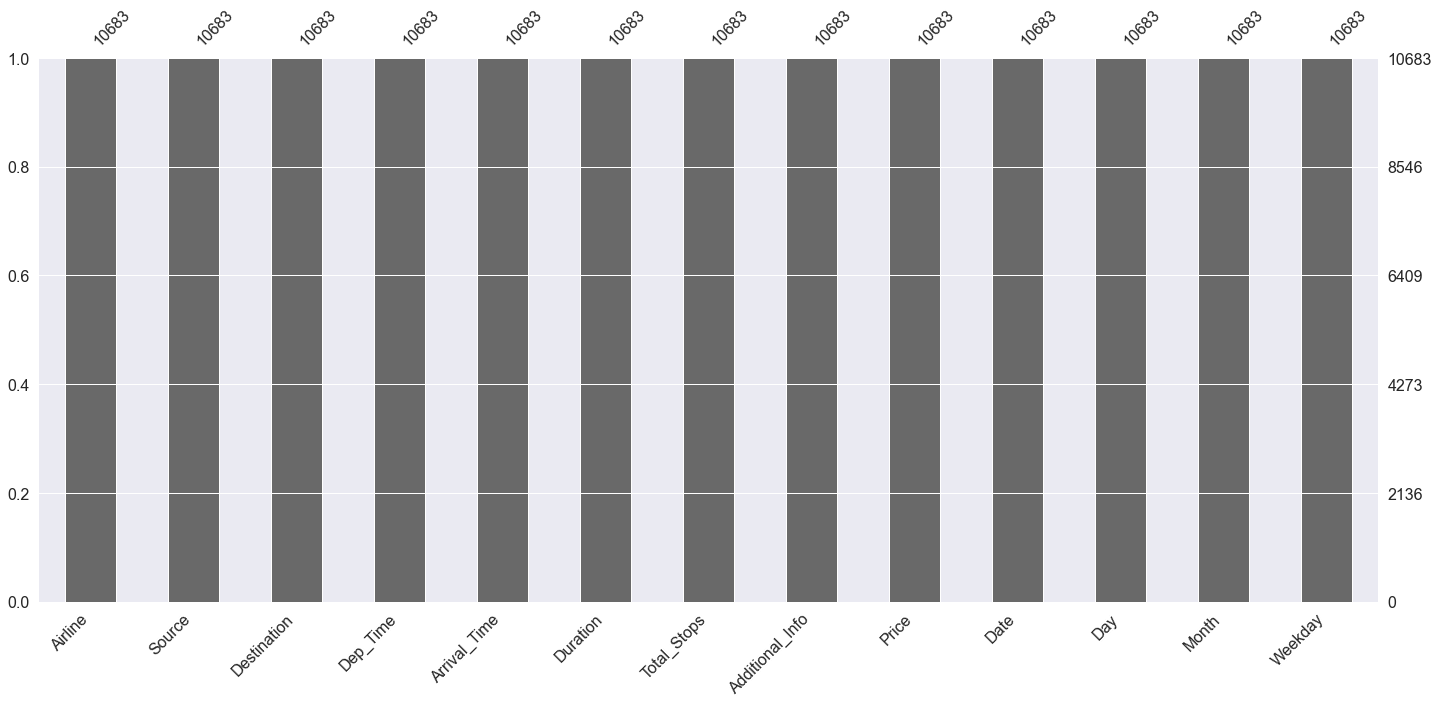

In [16]:
# Investigate Data not include null values ::
# Let's take a look at the presence of missing values, so as not to face unpleasant surprises in the future.


mno.bar(df)
df.isna().sum()

In [17]:
# identify the unique data values and its values count ::
for col in df.columns :
    print(f"The Col :: ({col})\n\nThe Col _ ({col}) _Unique_values :: {df[col].unique()}\n\n\
The Col _ ({col})_Value_counts :: \n\n{df[col].value_counts()}\n\n-----------\n-----------\n")

The Col :: (Airline)

The Col _ (Airline) _Unique_values :: ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']

The Col _ (Airline)_Value_counts :: 

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

-----------
-----------

The Col :: (Source)

The Col _ (Source) _Unique_values :: ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']

The Col _ (Source)_Value_counts :: 

Delh

In [18]:
# Present the Statistical Analysis describtion of Numerical_data ::
df.describe(include=["number"])

Duration         Price           Day         Month       Weekday
count  10683.000000  10683.000000  10683.000000  10683.000000  10683.000000
mean     643.120846   9087.064121     12.682205      5.534775      2.892352
std      507.835322   4611.359167      8.803701      2.987489      1.836058
min       75.000000   1759.000000      3.000000      1.000000      0.000000
25%      170.000000   5277.000000      5.000000      3.000000      1.000000
50%      520.000000   8372.000000      6.000000      5.000000      3.000000
75%      930.000000  12373.000000     21.000000      6.000000      4.000000
max     2860.000000  79512.000000     27.000000     12.000000      6.000000

In [19]:
# present the Statistical Analysis description of Categorical_data ::
df.describe(include="object")

Airline Source Destination Dep_Time Arrival_Time Total_Stops  \
count         10683  10683       10683    10683        10683       10683   
unique           12      5           6        4            4           5   
top     Jet Airways  Delhi      Cochin  Morning        Night           1   
freq           3849   4537        4537     4332         3650        5626   

       Additional_Info  
count            10683  
unique              10  
top            No info  
freq              8345

In [20]:
# Present nuniques :: To identifing the duplicaties data
df.nunique()

Airline              12
Source                5
Destination           6
Dep_Time              4
Arrival_Time          4
Duration            367
Total_Stops           5
Additional_Info      10
Price              1870
Date                 40
Day                   9
Month                 7
Weekday               7
dtype: int64

In [21]:
# check data include duplicates record or not
df.duplicated().sum()


310

In [22]:
# Checking dtypes of dataset.
df.dtypes

Airline                    object
Source                     object
Destination                object
Dep_Time                   object
Arrival_Time               object
Duration                    int32
Total_Stops                object
Additional_Info            object
Price                       int64
Date               datetime64[ns]
Day                         int64
Month                       int64
Weekday                     int64
dtype: object

* Wrangling and Mainplluting data.

In [23]:
# Get The Record Of the Person who max Price ::
df[df["Price"] == df["Price"].max()]

Airline    Source Destination Dep_Time Arrival_Time  \
2924  Jet Airways Business  Banglore   New Delhi  Morning    Afternoon   

      Duration Total_Stops Additional_Info  Price       Date  Day  Month  \
2924       340           1  Business class  79512 2019-01-03    3      1   

      Weekday  
2924        3

In [24]:
# Get The Record of the Min Price ::
df[df["Price"] == df["Price"].min()]

Airline  Source Destination Dep_Time Arrival_Time  Duration  \
4066   SpiceJet  Mumbai   Hyderabad    Night        Night        85   
4274   SpiceJet  Mumbai   Hyderabad    Night        Night        85   
4839   SpiceJet  Mumbai   Hyderabad    Night        Night        90   
10513  SpiceJet  Mumbai   Hyderabad  Morning      Morning        80   

      Total_Stops Additional_Info  Price       Date  Day  Month  Weekday  
4066            0         No info   1759 2019-03-21   21      3        3  
4274            0         No info   1759 2019-03-27   27      3        2  
4839            0         No info   1759 2019-03-04    4      3        0  
10513           0         No info   1759 2019-03-27   27      3        2

In [25]:
# grouped data ased on Airline feature and get col describtion ::
df.groupby("Airline").describe().transpose()

Airline             Air Asia     Air India         GoAir        IndiGo  \
Duration count    319.000000   1752.000000    194.000000   2053.000000   
         mean     348.275862    943.421804    298.969072    285.406722   
         std      271.237275    604.195715    136.836838    218.846252   
         min      150.000000     75.000000    155.000000     85.000000   
         25%      155.000000    320.000000    175.000000    155.000000   
         50%      170.000000    955.000000    310.000000    175.000000   
         75%      500.000000   1440.000000    370.000000    320.000000   
         max      955.000000   2480.000000    555.000000    985.000000   
Price    count    319.000000   1752.000000    194.000000   2053.000000   
         mean    5590.260188   9611.210616   5861.056701   5673.682903   
         std     2027.362290   3900.952942   2703.585767   2264.142168   
         min     3383.000000   2050.000000   3398.000000   2227.000000   
         25%     4282.000000   6896.000000   3898.000000   4226.000000   
         50%     5162.000000   9443.000000   5135.000000   5000.000000   
         75%     6451.000000  12219.000000   6811.250000   6494.000000   
         max    13774.000000  31945.000000  22794.000000  22153.000000   
Day      count    319.000000   1752.000000    194.000000   2053.000000   
         mean      13.141066     11.937785     12.835052     12.921578   
         std        8.751038      8.645378      8.938107      8.914702   
         min        3.000000      3.000000      3.000000      3.000000   
         25%        5.000000      5.000000      5.000000      5.000000   
         50%       15.000000      6.000000      6.000000      6.000000   
         75%       21.000000     21.000000     21.000000     21.000000   
         max       27.000000     27.000000     27.000000     27.000000   
Month    count    319.000000   1752.000000    194.000000   2053.000000   
         mean       5.545455      5.533105      5.149485      5.306868   
         std        2.949838      3.077718      2.812504      2.871575   
         min        1.000000      1.000000      1.000000      1.000000   
         25%        3.000000      3.000000      3.000000      3.000000   
         50%        5.000000      5.000000      5.000000      5.000000   
         75%        6.000000      6.000000      6.000000      6.000000   
         max       12.000000     12.000000     12.000000     12.000000   
Weekday  count    319.000000   1752.000000    194.000000   2053.000000   
         mean       2.956113      2.929795      3.020619      2.877740   
         std        1.849176      1.831317      1.960646      1.901358   
         min        0.000000      0.000000      0.000000      0.000000   
         25%        2.000000      1.000000      2.000000      1.000000   
         50%        3.000000      3.000000      3.000000      3.000000   
         75%        4.000000      4.000000      5.000000      4.000000   
         max        6.000000      6.000000      6.000000      6.000000   

Airline          Jet Airways  Jet Airways Business  Multiple carriers  \
Duration count   3849.000000              6.000000        1196.000000   
         mean     849.733697            386.666667         625.769231   
         std      507.925442             96.884811         156.407344   
         min       80.000000            280.000000         375.000000   
         25%      435.000000            310.000000         480.000000   
         50%      800.000000            370.000000         615.000000   
         75%     1295.000000            475.000000         750.000000   
         max     2860.000000            500.000000         935.000000   
Price    count   3849.000000              6.000000        1196.000000   
         mean   11643.923357          58358.666667       10902.678094   
         std     4258.940578          11667.596748        3721.234997   
         min     1840.000000          46490.000000        5797.000000   
         25%    

In [26]:
# grouped data ased on Source feature and get col describtion ::
df.groupby("Source").describe().transpose()

Source              Banglore       Chennai         Delhi       Kolkata  \
Duration count   2197.000000    381.000000   4537.000000   2871.000000   
         mean     376.329085    139.619423    817.985453    747.248346   
         std      405.817172      5.018339    460.672096    522.312455   
         min      155.000000    135.000000    170.000000    140.000000   
         25%      170.000000    135.000000    460.000000    170.000000   
         50%      175.000000    140.000000    705.000000    700.000000   
         75%      370.000000    140.000000   1125.000000   1177.500000   
         max     2420.000000    165.000000   2860.000000   2480.000000   
Price    count   2197.000000    381.000000   4537.000000   2871.000000   
         mean    8017.464269   4789.892388  10539.439057   9158.389411   
         std     5964.303079   2190.219021   3781.948512   3741.997070   
         min     3257.000000   3145.000000   3876.000000   3480.000000   
         25%     4544.000000   3597.000000   7202.000000   5192.000000   
         50%     6121.000000   3850.000000  10262.000000   9345.000000   
         75%     8714.000000   5277.000000  13344.000000  12681.000000   
         max    79512.000000  19630.000000  52285.000000  31945.000000   
Day      count   2197.000000    381.000000   4537.000000   2871.000000   
         mean      11.653619     13.241470     13.829623     11.690003   
         std        8.660501      8.791710      9.159031      8.094135   
         min        3.000000      3.000000      3.000000      3.000000   
         25%        4.000000      5.000000      6.000000      5.000000   
         50%        6.000000     15.000000     15.000000      6.000000   
         75%       21.000000     21.000000     21.000000     21.000000   
         max       27.000000     27.000000     27.000000     27.000000   
Month    count   2197.000000    381.000000   4537.000000   2871.000000   
         mean       5.164315      5.301837      5.562707      5.848137   
         std        3.190354      2.895681      2.644435      3.293949   
         min        1.000000      1.000000      1.000000      1.000000   
         25%        3.000000      3.000000      3.000000      3.000000   
         50%        4.000000      5.000000      5.000000      5.000000   
         75%        6.000000      6.000000      6.000000      9.000000   
         max       12.000000     12.000000     12.000000     12.000000   
Weekday  count   2197.000000    381.000000   4537.000000   2871.000000   
         mean       2.740100      2.855643      2.744765      3.326715   
         std        1.950970      1.848940      1.884123      1.546440   
         min        0.000000      0.000000      0.000000      0.000000   
         25%        1.000000      1.000000      1.000000      2.000000   
         50%        3.000000      3.000000      3.000000      3.000000   
         75%        4.000000      4.000000      4.000000      4.000000   
         max        6.000000      6.000000      6.000000      6.000000   

Source                Mumbai  
Duration count    697.000000  
         mean     192.137733  
         std      345.357791  
         min       75.000000  
         25%       85.000000  
         50%       90.000000  
         75%       90.000000  
         max     2245.000000  
Price    count    697.000000  
         mean    5059.708752  
         std     4100.504092  
         min     1759.000000  
         25%     2647.000000  
         50%     3342.000000  
         75%     5678.000000  
         max    25139.000000  
Day      count    697.000000  
         mean      12.236729  
         std        8.800465  
         min        3.000000  
         25%        5.000000  
         50%        6.000000  
         75%       21.000000  
         max       27.000000  
Month    count    697.000000  
         mean       5.357245  
         std        3.011006  
         min        1.000000  
         25%        3.000000  
         50%        5.000000  
    

In [27]:
# grouped data ased on Destination feature and get col describtion ::
df.groupby("Destination").describe().transpose()

Destination         Banglore        Cochin        Delhi     Hyderabad  \
Duration count   2871.000000   4537.000000  1265.000000    697.000000   
         mean     747.248346    817.985453   171.695652    192.137733   
         std      522.312455    460.672096     6.595682    345.357791   
         min      140.000000    170.000000   155.000000     75.000000   
         25%      170.000000    460.000000   170.000000     85.000000   
         50%      700.000000    705.000000   170.000000     90.000000   
         75%     1177.500000   1125.000000   175.000000     90.000000   
         max     2480.000000   2860.000000   185.000000   2245.000000   
Price    count   2871.000000   4537.000000  1265.000000    697.000000   
         mean    9158.389411  10539.439057  5143.918577   5059.708752   
         std     3741.997070   3781.948512  1346.487105   4100.504092   
         min     3480.000000   3876.000000  3257.000000   1759.000000   
         25%     5192.000000   7202.000000  4030.000000   2647.000000   
         50%     9345.000000  10262.000000  4823.000000   3342.000000   
         75%    12681.000000  13344.000000  5911.000000   5678.000000   
         max    31945.000000  52285.000000  8541.000000  25139.000000   
Day      count   2871.000000   4537.000000  1265.000000    697.000000   
         mean      11.690003     13.829623    12.958893     12.236729   
         std        8.094135      9.159031     8.613164      8.800465   
         min        3.000000      3.000000     4.000000      3.000000   
         25%        5.000000      6.000000     5.000000      5.000000   
         50%        6.000000     15.000000     6.000000      6.000000   
         75%       21.000000     21.000000    21.000000     21.000000   
         max       27.000000     27.000000    27.000000     27.000000   
Month    count   2871.000000   4537.000000  1265.000000    697.000000   
         mean       5.848137      5.562707     5.607115      5.357245   
         std        3.293949      2.644435     2.967884      3.011006   
         min        1.000000      1.000000     1.000000      1.000000   
         25%        3.000000      3.000000     4.000000      3.000000   
         50%        5.000000      5.000000     5.000000      5.000000   
         75%        9.000000      6.000000     6.000000      6.000000   
         max       12.000000     12.000000    12.000000     12.000000   
Weekday  count   2871.000000   4537.000000  1265.000000    697.000000   
         mean       3.326715      2.744765     2.766008      2.563845   
         std        1.546440      1.884123     1.794140      1.939979   
         min        0.000000      0.000000     0.000000      0.000000   
         25%        2.000000      1.000000     1.000000      1.000000   
         50%        3.000000      3.000000     3.000000      3.000000   
         75%        4.000000      4.000000     4.000000      4.000000   
         max        6.000000      6.000000     6.000000      6.000000   

Destination          Kolkata     New Delhi  
Duration count    381.000000    932.000000  
         mean     139.619423    654.077253  
         std        5.018339    504.255794  
         min      135.000000    155.000000  
         25%      135.000000    175.000000  
         50%      140.000000    487.500000  
         75%      140.000000    965.000000  
         max      165.000000   2420.000000  
Price    count    381.000000    932.000000  
         mean    4789.892388  11917.716738  
         std     2190.219021   7416.086298  
         min     3145.000000   3383.000000  
         25%     3597.000000   7240.000000  
         50%     3850.000000  10898.500000  
         75%     5277.000000  13817.000000  
         max    19630.000000  79512.000000  
Day      count    381.000000    932.000000  
         mean      13.241470      9.881974  
         std        8.791710      8.410585  
         min        3.000000      3.000000  
         25%        5.000000      3.000000  
         50%    

In [28]:
# grouped data ased on Dep_Time feature and get col describtion ::
df.groupby("Dep_Time").describe().transpose()

Dep_Time           Afternoon       Evening       Morning         Night
Duration count   2017.000000   2829.000000   4332.000000   1505.000000
         mean     573.163114    720.943796    671.172669    509.847176
         std      471.796460    536.546770    508.872251    456.421248
         min       80.000000     75.000000     80.000000     80.000000
         25%      175.000000    180.000000    180.000000    165.000000
         50%      440.000000    570.000000    590.000000    315.000000
         75%      830.000000   1185.000000    900.000000    810.000000
         max     2115.000000   2860.000000   2820.000000   1760.000000
Price    count   2017.000000   2829.000000   4332.000000   1505.000000
         mean    9146.179970   9369.306115   9190.533703   8179.469767
         std     4635.293056   4479.026502   4521.381885   4962.764104
         min     1965.000000   2050.000000   1759.000000   1759.000000
         25%     5510.000000   5797.000000   5694.000000   4282.000000
         50%     8016.000000   8855.000000   8452.000000   6307.000000
         75%    12646.000000  12616.000000  12328.250000  11260.000000
         max    36983.000000  54826.000000  79512.000000  54826.000000
Day      count   2017.000000   2829.000000   4332.000000   1505.000000
         mean      12.979177     12.404737     12.677978     12.817940
         std        8.798424      8.715923      8.792140      8.998896
         min        3.000000      3.000000      3.000000      3.000000
         25%        5.000000      5.000000      5.000000      5.000000
         50%        6.000000      6.000000      6.000000      6.000000
         75%       21.000000     21.000000     21.000000     21.000000
         max       27.000000     27.000000     27.000000     27.000000
Month    count   2017.000000   2829.000000   4332.000000   1505.000000
         mean       5.488349      5.639095      5.491921      5.524252
         std        2.891900      3.096886      2.959775      2.981700
         min        1.000000      1.000000      1.000000      1.000000
         25%        3.000000      3.000000      3.000000      3.000000
         50%        5.000000      5.000000      5.000000      5.000000
         75%        6.000000      6.000000      6.000000      6.000000
         max       12.000000     12.000000     12.000000     12.000000
Weekday  count   2017.000000   2829.000000   4332.000000   1505.000000
         mean       2.865642      2.936727      2.905586      2.806645
         std        1.871702      1.781136      1.832541      1.897075
         min        0.000000      0.000000      0.000000      0.000000
         25%        1.000000      2.000000      1.000000      1.000000
         50%        3.000000      3.000000      3.000000      3.000000
         75%        4.000000      4.000000      4.000000      4.000000
         max        6.000000      6.000000      6.000000      6.000000

In [29]:
# grouped data ased on Arrival_Time feature and get col describtion ::
df.groupby("Arrival_Time").describe().transpose()

Arrival_Time       Afternoon       Evening       Morning         Night
Duration count   1980.000000   3078.000000   1975.000000   3650.000000
         mean     569.505051    743.861274    653.726582    592.363014
         std      523.401083    538.815847    525.568888    444.980160
         min       80.000000     75.000000     80.000000     80.000000
         25%      170.000000    305.000000    165.000000    175.000000
         50%      320.000000    600.000000    640.000000    505.000000
         75%      980.000000   1263.750000   1090.000000    845.000000
         max     1995.000000   2860.000000   1675.000000   2820.000000
Price    count   1980.000000   3078.000000   1975.000000   3650.000000
         mean    8490.006061  10053.562378   8504.131139   8911.334247
         std     4934.591495   4130.615713   4682.528750   4647.423450
         min     1965.000000   2050.000000   1759.000000   1759.000000
         25%     4804.000000   6961.000000   4729.000000   5386.000000
         50%     7229.000000  10231.000000   7648.000000   7648.000000
         75%    11510.750000  12692.000000  11432.000000  12689.250000
         max    79512.000000  36983.000000  54826.000000  54826.000000
Day      count   1980.000000   3078.000000   1975.000000   3650.000000
         mean      12.815657     12.947044     11.880000     12.820548
         std        8.827289      8.841845      8.563327      8.865541
         min        3.000000      3.000000      3.000000      3.000000
         25%        5.000000      5.000000      5.000000      5.000000
         50%        6.000000      6.000000      6.000000      6.000000
         75%       21.000000     21.000000     21.000000     21.000000
         max       27.000000     27.000000     27.000000     27.000000
Month    count   1980.000000   3078.000000   1975.000000   3650.000000
         mean       5.471212      5.600065      5.563544      5.498630
         std        3.048319      2.937253      3.136685      2.912466
         min        1.000000      1.000000      1.000000      1.000000
         25%        3.000000      3.000000      3.000000      3.000000
         50%        5.000000      5.000000      5.000000      5.000000
         75%        6.000000      6.000000      6.000000      6.000000
         max       12.000000     12.000000     12.000000     12.000000
Weekday  count   1980.000000   3078.000000   1975.000000   3650.000000
         mean       2.945455      2.854451      2.870380      2.907397
         std        1.858310      1.805527      1.823079      1.856211
         min        0.000000      0.000000      0.000000      0.000000
         25%        1.000000      1.000000      1.000000      1.000000
         50%        3.000000      3.000000      3.000000      3.000000
         75%        4.000000      4.000000      4.000000      4.000000
         max        6.000000      6.000000      6.000000      6.000000

In [30]:
# grouped data ased on Duration feature and get col describtion ::
df.groupby("Duration").describe().transpose()

Duration               75            80            85            90    \
Price   count     24.000000     61.000000    135.000000    386.000000   
        mean    3944.333333   3286.377049   5011.162963   3721.484456   
        std     3028.131849   1468.076533   2571.991485   1938.385329   
        min     2050.000000   1759.000000   1759.000000   1759.000000   
        25%     2968.750000   2575.000000   3207.500000   2227.000000   
        50%     3100.000000   3100.000000   4995.000000   3100.000000   
        75%     3231.250000   3100.000000   5678.000000   4575.000000   
        max    15385.000000  12475.000000  17501.000000  16000.000000   
Day     count     24.000000     61.000000    135.000000    386.000000   
        mean      11.791667     14.524590     13.266667     13.339378   
        std        8.732643      8.982588      8.869030      8.562762   
        min        3.000000      3.000000      3.000000      3.000000   
        25%        4.750000      5.000000      5.000000      5.000000   
        50%        6.000000     18.000000     15.000000     15.000000   
        75%       18.750000     21.000000     21.000000     21.000000   
        max       27.000000     27.000000     27.000000     27.000000   
Month   count     24.000000     61.000000    135.000000    386.000000   
        mean       5.000000      4.344262      4.777778      5.243523   
        std        3.362194      2.670114      2.882440      2.856348   
        min        1.000000      1.000000      1.000000      1.000000   
        25%        3.000000      3.000000      3.000000      3.000000   
        50%        5.000000      3.000000      3.000000      5.000000   
        75%        6.000000      6.000000      6.000000      6.000000   
        max       12.000000     12.000000     12.000000     12.000000   
Weekday count     24.000000     61.000000    135.000000    386.000000   
        mean       2.833333      2.819672      2.844444      2.847150   
        std        1.970801      2.061619      1.860295      1.847414   
        min        0.000000      0.000000      0.000000      0.000000   
        25%        1.000000      1.000000      1.000000      1.000000   
        50%        3.000000      3.000000      3.000000      3.000000   
        75%        4.000000      4.000000      4.000000      4.000000   
        max        6.000000      6.000000      6.000000      6.000000   

Duration              95            135           140          145   \
Price   count    15.000000    135.000000    238.000000    98.000000   
        mean   2276.133333   4452.066667   4849.621849  4268.459184   
        std     142.833003   1911.077020   2282.860521  1016.896544   
        min    2227.000000   3145.000000   3332.000000  3384.000000   
        25%    2227.000000   3543.000000   3597.000000  3841.000000   
        50%    2227.000000   3687.000000   3850.000000  3873.000000   
        75%    2227.000000   4667.000000   5277.000000  4174.000000   
        max    2754.000000  19630.000000  11982.000000  7900.000000   
Day     count    15.000000    135.000000    238.000000    98.000000   
        mean     12.800000     13.481481     13.516807    12.438776   
        std       8.921883      8.903171      8.765928     8.617970   
        min       4.000000      3.000000      3.000000     3.000000   
        25%       5.000000      5.000000      5.000000     5.000000   
        50%       6.000000     15.000000     15.000000     6.000000   
        75%      19.500000     21.000000     21.000000    21.000000   
        max      27.000000     27.000000     27.000000    27.000000   
Month   count    15.000000    135.000000    238.000000    98.000000   
        mean      5.333333      5.237037      5.243697     5.510204   
        std       3.498299      2.836877      2.783212     2.999123   
        min       1.000000      1.000000      1.000000     1.000000   
        25%       3.000000      3.000000      3.000000     3.000000   
        50%       5.000000  

In [31]:
# grouped data ased on Total_Stops feature and get col describtion ::
df.groupby("Total_Stops").describe().transpose()

Total_Stops                0             1             2             3  \
Duration count   3491.000000   5626.000000   1520.000000     45.000000   
         mean     150.084503    782.053857   1233.733553   1547.444444   
         std       32.189224    396.912953    460.067321    640.904565   
         min       75.000000    195.000000    150.000000    565.000000   
         25%      140.000000    465.000000    865.000000    835.000000   
         50%      160.000000    705.000000   1275.000000   1585.000000   
         75%      170.000000    975.000000   1560.000000   2280.000000   
         max      230.000000   1750.000000   2860.000000   2280.000000   
Price    count   3491.000000   5626.000000   1520.000000     45.000000   
         mean    5024.900315  10593.570032  12715.807895  13112.000000   
         std     2077.586642   4281.466692   3383.983396   2963.224265   
         min     1759.000000   3480.000000   4647.000000   8607.000000   
         25%     3858.000000   7480.000000  10676.000000  10703.000000   
         50%     4667.000000  10262.000000  12760.000000  12954.000000   
         75%     5678.000000  13364.000000  14237.000000  14960.000000   
         max    31945.000000  79512.000000  52285.000000  21829.000000   
Day      count   3491.000000   5626.000000   1520.000000     45.000000   
         mean      13.197365     12.298080     12.978947     10.933333   
         std        8.775993      8.759575      8.955869      8.985847   
         min        3.000000      3.000000      3.000000      3.000000   
         25%        5.000000      5.000000      5.000000      3.000000   
         50%       15.000000      6.000000      6.000000      6.000000   
         75%       21.000000     21.000000     21.000000     21.000000   
         max       27.000000     27.000000     27.000000     27.000000   
Month    count   3491.000000   5626.000000   1520.000000     45.000000   
         mean       5.267259      5.618557      5.826316      6.066667   
         std        2.909113      3.029615      2.943415      3.570078   
         min        1.000000      1.000000      1.000000      1.000000   
         25%        3.000000      3.000000      3.000000      3.000000   
         50%        5.000000      5.000000      6.000000      6.000000   
         75%        6.000000      6.000000      6.000000      9.000000   
         max       12.000000     12.000000     12.000000     12.000000   
Weekday  count   3491.000000   5626.000000   1520.000000     45.000000   
         mean       2.895445      2.886242      2.902632      3.066667   
         std        1.901503      1.802576      1.806212      1.887760   
         min        0.000000      0.000000      0.000000      0.000000   
         25%        1.000000      2.000000      2.000000      2.000000   
         50%        3.000000      3.000000      3.000000      3.000000   
         75%        4.000000      4.000000      4.000000      4.000000   
         max        6.000000      6.000000      6.000000      6.000000   

Total_Stops           4  
Duration count      1.0  
         mean    1770.0  
         std        NaN  
         min     1770.0  
         25%     1770.0  
         50%     1770.0  
         75%     1770.0  
         max     1770.0  
Price    count      1.0  
         mean   17686.0  
         std        NaN  
         min    17686.0  
         25%    17686.0  
         50%    17686.0  
         75%    17686.0  
         max    17686.0  
Day      count      1.0  
         mean       3.0  
         std        NaN  
         min        3.0  
         25%        3.0  
         50%        3.0  
         75%        3.0  
         max        3.0  
Month    count      1.0  
         mean       1.0  
         std        NaN  
         min        1.0  
         25%        1.0  
         50%        1.0  
         75%        1.0  
         max        1.0  
Weekday  count      1.0  
         mean       3.0  
         std        NaN  
         min        3.0  
   

In [32]:
# grouped data ased on Additional_Info feature and get col describtion ::
df.groupby("Additional_Info").describe().transpose()

Additional_Info  1 Long layover  1 Short layover  2 Long layover  \
Duration count        19.000000              1.0             1.0   
         mean        919.473684            875.0          1600.0   
         std         300.031918              NaN             NaN   
         min         485.000000            875.0          1600.0   
         25%         677.500000            875.0          1600.0   
         50%         890.000000            875.0          1600.0   
         75%        1127.500000            875.0          1600.0   
         max        1510.000000            875.0          1600.0   
Price    count        19.000000              1.0             1.0   
         mean      22109.631579          26743.0         26480.0   
         std        8040.051155              NaN             NaN   
         min        7744.000000          26743.0         26480.0   
         25%       14673.000000          26743.0         26480.0   
         50%       25735.000000          26743.0         26480.0   
         75%       27992.000000          26743.0         26480.0   
         max       31825.000000          26743.0         26480.0   
Day      count        19.000000              1.0             1.0   
         mean          4.105263              3.0             3.0   
         std           4.817730              NaN             NaN   
         min           3.000000              3.0             3.0   
         25%           3.000000              3.0             3.0   
         50%           3.000000              3.0             3.0   
         75%           3.000000              3.0             3.0   
         max          24.000000              3.0             3.0   
Month    count        19.000000              1.0             1.0   
         mean          1.263158              1.0             1.0   
         std           1.147079              NaN             NaN   
         min           1.000000              1.0             1.0   
         25%           1.000000              1.0             1.0   
         50%           1.000000              1.0             1.0   
         75%           1.000000              1.0             1.0   
         max           6.000000              1.0             1.0   
Weekday  count        19.000000              1.0             1.0   
         mean          2.842105              3.0             3.0   
         std           0.688247              NaN             NaN   
         min           0.000000              3.0             3.0   
         25%           3.000000              3.0             3.0   
         50%           3.000000              3.0             3.0   
         75%           3.000000              3.0             3.0   
         max           3.000000              3.0             3.0   

Additional_Info  Business class  Change airports  In-flight meal not included  \
Duration count         4.000000         7.000000                  1982.000000   
         mean        352.500000       960.714286                   847.093845   
         std          55.000000       499.478299                   492.489330   
         min         280.000000       435.000000                    80.000000   
         25%         325.000000       647.500000                   450.000000   
         50%         365.000000       725.000000                   800.000000   
         75%         392.500000      1250.000000                  1285.000000   
         max         400.000000      1770.000000                  2315.000000   
Price    count         4.000000         7.000000                  1982.000000   
         mean      56811.250000     16800.714286                  9471.834511   
         std       21381.667044      4449.728371                  2812.043362   
         min       28097.000000     13366.000000                  1840.000000   
         25%       49931.000000     13940.500000                  7757.000000   
         50%       59818.000000     15119.000000                 10262.000000

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Source           10683 non-null  object        
 2   Destination      10683 non-null  object        
 3   Dep_Time         10683 non-null  object        
 4   Arrival_Time     10683 non-null  object        
 5   Duration         10683 non-null  int32         
 6   Total_Stops      10683 non-null  object        
 7   Additional_Info  10683 non-null  object        
 8   Price            10683 non-null  int64         
 9   Date             10683 non-null  datetime64[ns]
 10  Day              10683 non-null  int64         
 11  Month            10683 non-null  int64         
 12  Weekday          10683 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(4), object(7)
memory usage: 1.0+ MB


In [34]:
Pivot_T1 = pd.pivot_table(df , index = "Airline" , columns = "Total_Stops" , values = "Price")
Pivot_T1

Total_Stops                                  0             1             2  \
Airline                                                                      
Air Asia                           4492.331492   7078.325581   6341.888889   
Air India                          5605.326139   9038.622921  12092.779101   
GoAir                              4726.173913   6884.676471           NaN   
IndiGo                             4731.174053   7104.717528   7507.526316   
Jet Airways                        6175.078652  12512.741223  13387.247467   
Jet Airways Business                       NaN  62844.250000  49387.500000   
Multiple carriers                          NaN  10711.316157  14809.395349   
Multiple carriers Premium economy          NaN  11418.846154           NaN   
SpiceJet                           3805.423881   6750.560811           NaN   
Trujet                                     NaN   4140.000000           NaN   
Vistara                            6293.954545   9641.148837           NaN   
Vistara Premium economy            8962.333333           NaN           NaN   

Total_Stops                                   3        4  
Airline                                                   
Air Asia                                    NaN      NaN  
Air India                          12208.054054  17686.0  
GoAir                                       NaN      NaN  
IndiGo                                      NaN      NaN  
Jet Airways                                 NaN      NaN  
Jet Airways Business                        NaN      NaN  
Multiple carriers                  17292.750000      NaN  
Multiple carriers Premium economy           NaN      NaN  
SpiceJet                                    NaN      NaN  
Trujet                                      NaN      NaN  
Vistara                                     NaN      NaN  
Vistara Premium economy                     NaN      NaN

In [35]:
Pivot_T1 = pd.pivot_table(df , index = "Destination" , columns = "Total_Stops" , values = "Price")
Pivot_T1

Total_Stops            0             1             2             3        4
Destination                                                                
Banglore     4556.055249  10477.414395  12036.125828  13151.272727      NaN
Cochin       6315.816901  10030.021971  12752.039533  12939.840000      NaN
Delhi        5143.918577           NaN           NaN           NaN      NaN
Hyderabad    3932.809984  12520.477273  16696.266667  16276.500000      NaN
Kolkata      4789.892388           NaN           NaN           NaN      NaN
New Delhi    7399.975610  14016.540925  13322.800000  12761.000000  17686.0

In [36]:
Pivot_T1 = pd.pivot_table(df , index = "Arrival_Time" , columns = "Total_Stops" , values = "Price")
Pivot_T1

Total_Stops             0             1             2             3        4
Arrival_Time                                                                
Afternoon     5035.321812  10335.353151  12942.432432  14966.333333  17686.0
Evening       5456.612857  11092.843105  12524.381958  11134.400000      NaN
Morning       4914.545018  10804.004505  12236.766393  12211.600000      NaN
Night         4829.175156  10160.788321  13041.599129  15059.352941      NaN

In [37]:
Pivot_T1 = pd.pivot_table(df , index = "Airline" , columns = "Destination" , values = "Price")
Pivot_T1

Destination                            Banglore        Cochin        Delhi  \
Airline                                                                      
Air Asia                            5012.320000   7804.175000  4265.577465   
Air India                          10357.324219  10000.068273  6045.166667   
GoAir                               7047.000000   6587.157895  4050.289855   
IndiGo                              5075.235955   7203.933333  4399.581967   
Jet Airways                        11717.565287  12642.593317  6412.954054   
Jet Airways Business                        NaN  49387.500000          NaN   
Multiple carriers                           NaN  10902.678094          NaN   
Multiple carriers Premium economy           NaN  11418.846154          NaN   
SpiceJet                            4642.883333   5916.356322  4012.839416   
Trujet                                      NaN           NaN          NaN   
Vistara                             9257.683060   6465.644444  5042.312977   
Vistara Premium economy                     NaN           NaN  5969.000000   

Destination                           Hyderabad      Kolkata     New Delhi  
Airline                                                                     
Air Asia                                    NaN          NaN   5791.944444  
Air India                           6260.051471  5895.640000  11045.575472  
GoAir                                       NaN          NaN   7532.333333  
IndiGo                              3659.816327  4538.766304   7312.828025  
Jet Airways                         6227.949772          NaN  15101.272727  
Jet Airways Business                        NaN          NaN  62844.250000  
Multiple carriers                           NaN          NaN           NaN  
Multiple carriers Premium economy           NaN          NaN           NaN  
SpiceJet                            2511.106557  3993.523438   6223.727273  
Trujet                              4140.000000          NaN           NaN  
Vistara                            12326.521739  7491.372093   8947.388889  
Vistara Premium economy                     NaN  9125.000000  11793.000000

In [38]:
Con_Matrix = df.corr()
Con_Matrix

Duration     Price       Day     Month   Weekday
Duration  1.000000  0.506495 -0.038541  0.055163  0.018037
Price     0.506495  1.000000 -0.165412  0.010700 -0.007761
Day      -0.038541 -0.165412  1.000000 -0.264899 -0.097052
Month     0.055163  0.010700 -0.264899  1.000000 -0.167990
Weekday   0.018037 -0.007761 -0.097052 -0.167990  1.000000

<p id="visualize"> Visualization-Process</p>

* Apply Data-Visualization Process ::
*******************************************
* visualization data one of the most important process on data scientist life cycle which we use some viualize element such (charts , plots ,maps) to identify the pattern , Trends and outliers on data.

Text(0.5, 1.0, 'Confusion_Matrix of data')

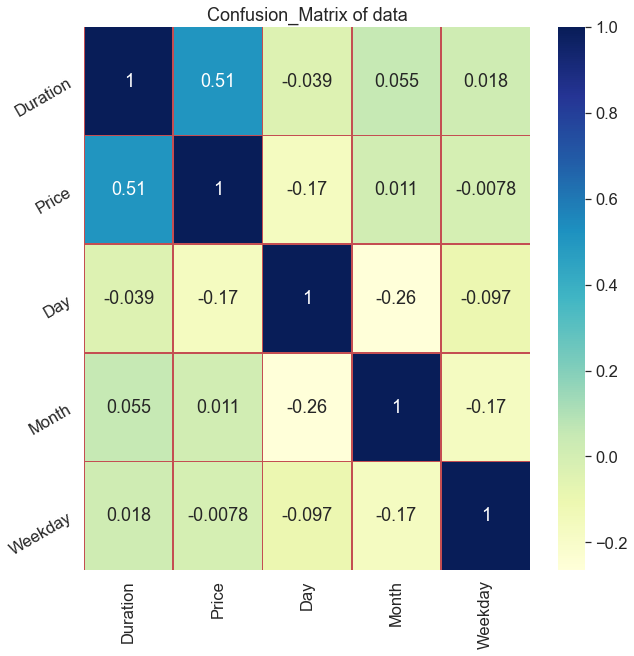

In [39]:
# Visualize The Feathure Correlations ::
sns.set( rc = {"figure.figsize" : [10 , 10]} , font_scale=1.5)
sns.heatmap(Con_Matrix , annot=True , cmap="YlGnBu" , linecolor="r" , linewidths=0.5)
plt.xticks(rotation = 90)
plt.yticks(rotation = 30)
plt.title("Confusion_Matrix of data")
# RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r

In [40]:
df.head(2)

Airline    Source Destination Dep_Time Arrival_Time  Duration  \
0     IndiGo  Banglore   New Delhi    Night        Night       170   
1  Air India   Kolkata    Banglore  Morning    Afternoon       445   

  Total_Stops Additional_Info  Price       Date  Day  Month  Weekday  
0           0         No info   3897 2019-03-24   24      3        6  
1           2         No info   7662 2019-01-05    5      1        5

In [41]:
# To Present species of Source ::
Sources = df["Source"].value_counts()
Sources

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

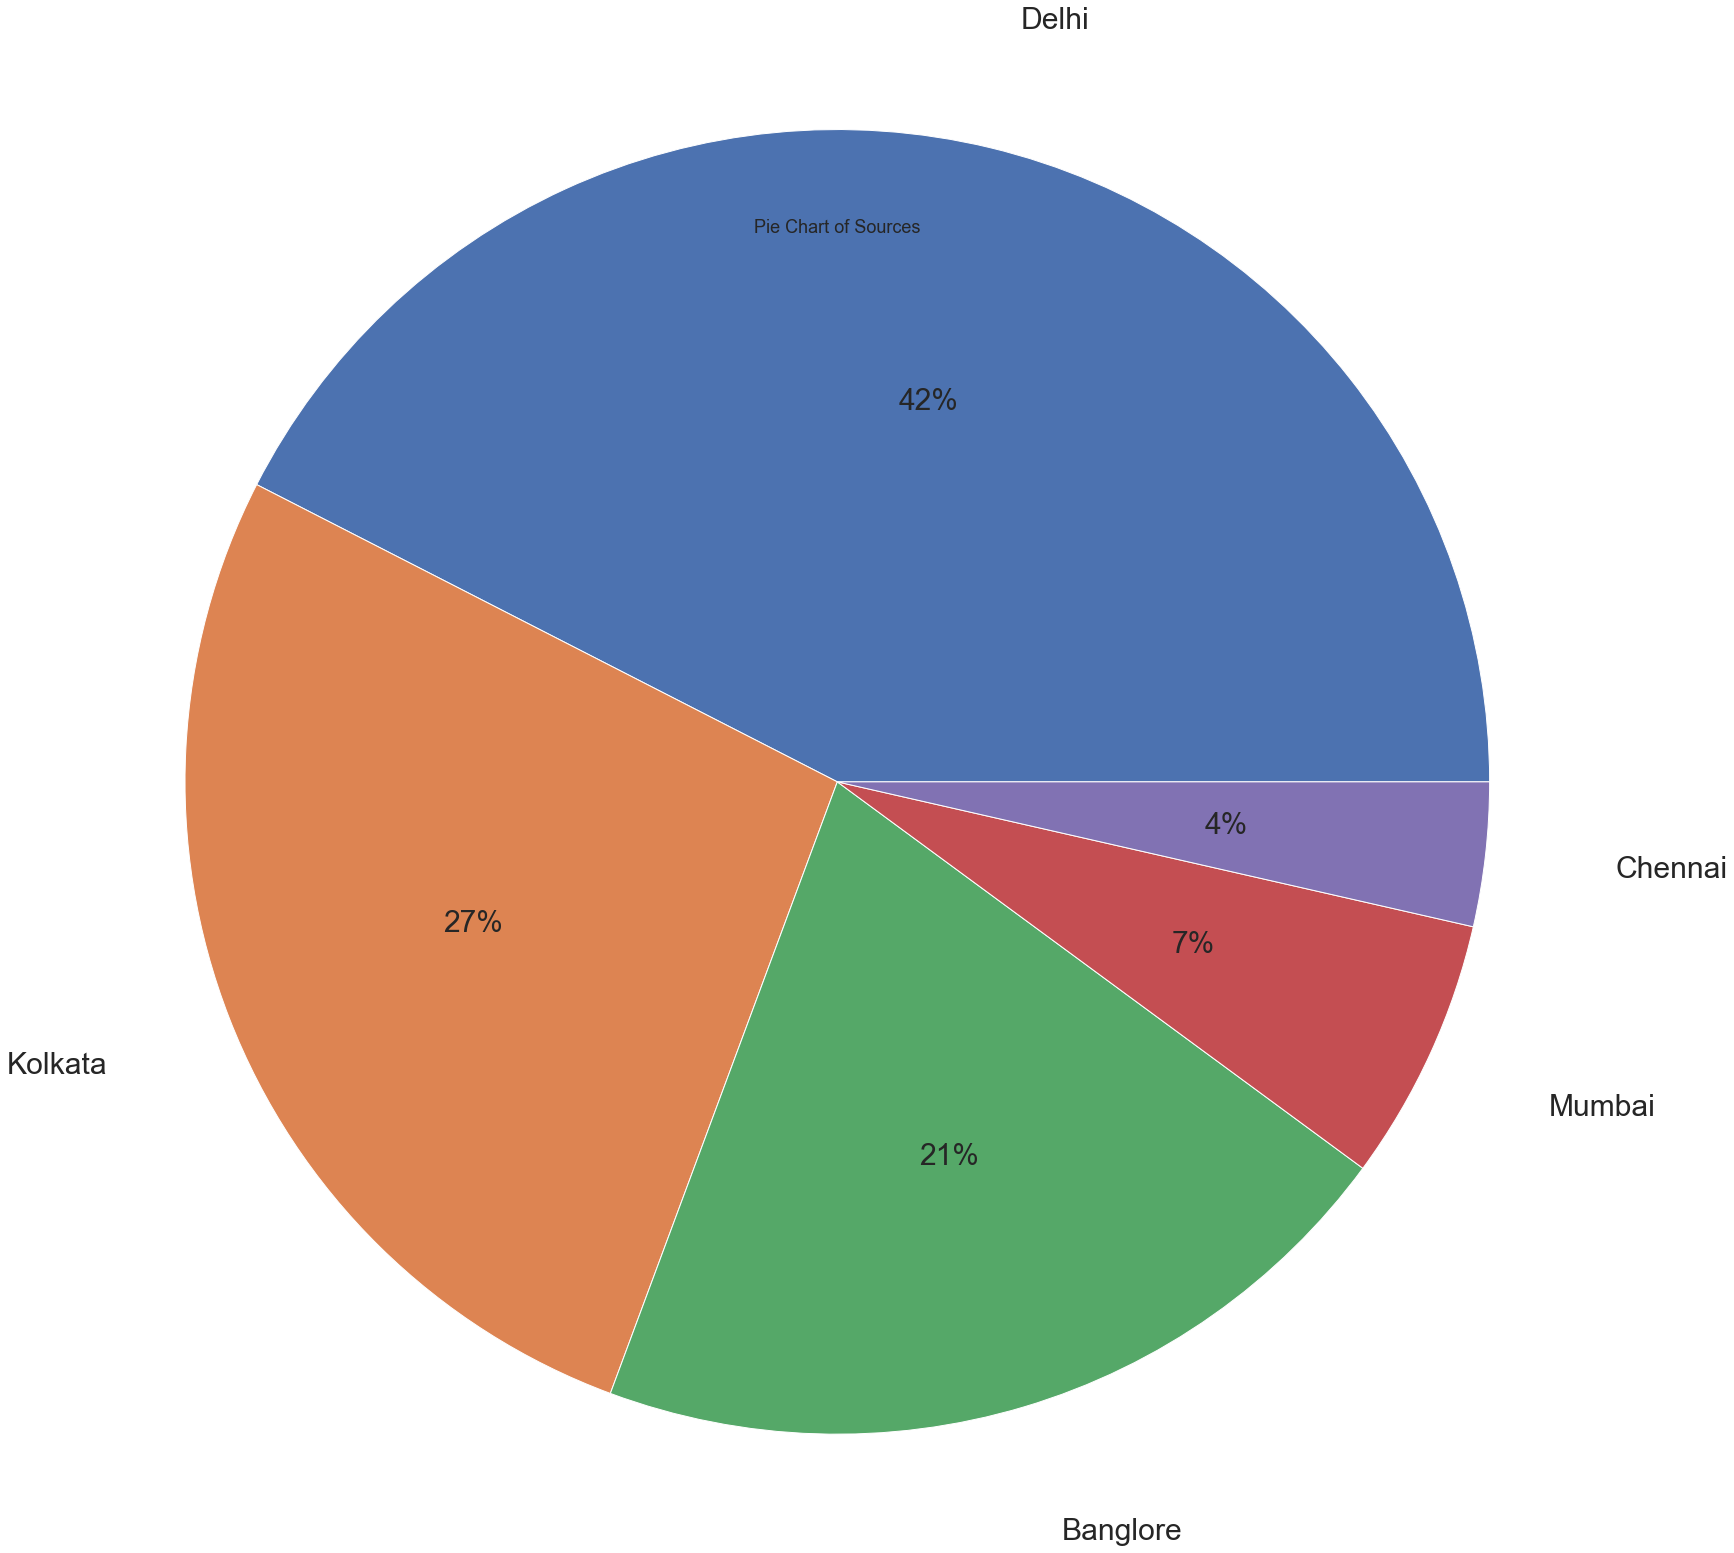

In [42]:
# Visualize Comparing sexs ::
sns.set( rc = {"figure.figsize" : [20 ,20]} , font_scale=1.5)
Sources.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of Sources")
plt.show()

In [43]:
# To Present species of Destination ::
Destinations = df["Destination"].value_counts()
Destinations

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Destinations')

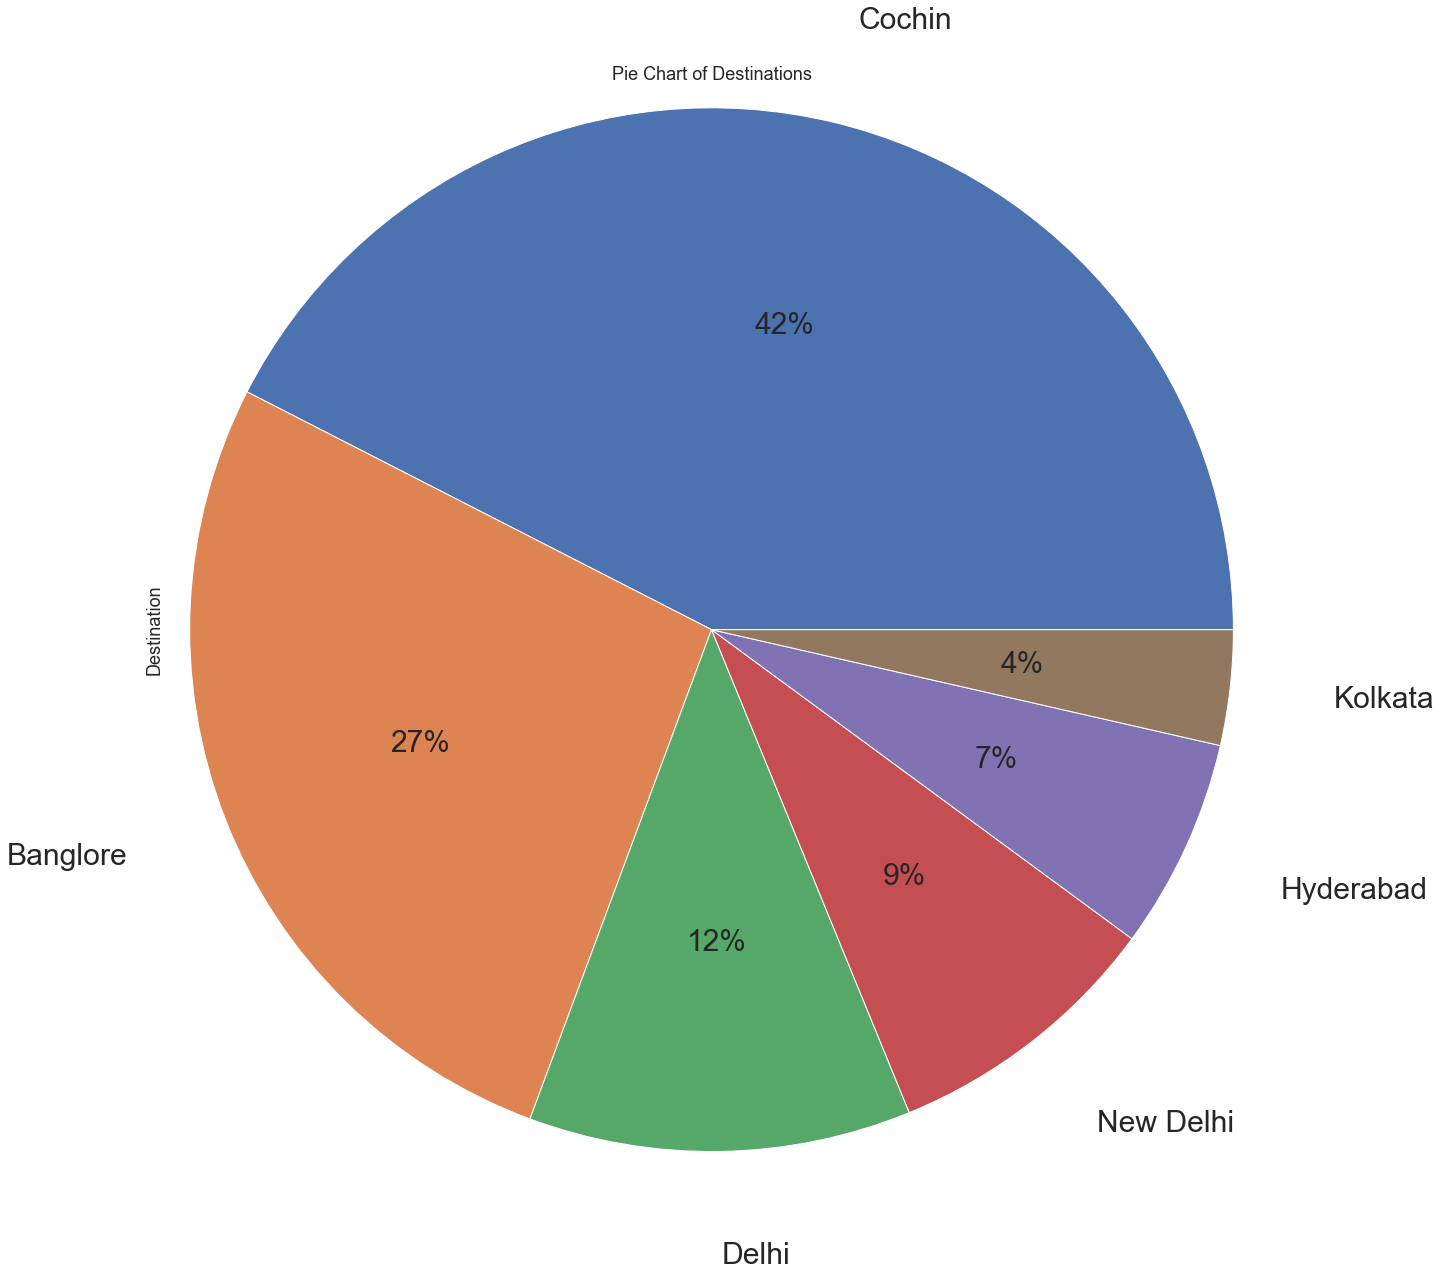

In [44]:
Destinations.plot.pie(autopct = "%1.0f%%" , radius = 1.2 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of Destinations")

In [45]:
# To Present species of Total_Stops ::
Total_Stopss = df["Total_Stops"].value_counts()
Total_Stopss

1    5626
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Total_Stopss')

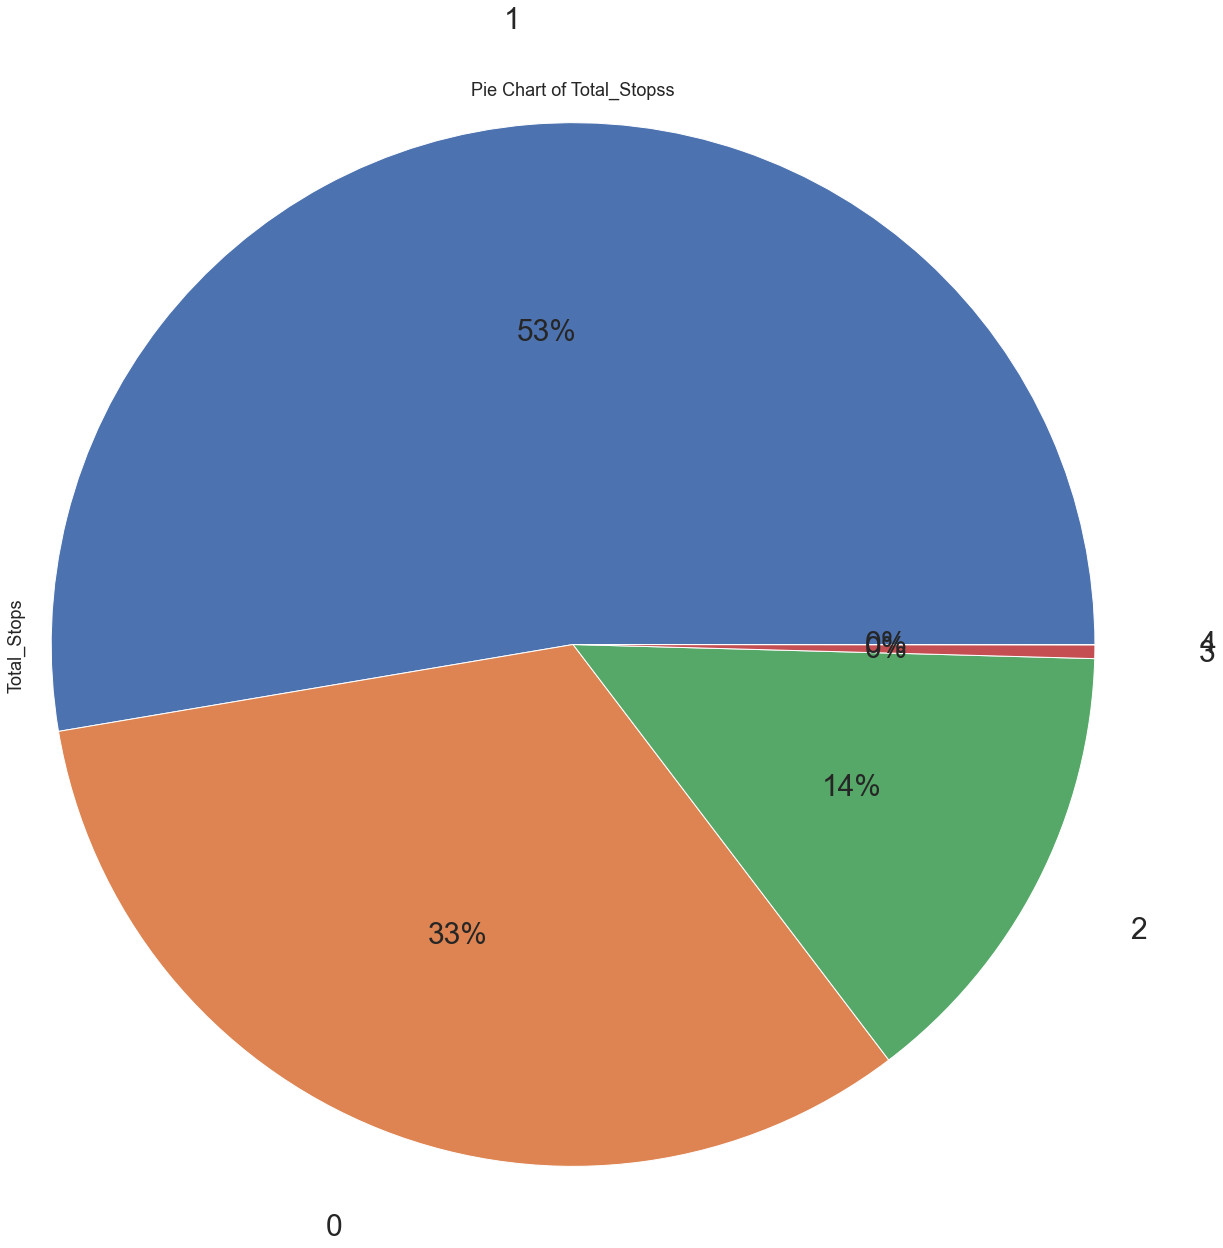

In [46]:
Total_Stopss.plot.pie(autopct = "%1.0f%%" , radius = 1.2 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of Total_Stopss")

In [47]:
# To Present species of Weekday ::
Weekdays = df["Weekday"].value_counts()
Weekdays

3    2290
4    1802
2    1599
0    1491
1    1236
5    1203
6    1062
Name: Weekday, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Weekdays')

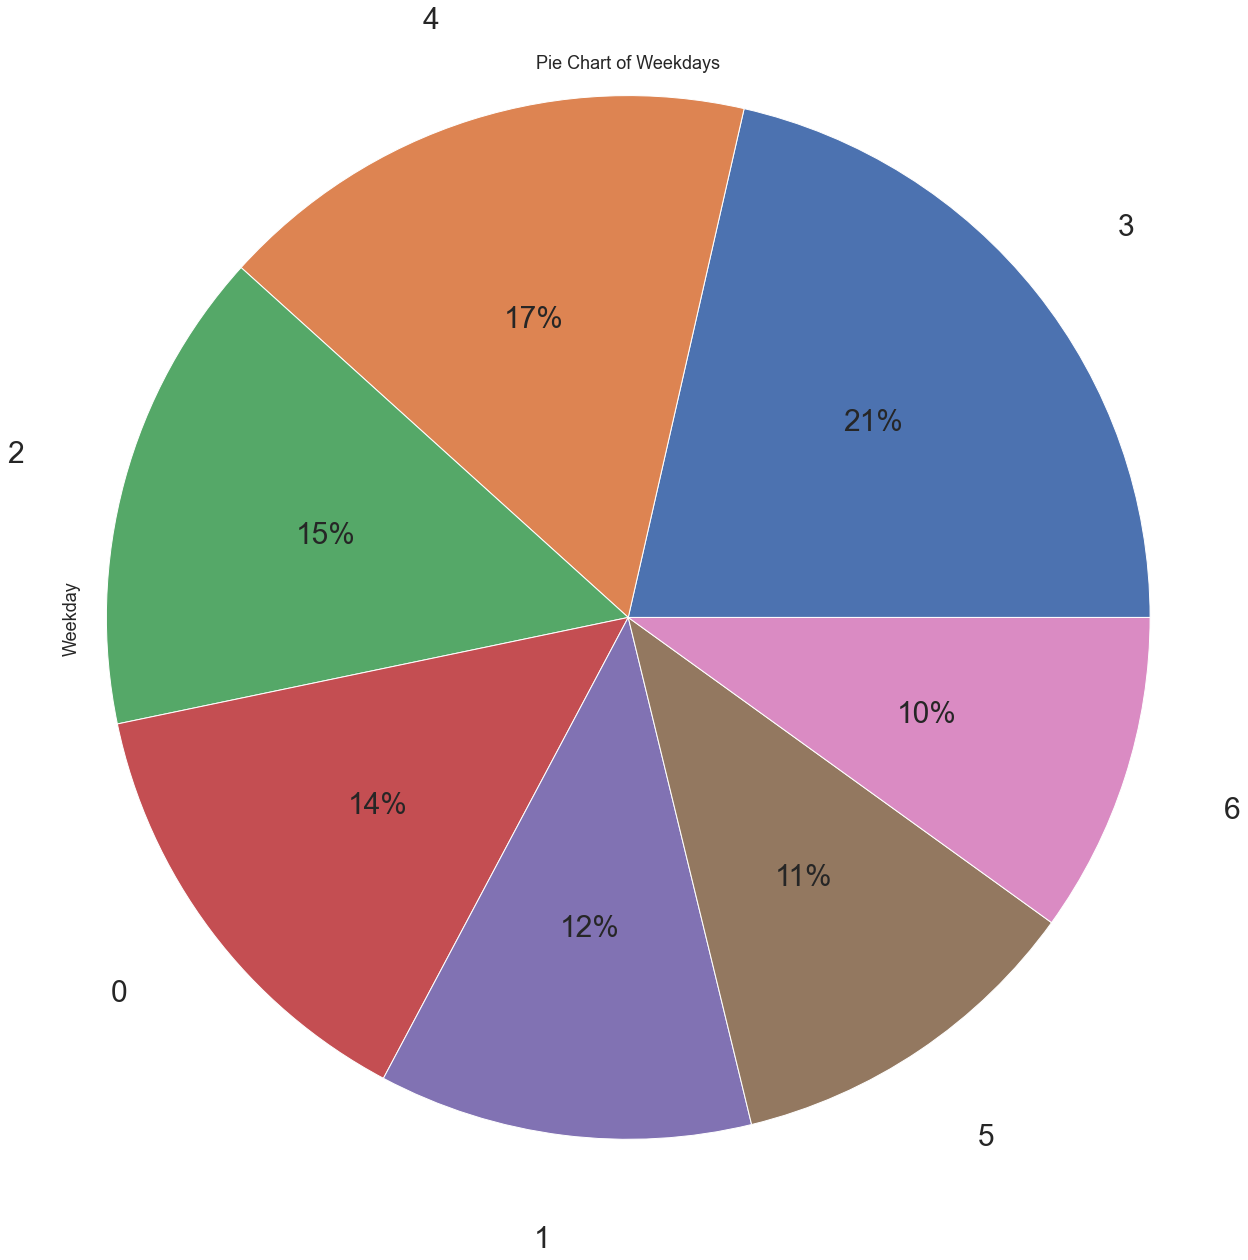

In [48]:
Weekdays.plot.pie(autopct = "%1.0f%%" , radius = 1.2 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of Weekdays")

In [49]:
# To Present species of Month ::
Months = df["Month"].value_counts()
Months

6     2536
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: Month, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Months')

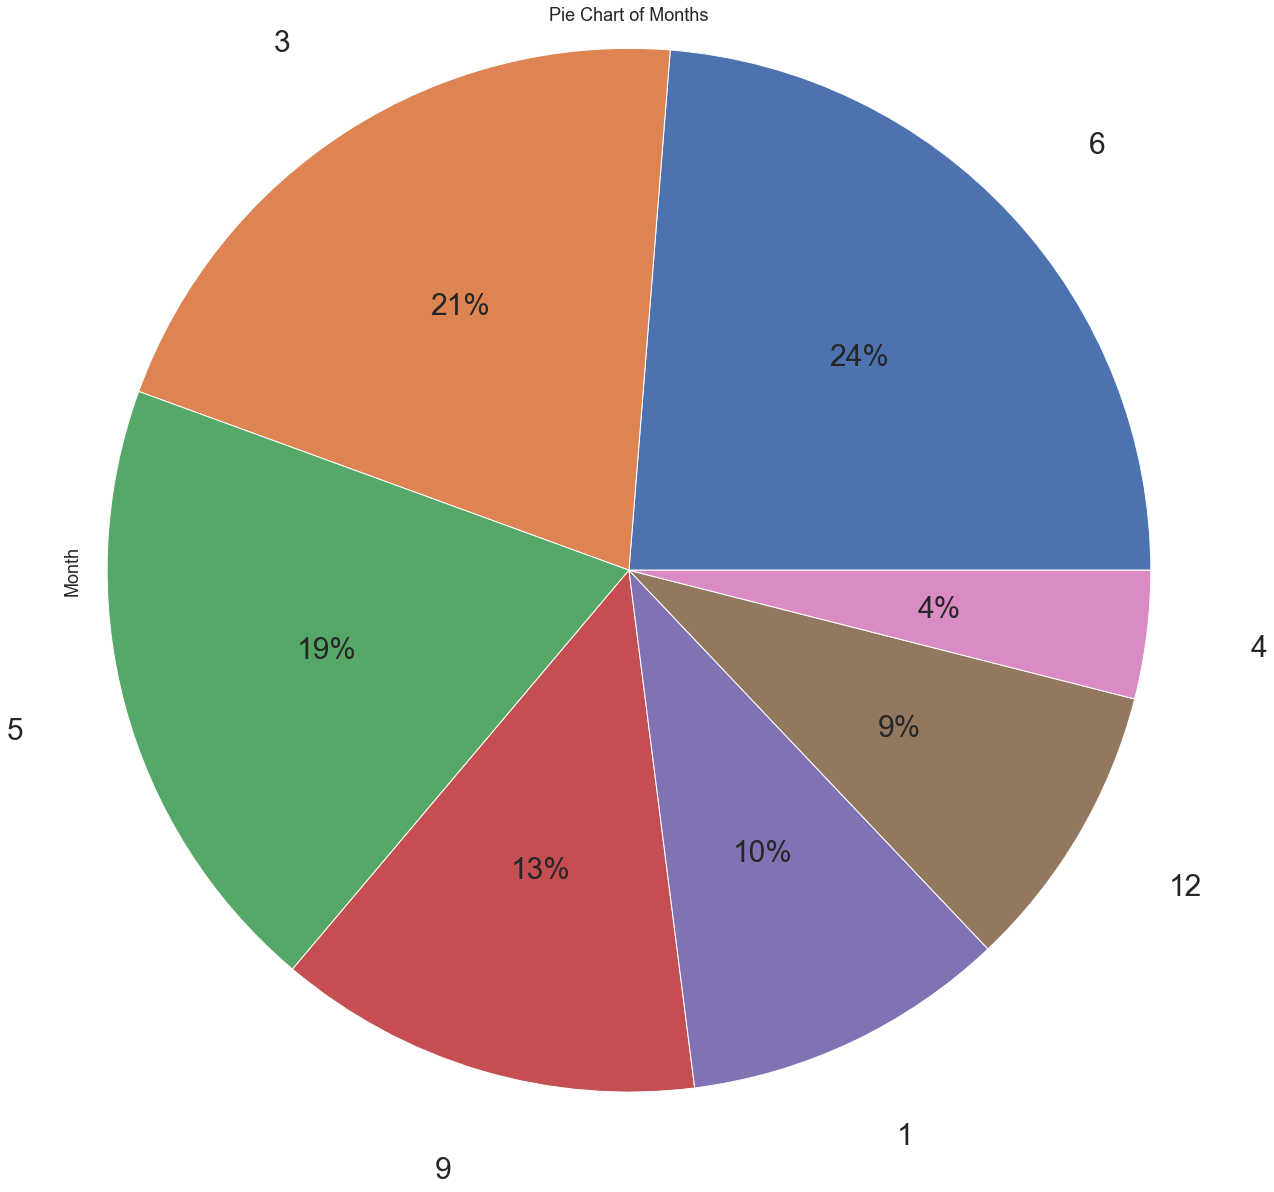

In [50]:
Months.plot.pie(autopct = "%1.0f%%" , radius = 1.2 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of Months")

In [51]:
# To Present species of Day ::
Days = df["Day"].value_counts()
Days

6     2166
5     1392
3     1361
27    1130
21    1111
24    1052
15     984
18     832
4      655
Name: Day, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Days')

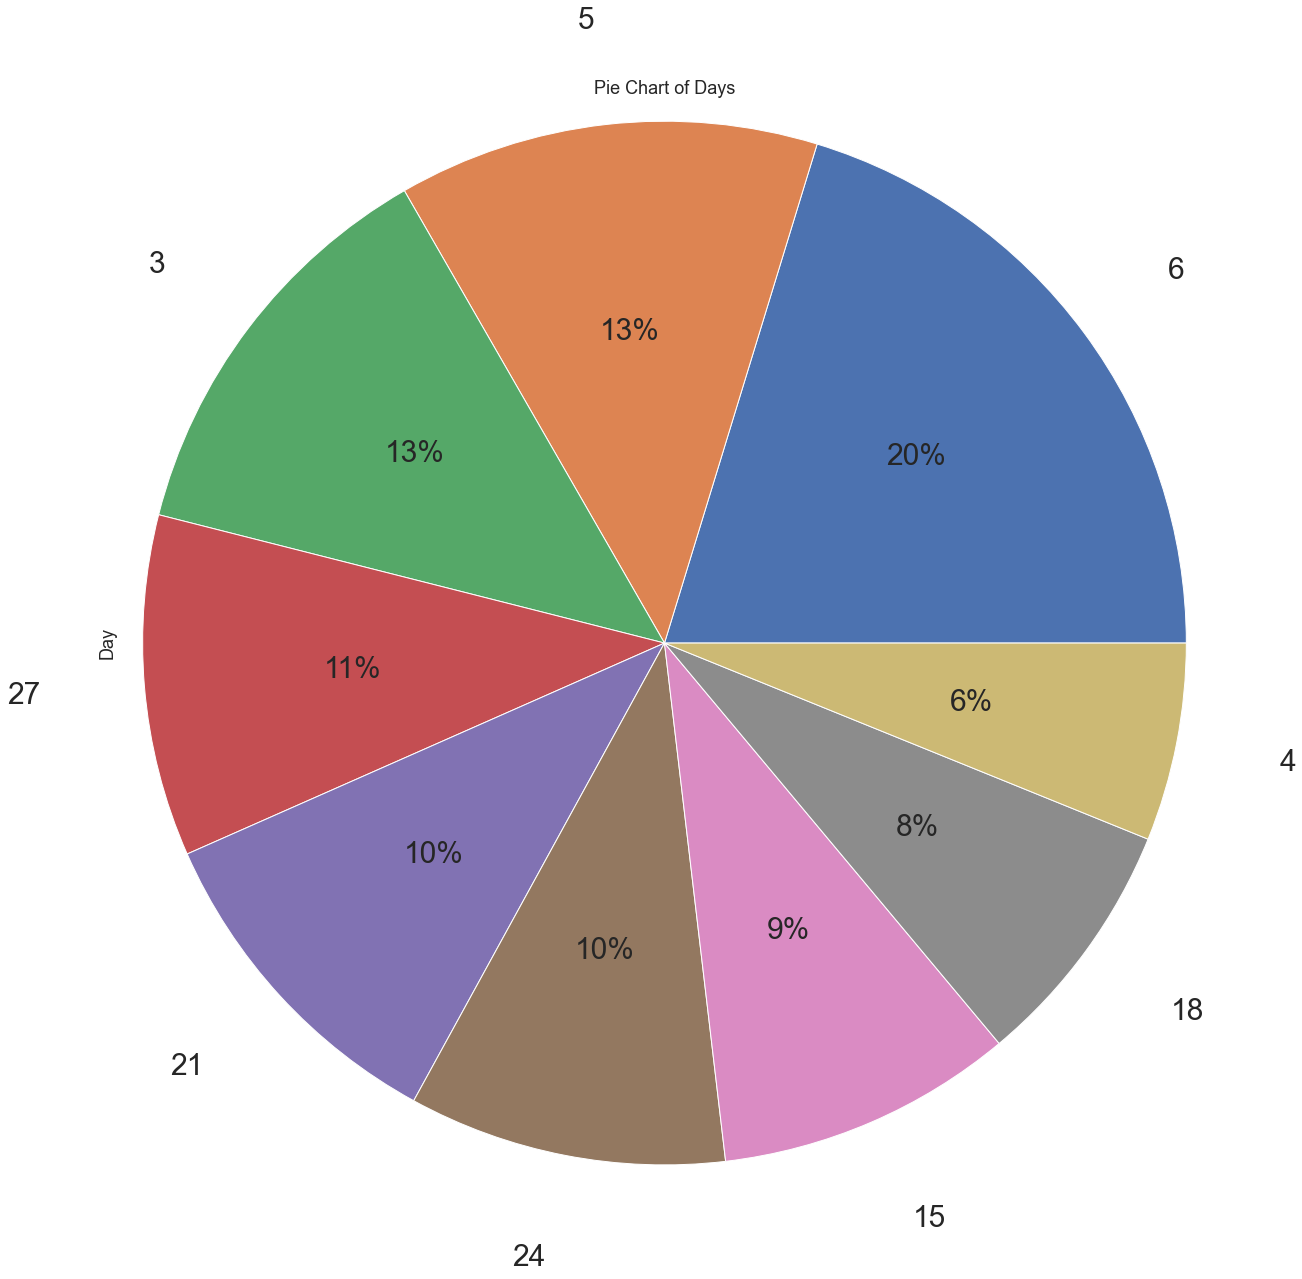

In [52]:
Days.plot.pie(autopct = "%1.0f%%" , radius = 1.2 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of Days")

In [53]:
# To Present species of Airline ::
Airlines = df["Airline"].value_counts()
Airlines

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Airlines')

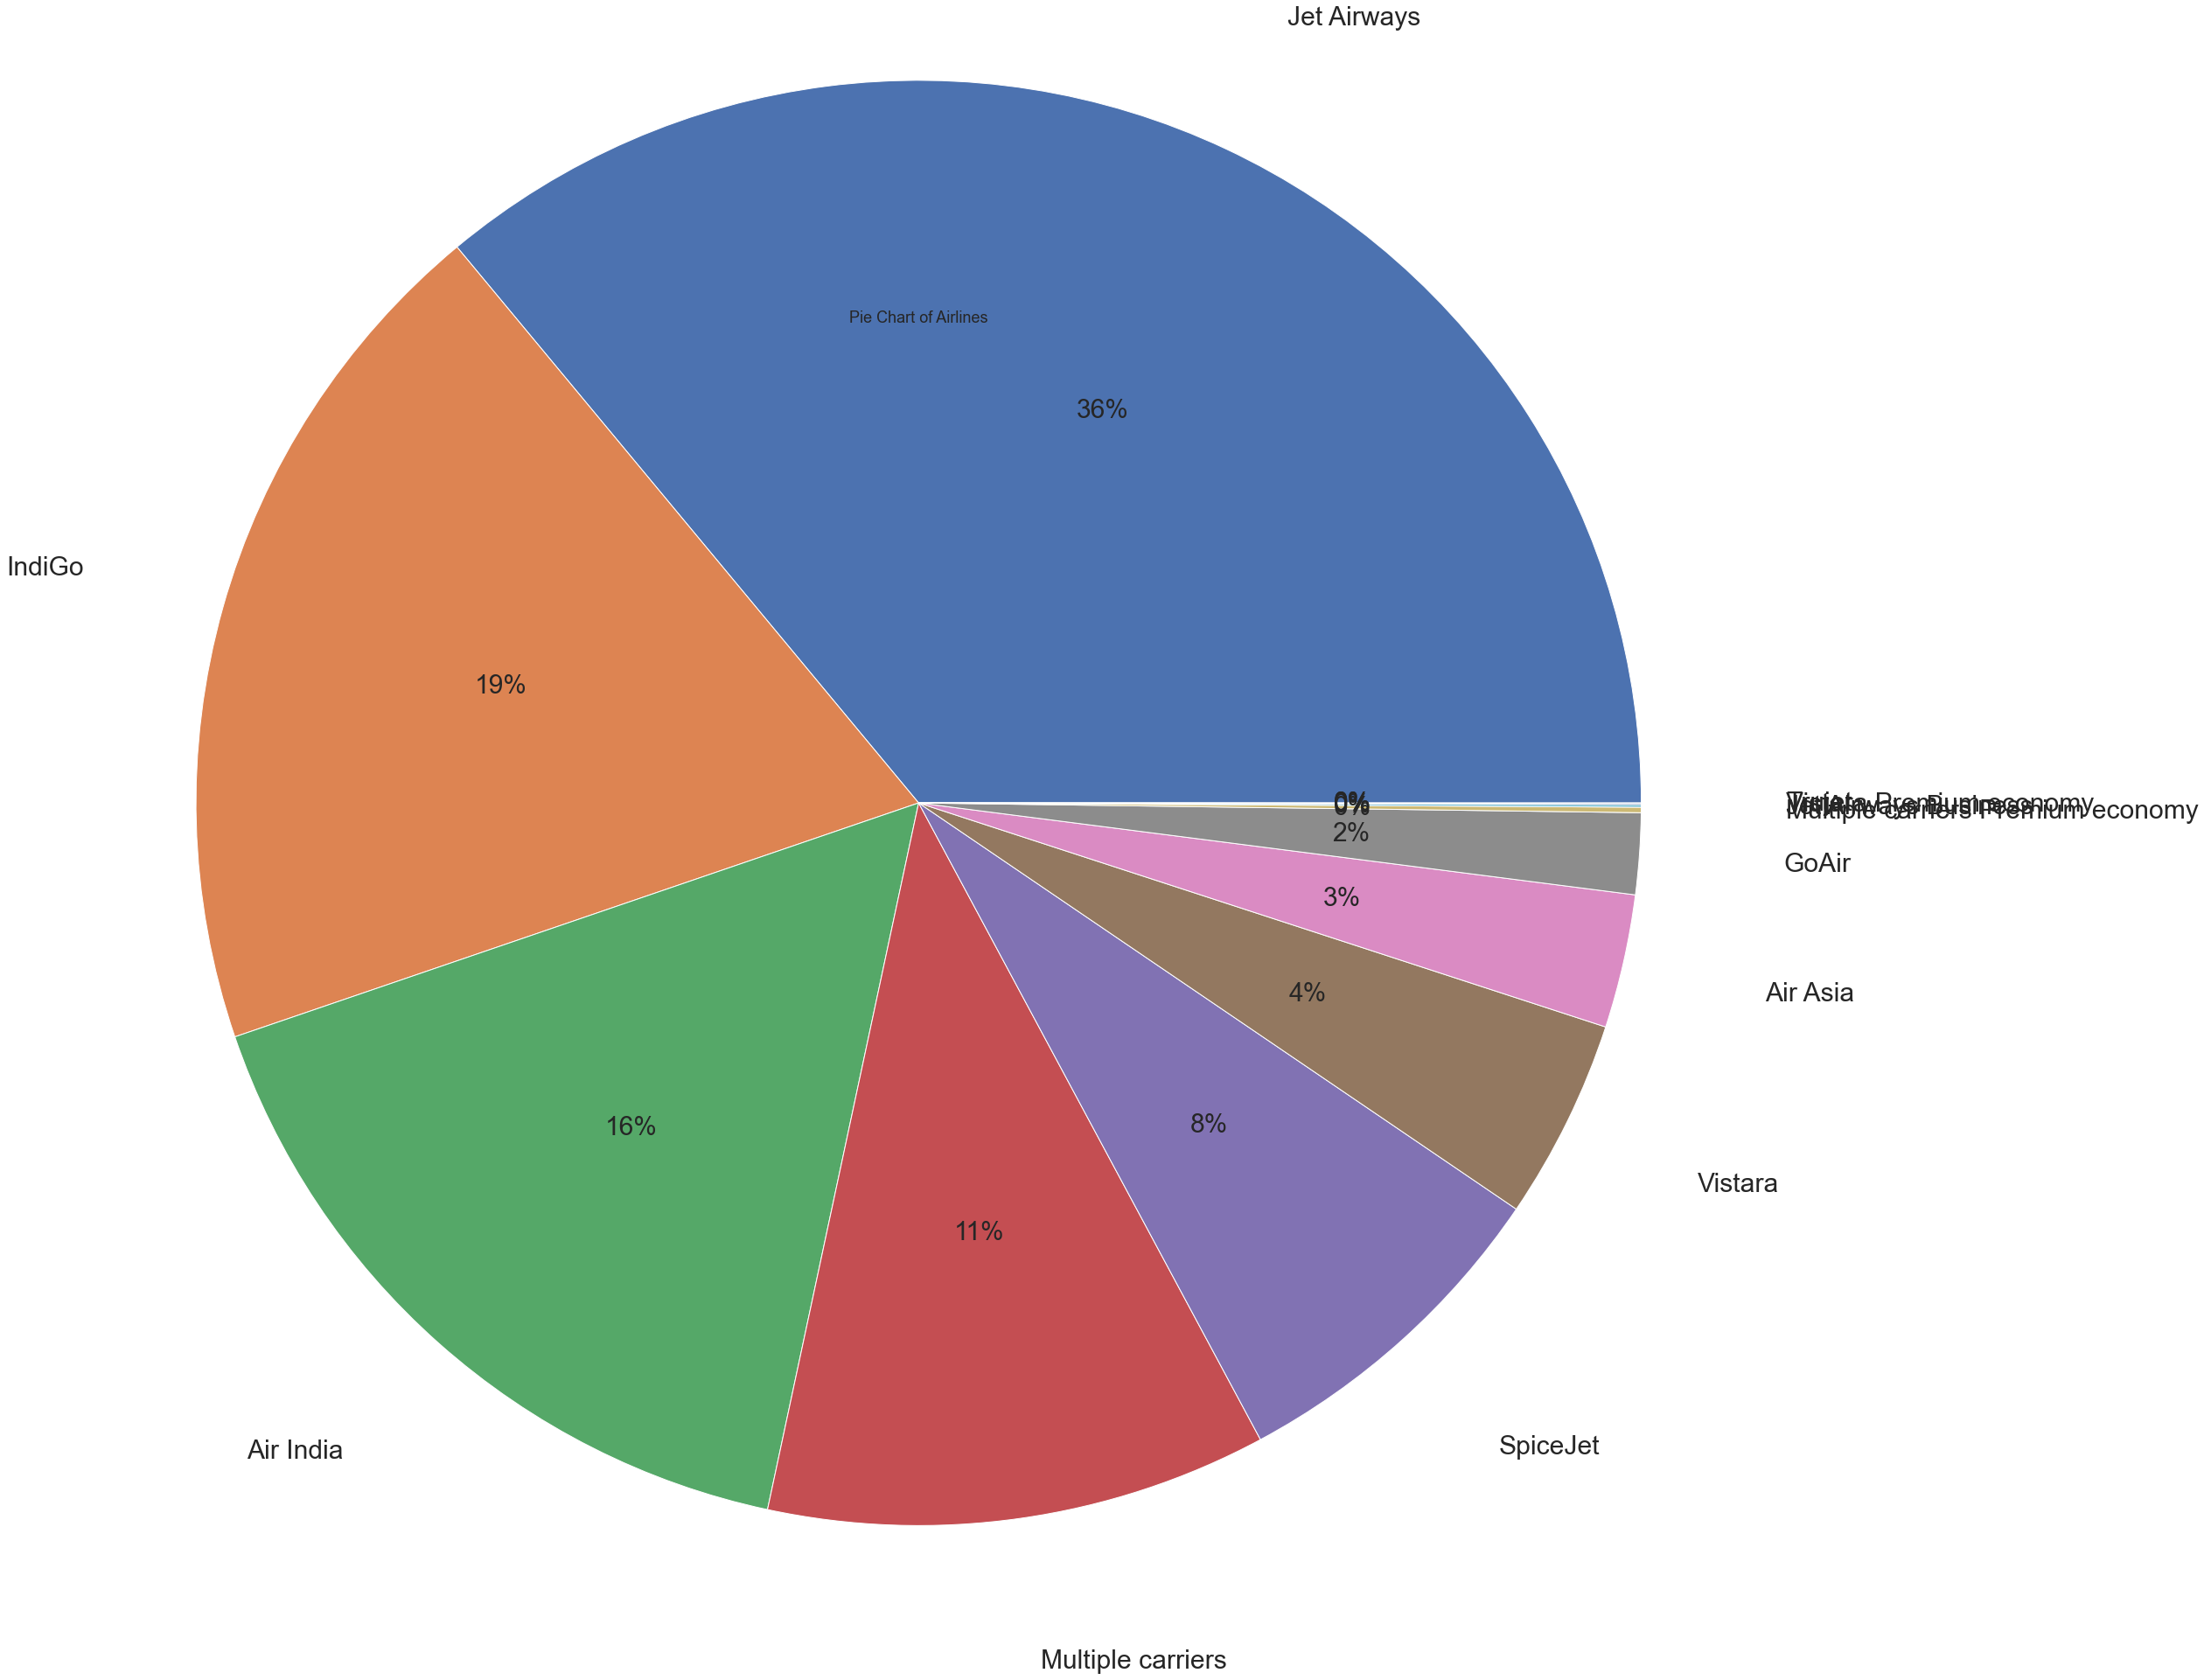

In [54]:
Airlines.plot.pie(autopct = "%1.0f%%" , radius = 1.9 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of Airlines")

Text(0.5, 1.0, 'Distribution Plot of Price')

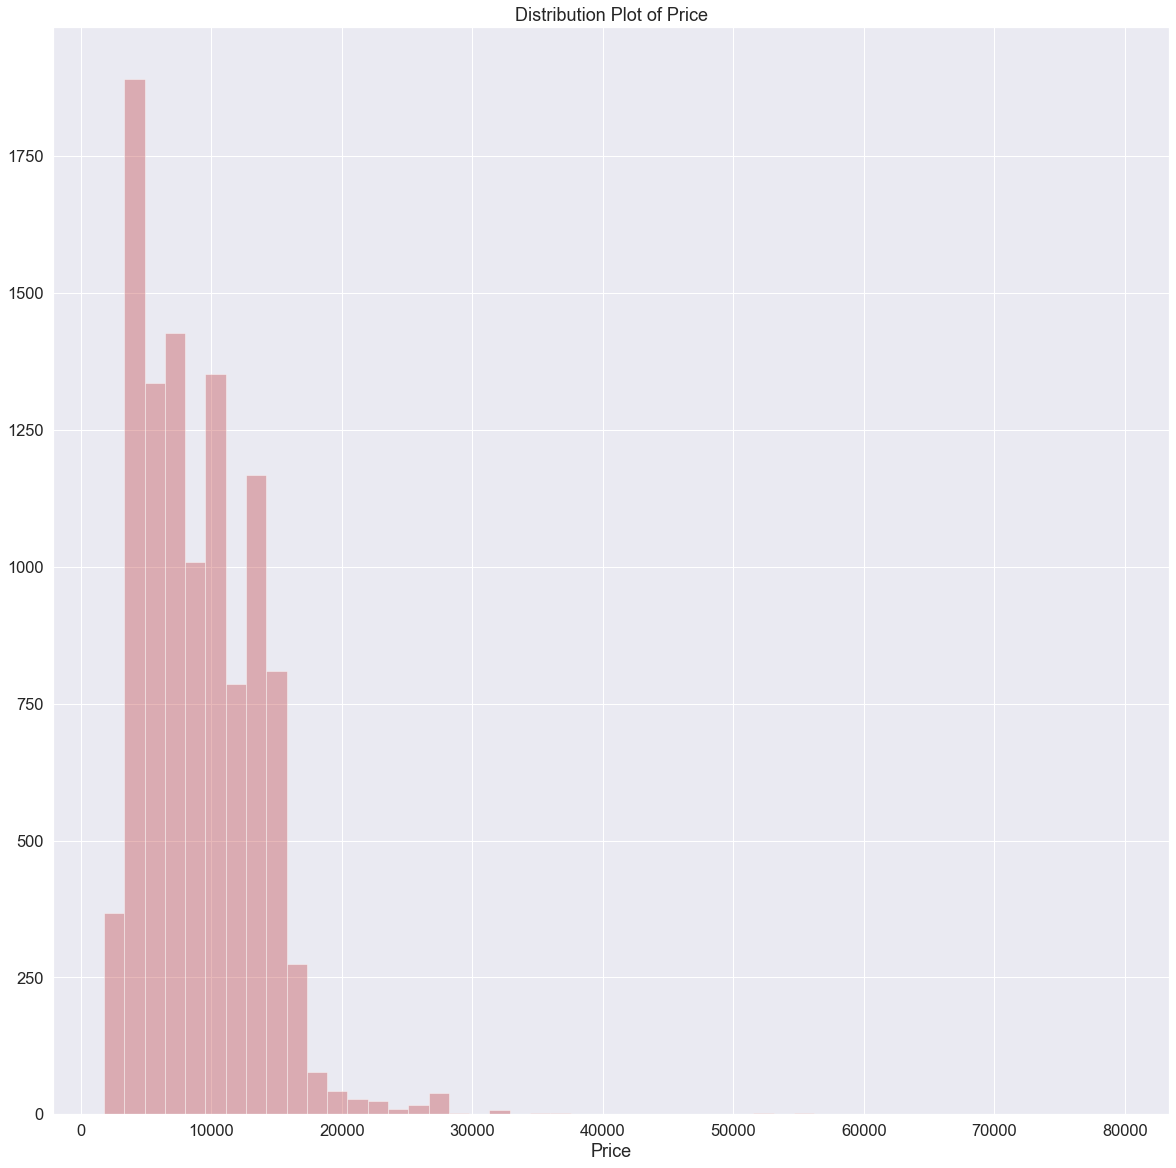

In [55]:
sns.distplot(df["Price"] , kde=False , color="r")
plt.title("Distribution Plot of Price")

Text(0.5, 1.0, 'Kde Plot of Price')

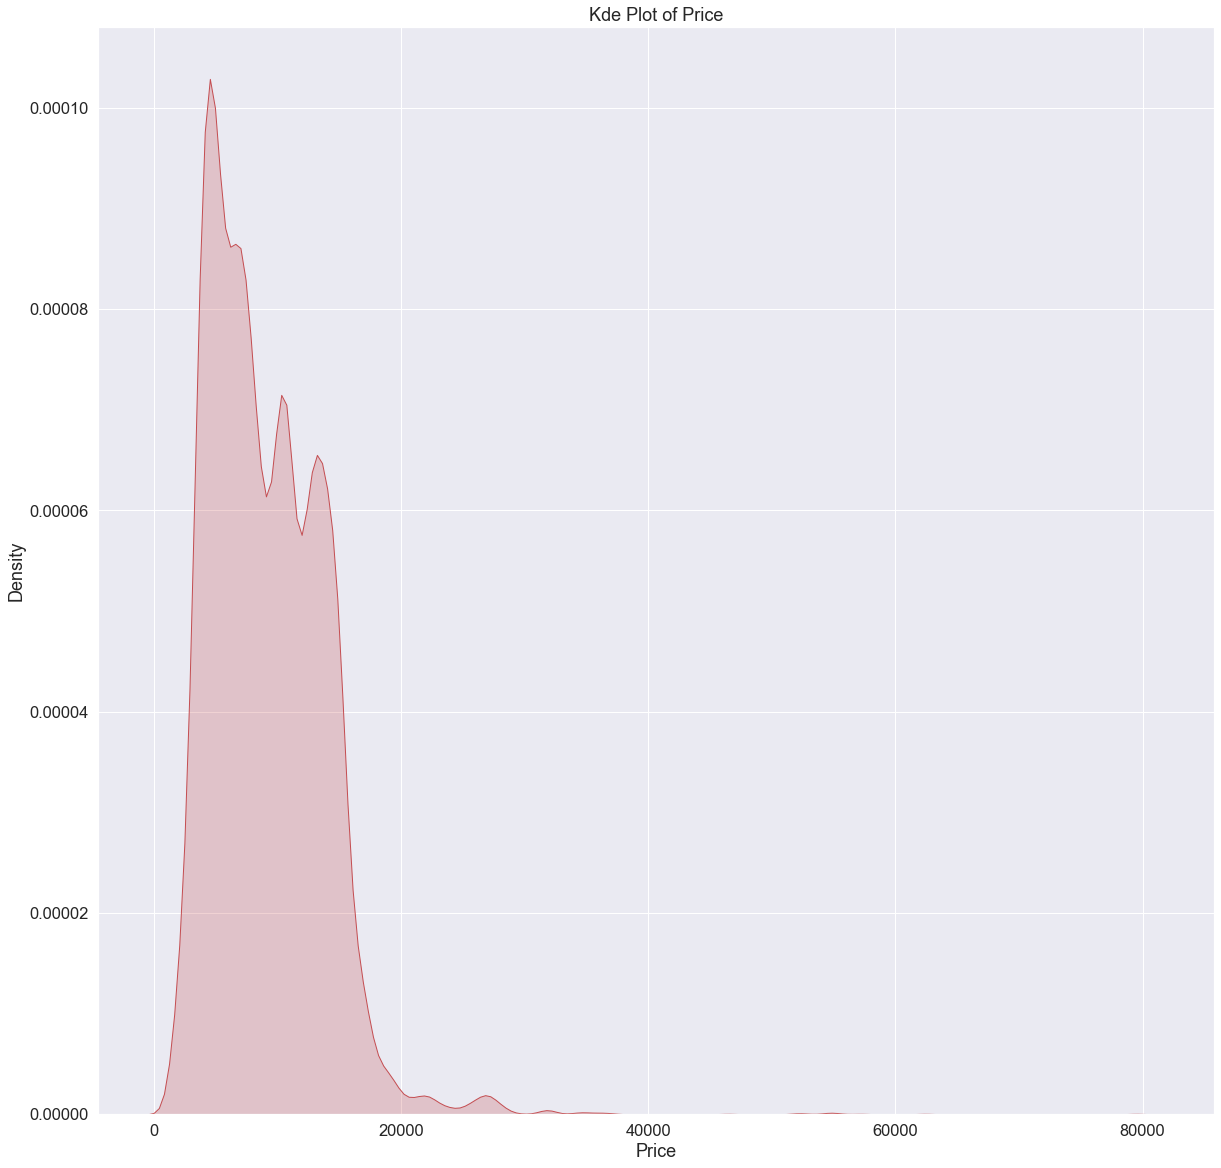

In [56]:
sns.kdeplot(df["Price"] , shade=True , color="r")
plt.title("Kde Plot of Price")

In [57]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Date', 'Day',
       'Month', 'Weekday'],
      dtype='object')

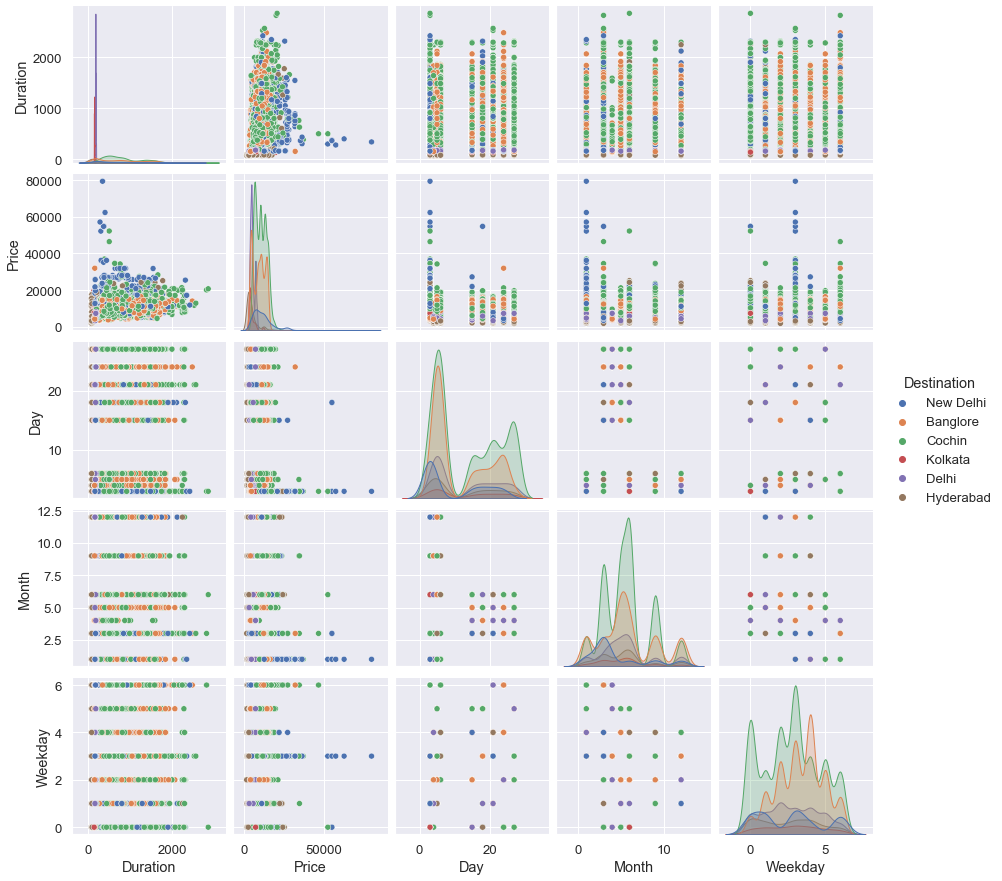

In [58]:
sns.set( rc = {"figure.figsize" : [30 , 30]} , font_scale=1.2)
sns.pairplot(df , hue = "Destination"  )

Text(0.5, 1.0, 'Prediction Based on Destination')

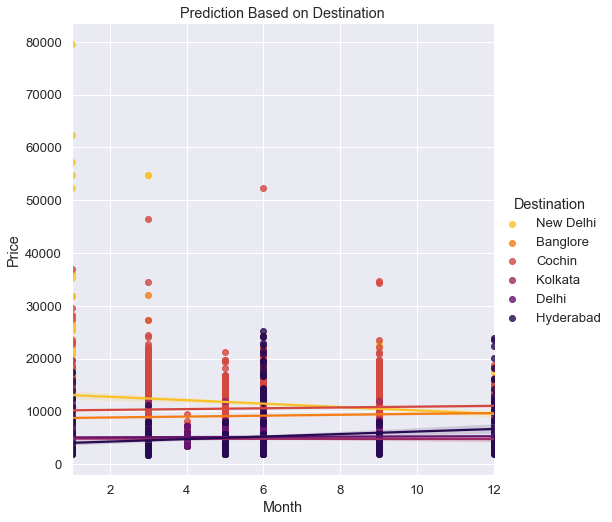

In [59]:
sns.lmplot(x="Month", y="Price", hue="Destination", data=df, palette = 'inferno_r', size = 7)
plt.title('Prediction Based on Destination')

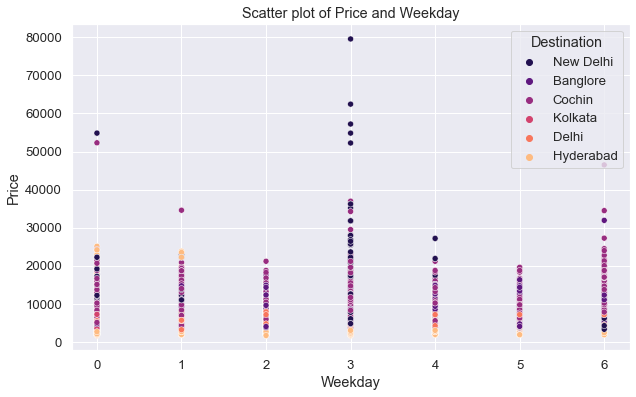

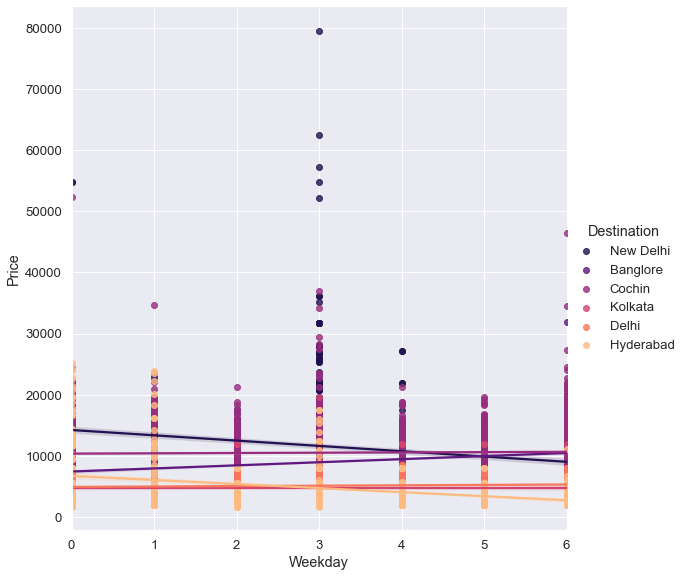

In [60]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='Weekday',y='Price',data=df,palette='magma',hue='Destination')
ax.set_title('Scatter plot of Price and Weekday')

sns.lmplot(x="Weekday", y="Price", hue="Destination", data=df, palette = 'magma', size = 8)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.,  90000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

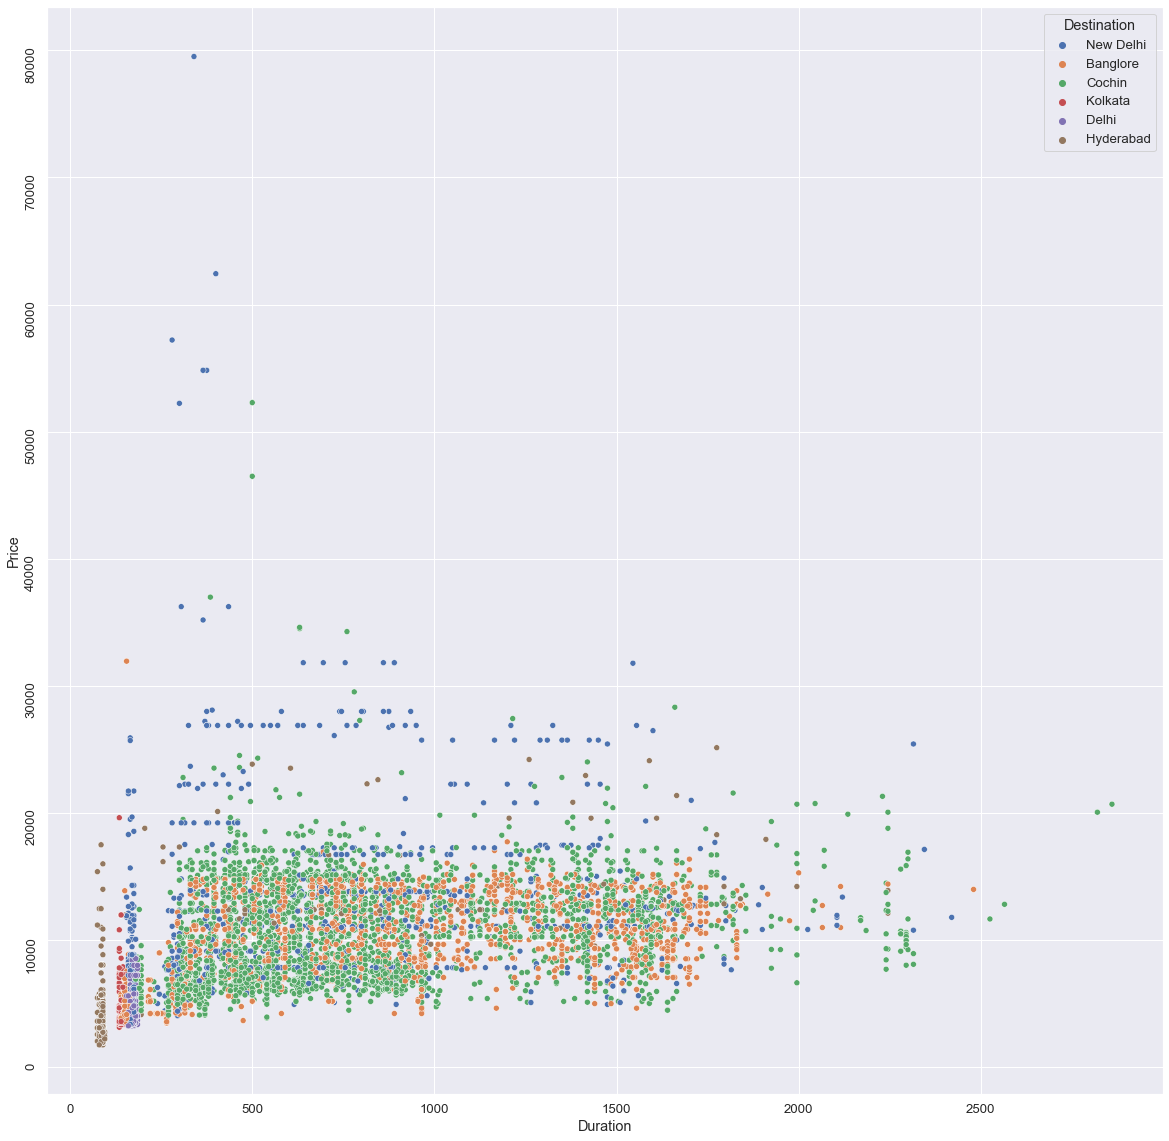

In [61]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=df, x='Duration', y='Price' , hue ="Destination" )
plt.yticks(rotation = 90)

In [62]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Date', 'Day',
       'Month', 'Weekday'],
      dtype='object')

Text(0.5, 1.0, 'Swarm Plot of Arrival_Time and Price Based on Total_Stops ')

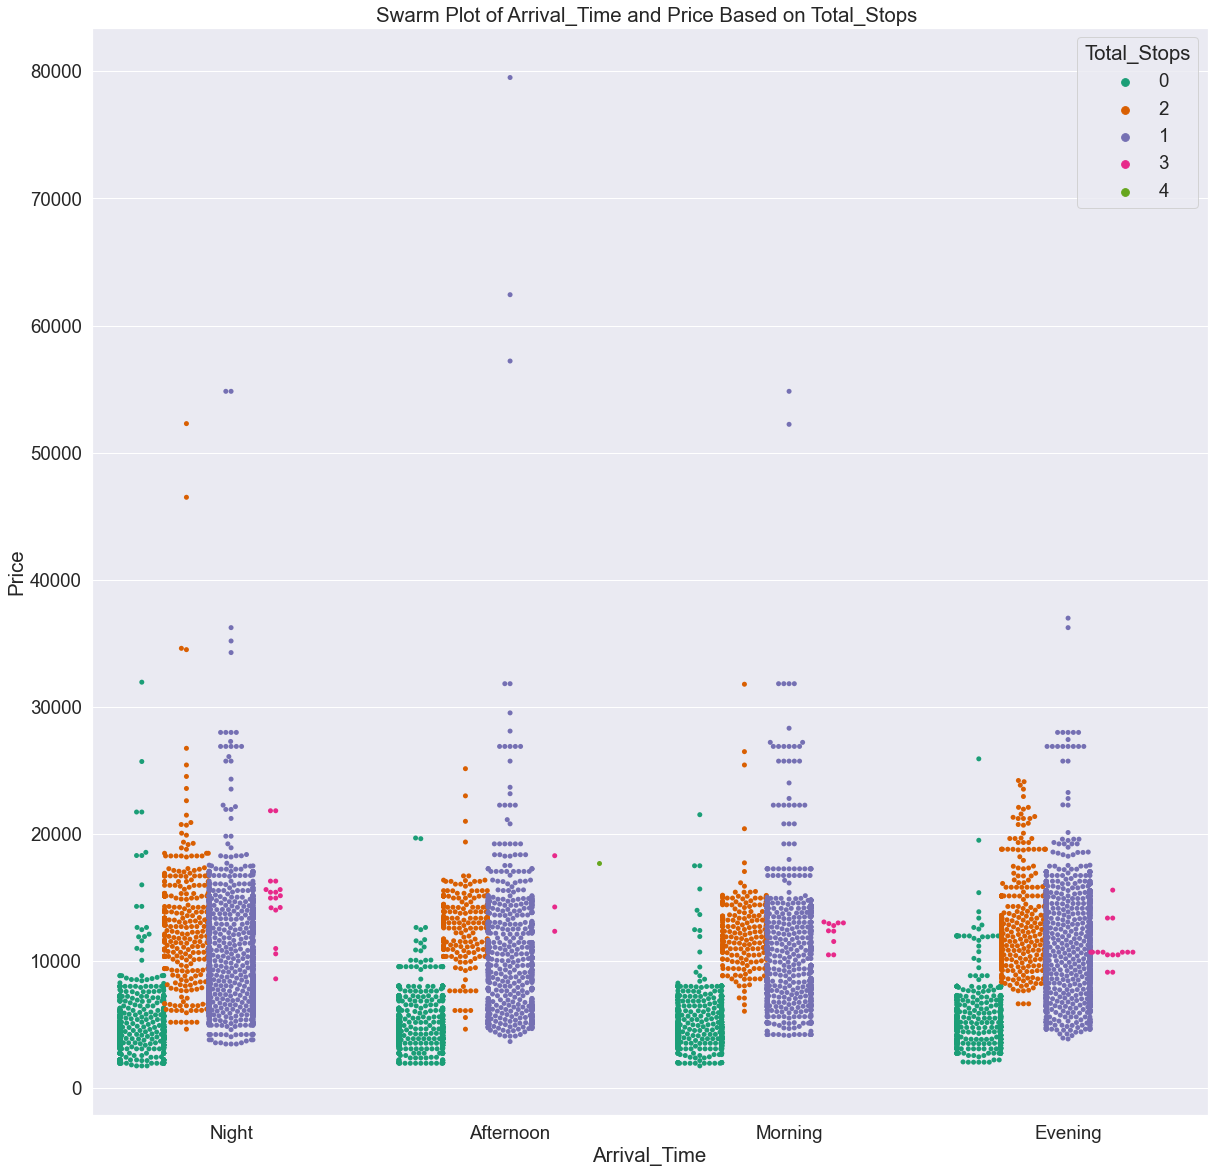

In [63]:
sns.set( rc = {"figure.figsize" : [20 , 20]} , font_scale=1.7)
sns.swarmplot( x = "Arrival_Time" , y = "Price" , data = df ,hue = "Total_Stops" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of Arrival_Time and Price Based on Total_Stops ")

Text(0.5, 1.0, 'Swarm Plot of Dep_Time and Price Based on Airline ')

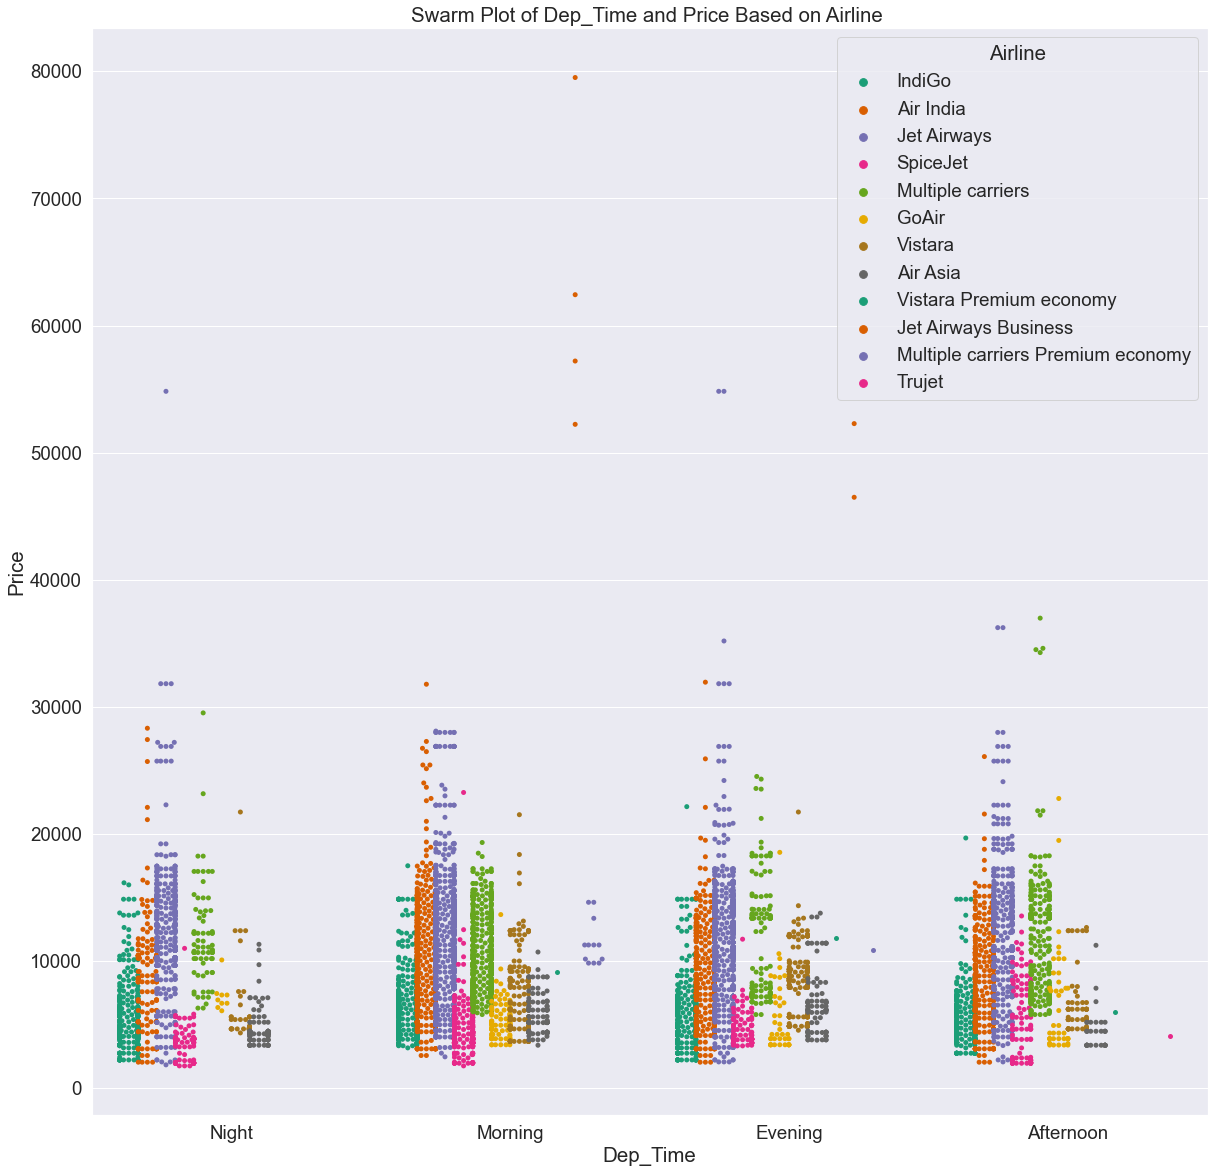

In [64]:
sns.set( rc = {"figure.figsize" : [20 , 20]} , font_scale=1.7)
sns.swarmplot( x = "Dep_Time" , y = "Price" , data = df ,hue = "Airline" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of Dep_Time and Price Based on Airline ")

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


Text(0.5, 1.0, 'Swarm Plot of Dep_Time and Price Based on Total_Stops ')

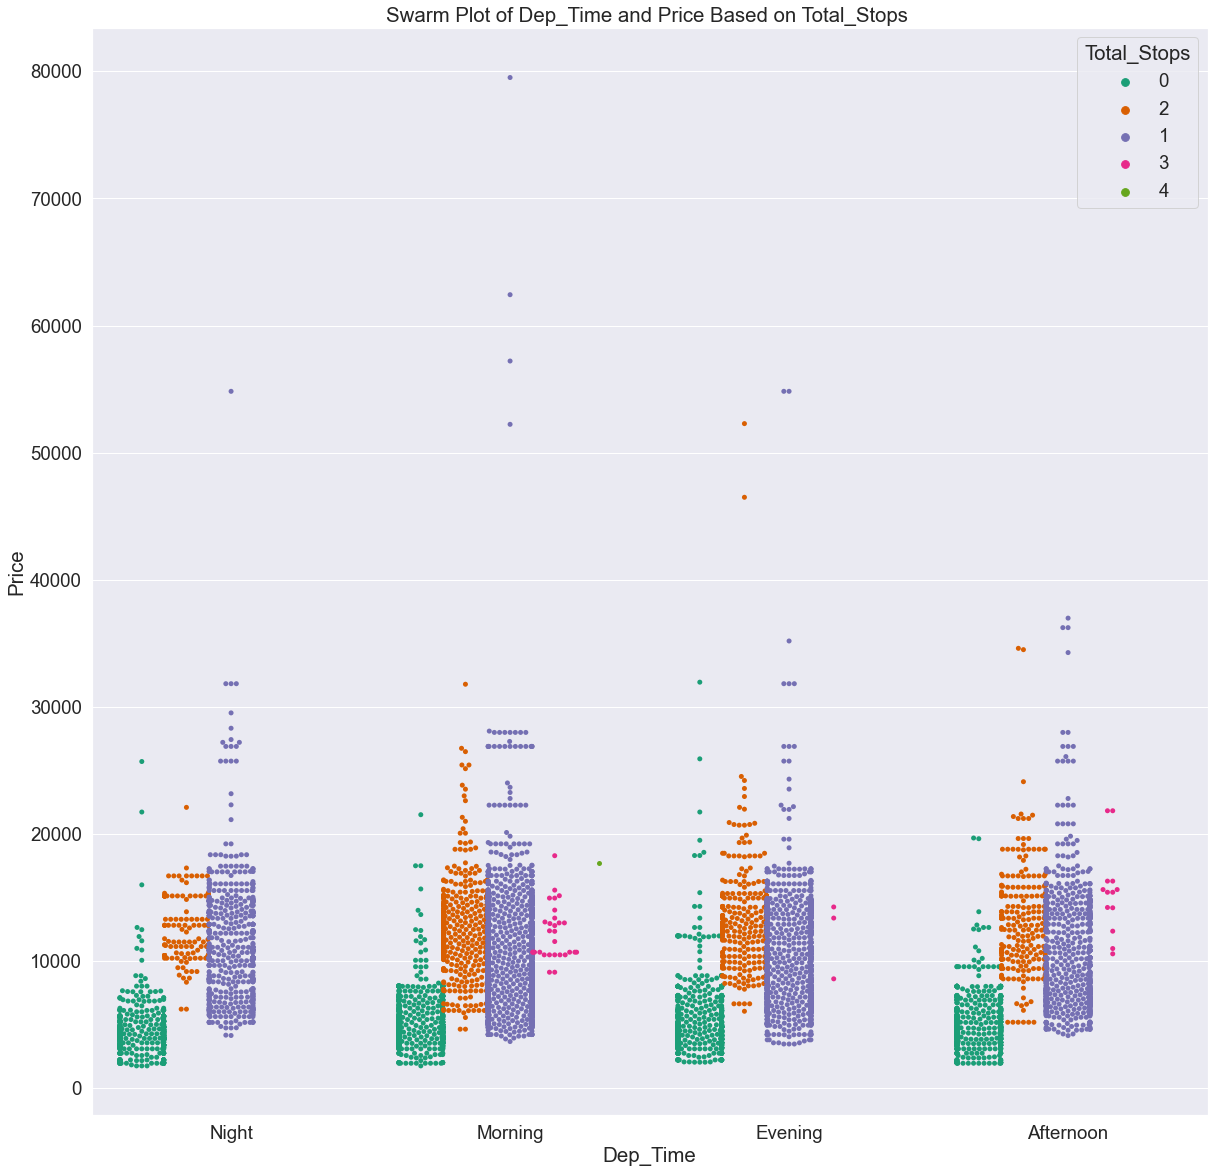

In [65]:
sns.set( rc = {"figure.figsize" : [20 , 20]} , font_scale=1.7)
sns.swarmplot( x = "Dep_Time" , y = "Price" , data = df ,hue = "Total_Stops" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of Dep_Time and Price Based on Total_Stops ")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

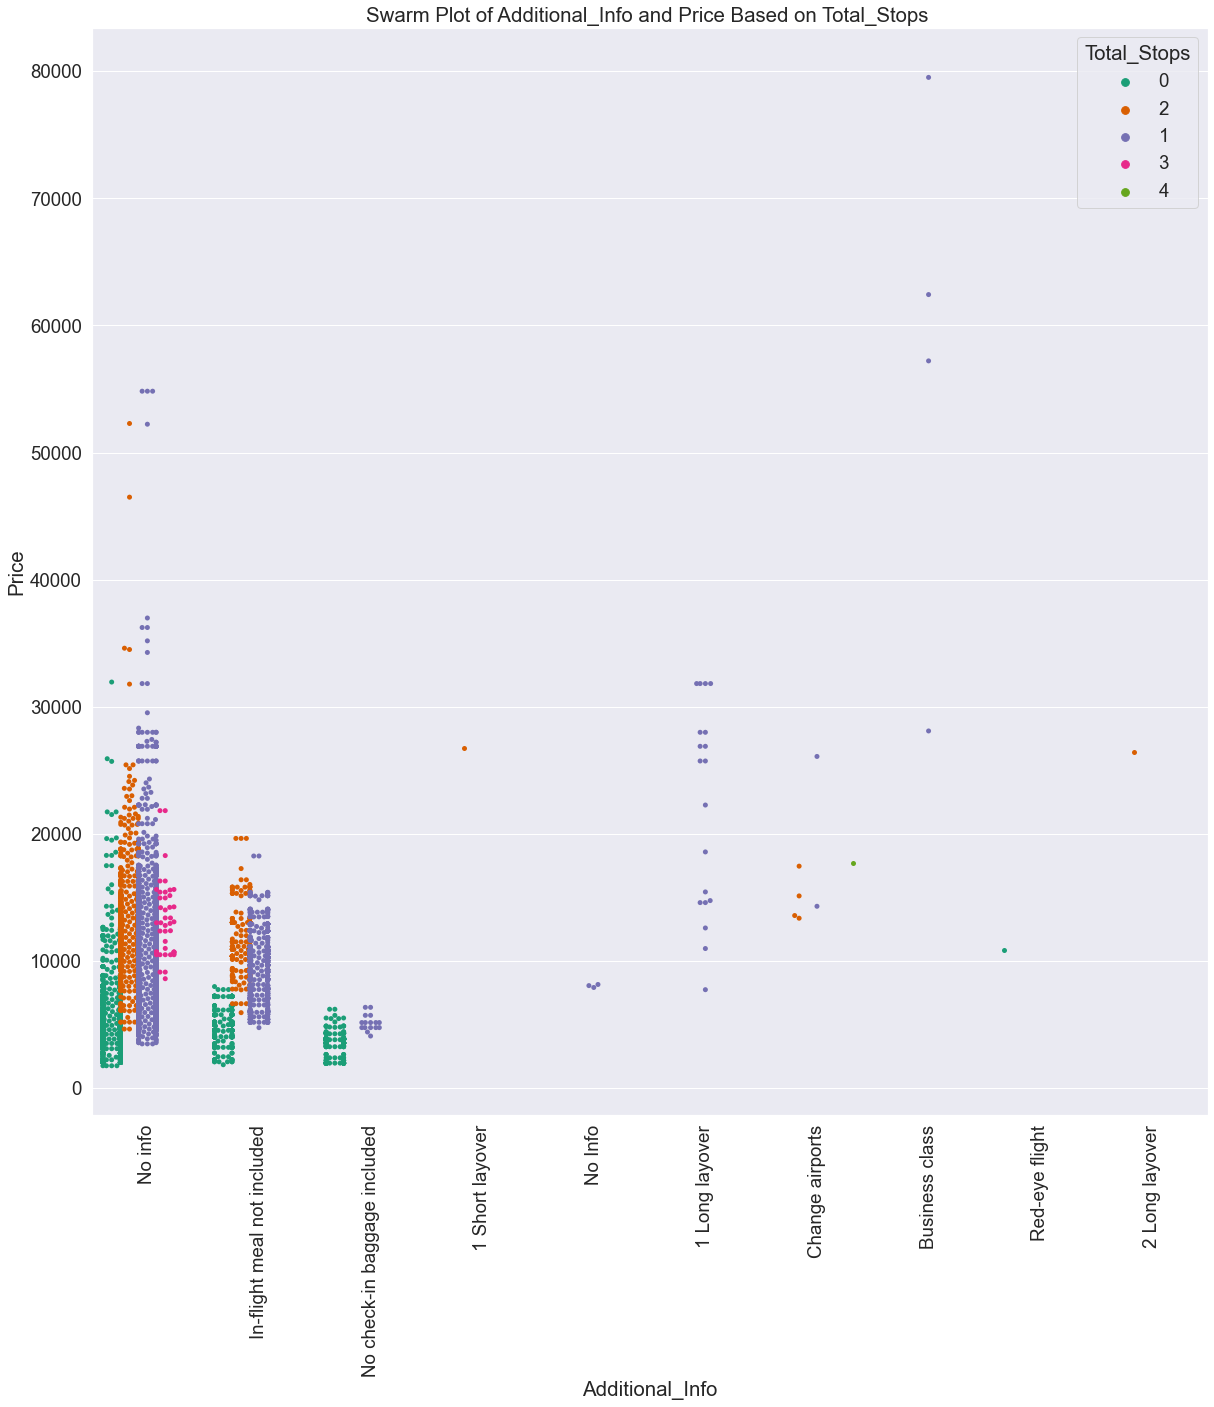

In [66]:
sns.set( rc = {"figure.figsize" : [20 , 20]} , font_scale=1.7)
sns.swarmplot( x = "Additional_Info" , y = "Price" , data = df ,hue = "Total_Stops" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of Additional_Info and Price Based on Total_Stops ")
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

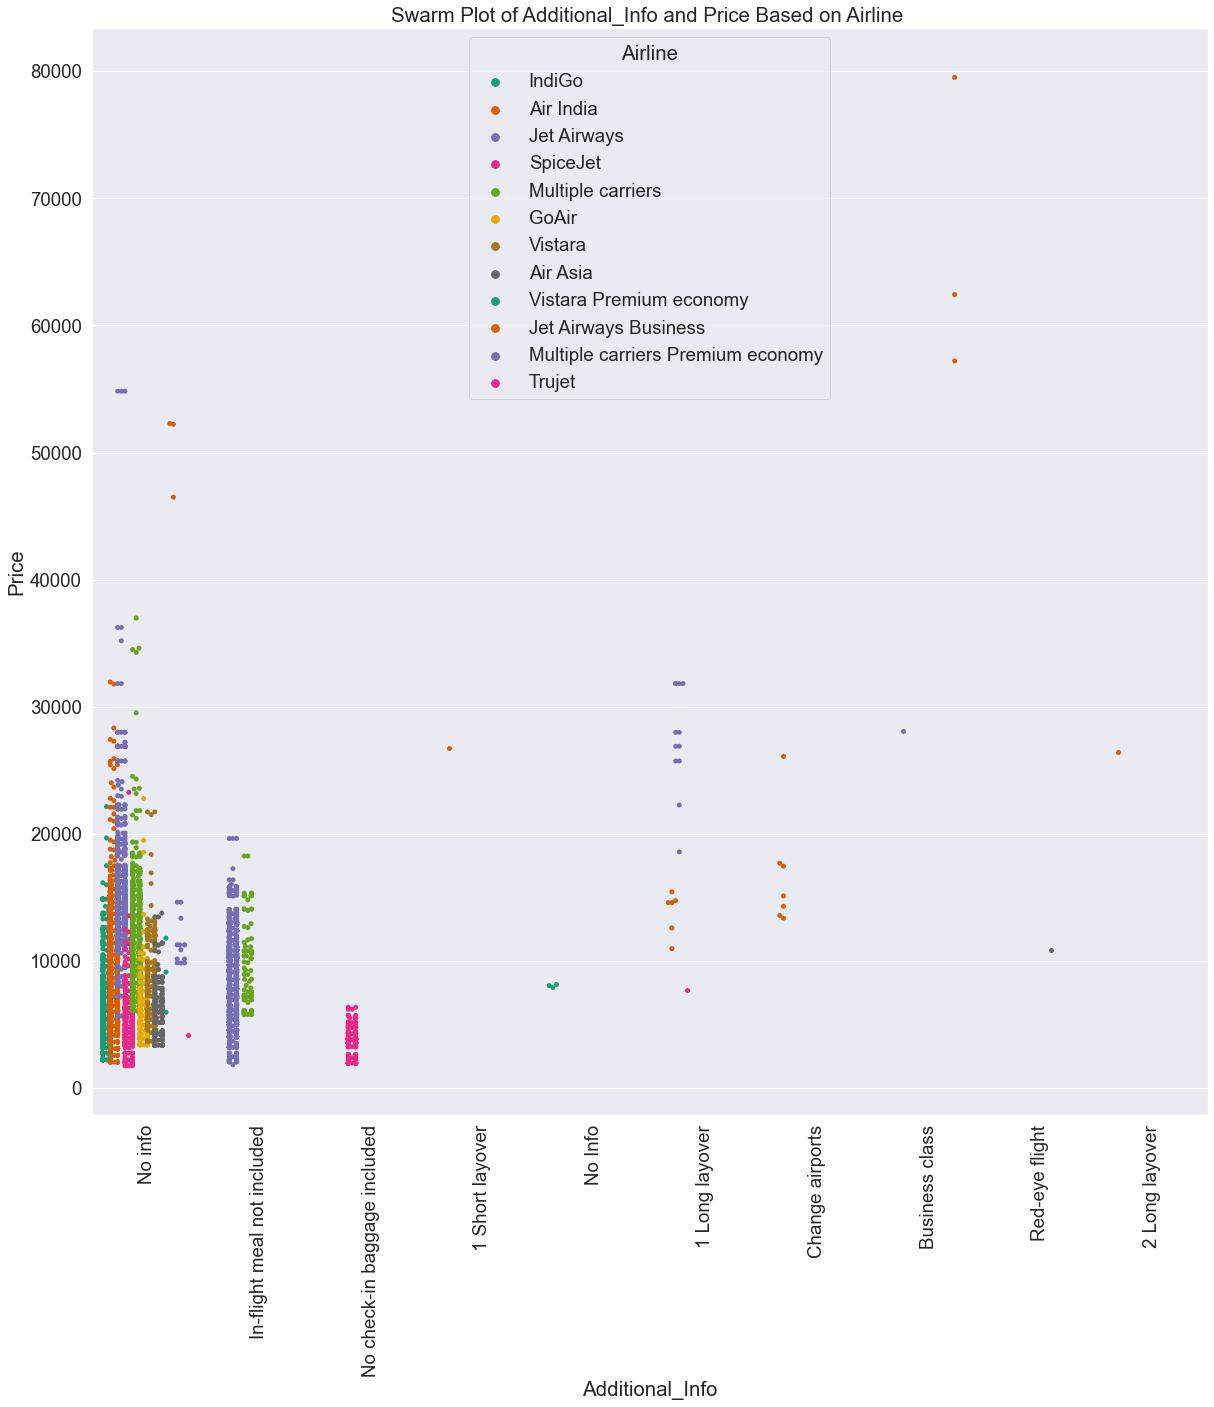

In [67]:
sns.set( rc = {"figure.figsize" : [20 , 20]} , font_scale=1.7)
sns.swarmplot( x = "Additional_Info" , y = "Price" , data = df ,hue = "Airline" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of Additional_Info and Price Based on Airline ")
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Box Plot of Arrival_Time and Price Based on Total_Stops ')

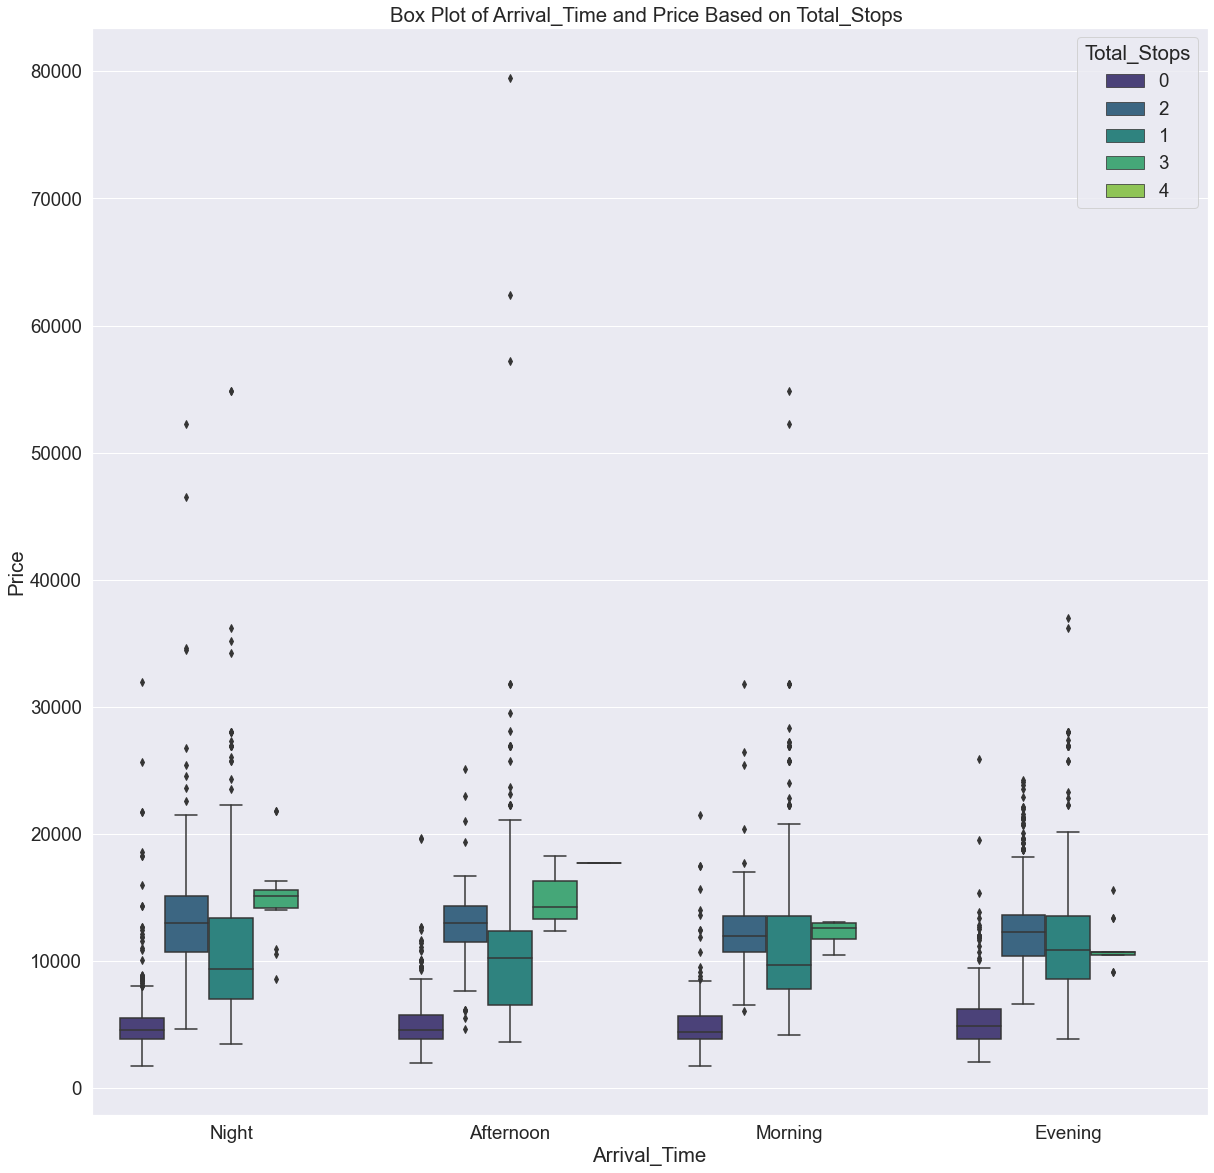

In [68]:
sns.boxplot( x = "Arrival_Time" , y = "Price" , data = df ,hue = "Total_Stops" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of Arrival_Time and Price Based on Total_Stops ")

Text(0.5, 1.0, 'Box Plot of Dep_Time and Price Based on Total_Stops ')

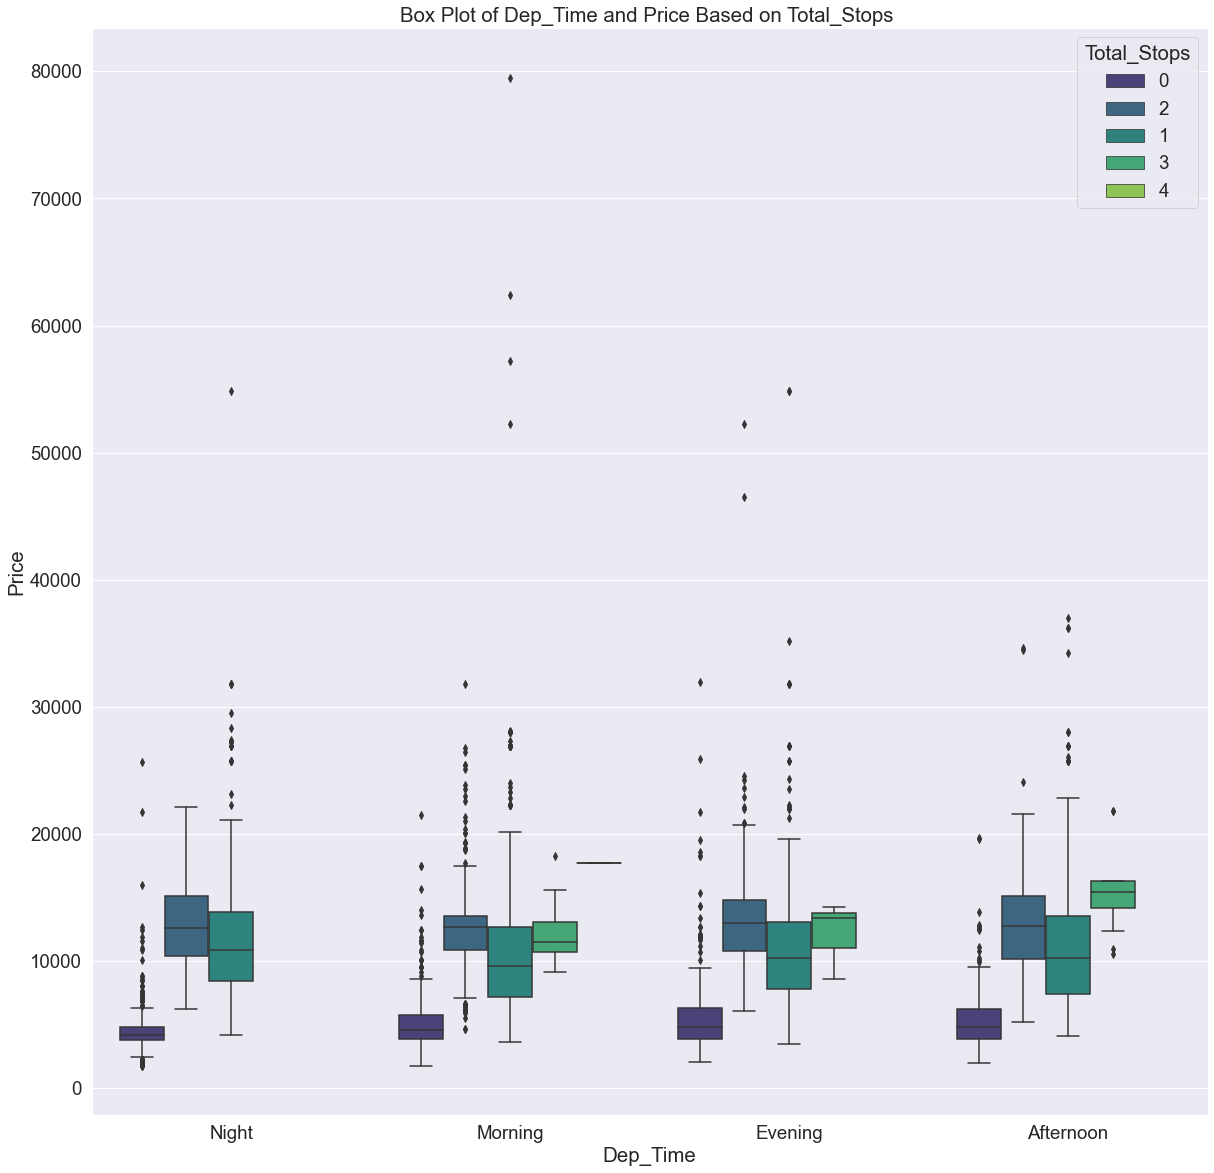

In [69]:
sns.boxplot( x = "Dep_Time" , y = "Price" , data = df ,hue = "Total_Stops" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of Dep_Time and Price Based on Total_Stops ")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

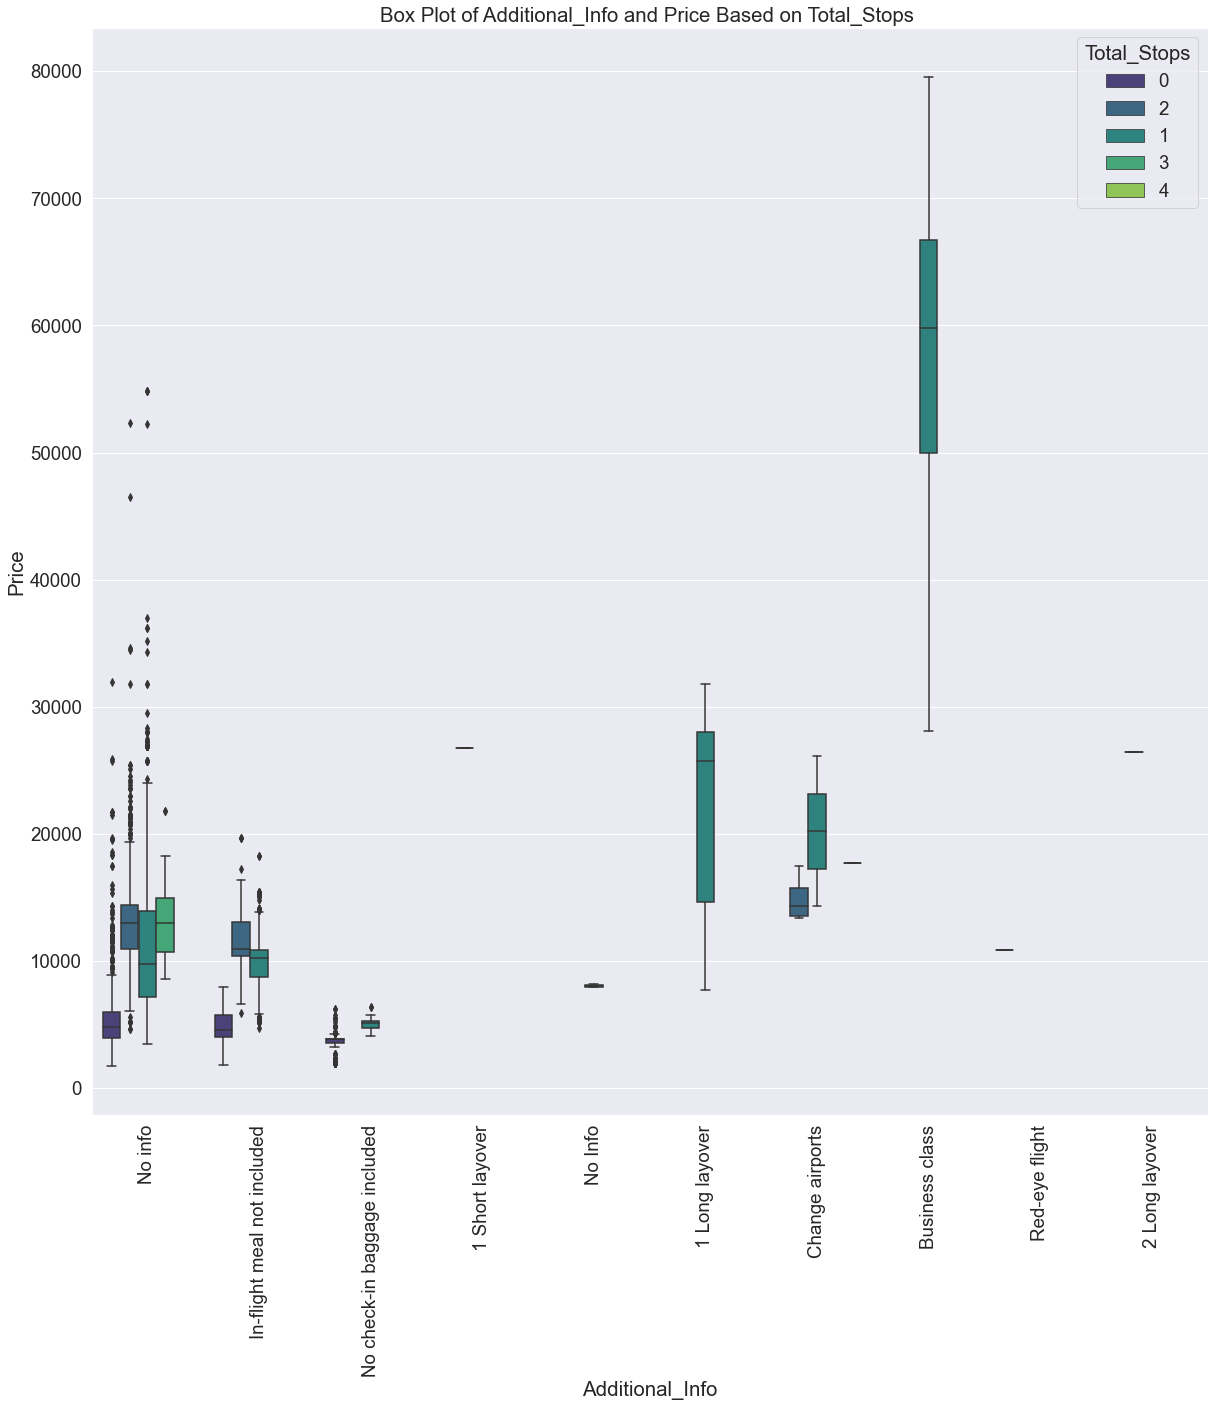

In [70]:
sns.boxplot( x = "Additional_Info" , y = "Price" , data = df ,hue = "Total_Stops" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of Additional_Info and Price Based on Total_Stops ")
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Box Plot of Arrival_Time and Price Based on Airline ')

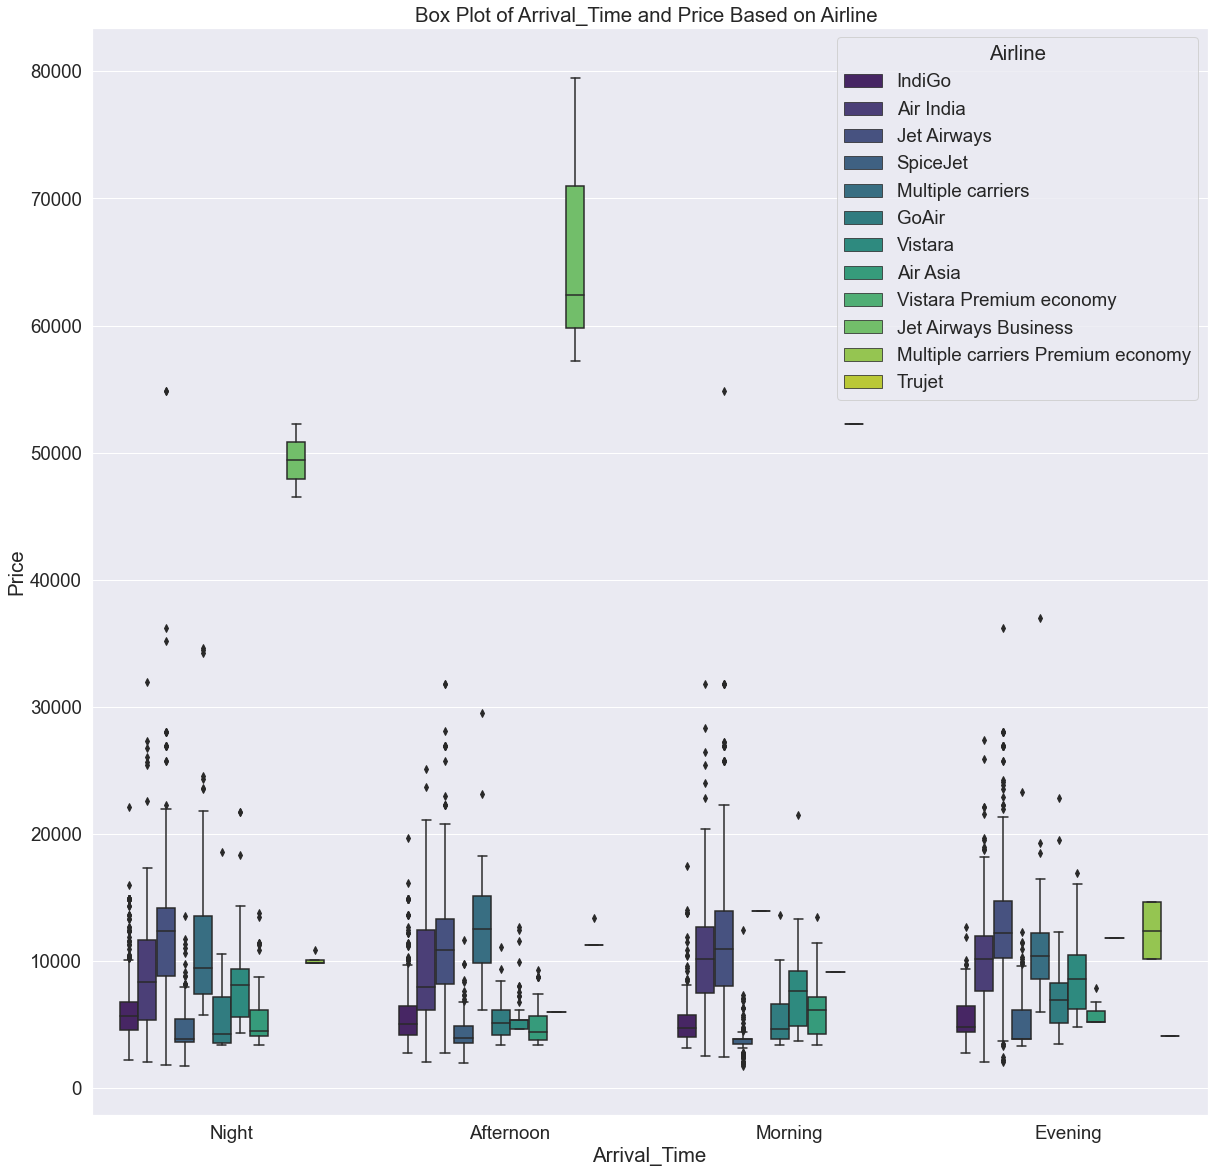

In [71]:
sns.boxplot( x = "Arrival_Time" , y = "Price" , data = df ,hue = "Airline" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of Arrival_Time and Price Based on Airline ")

Text(0.5, 1.0, 'Box Plot of Dep_Time and Price Based on Airline ')

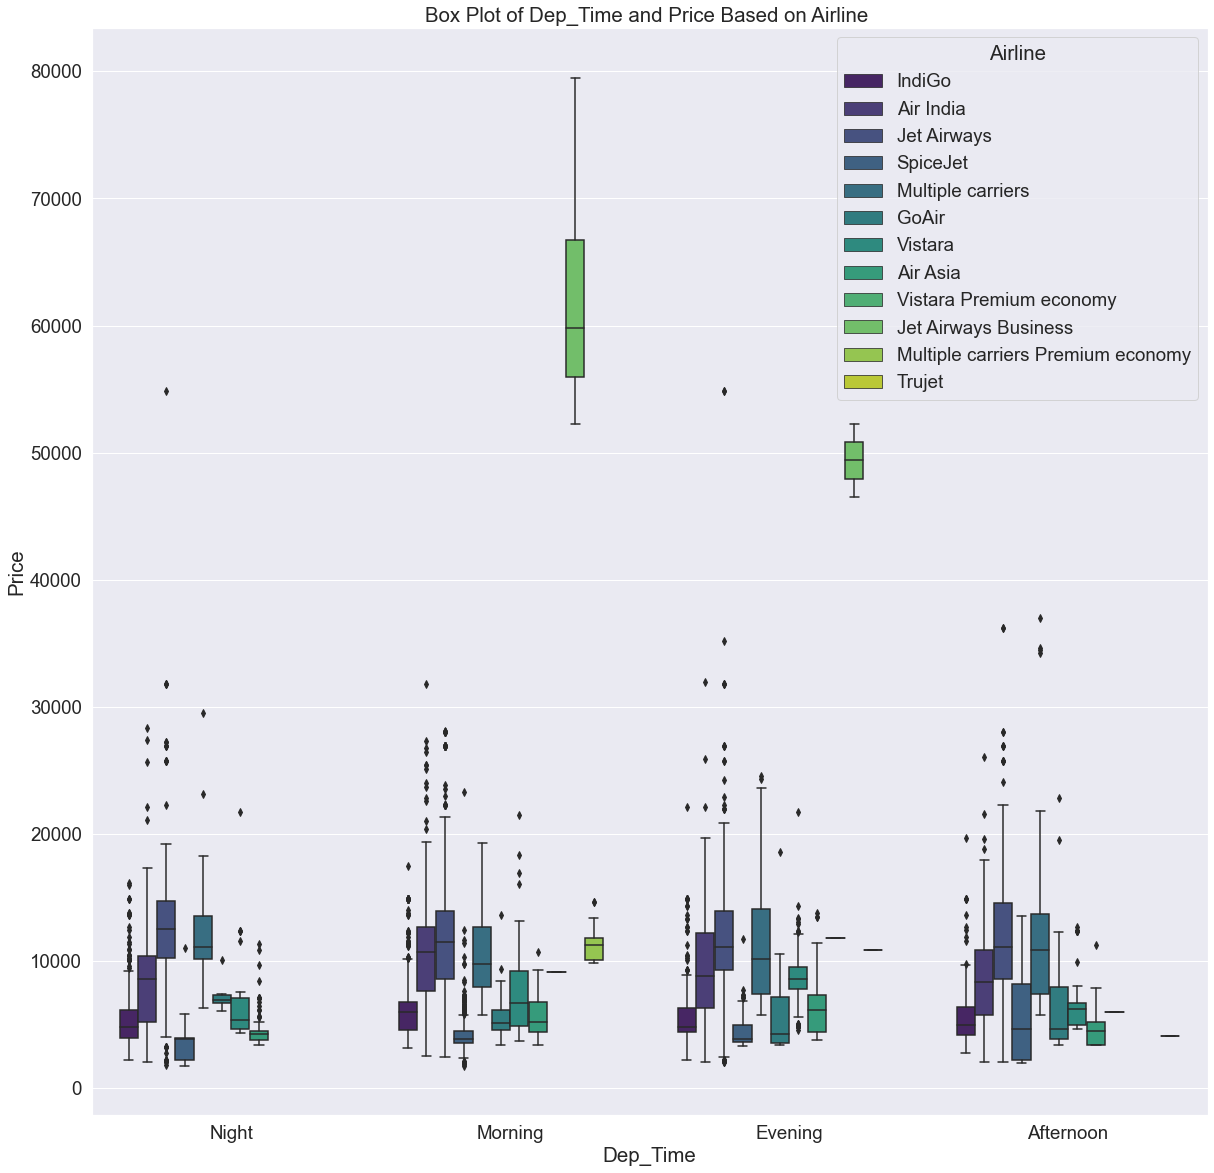

In [72]:
sns.boxplot( x = "Dep_Time" , y = "Price" , data = df ,hue = "Airline" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of Dep_Time and Price Based on Airline ")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

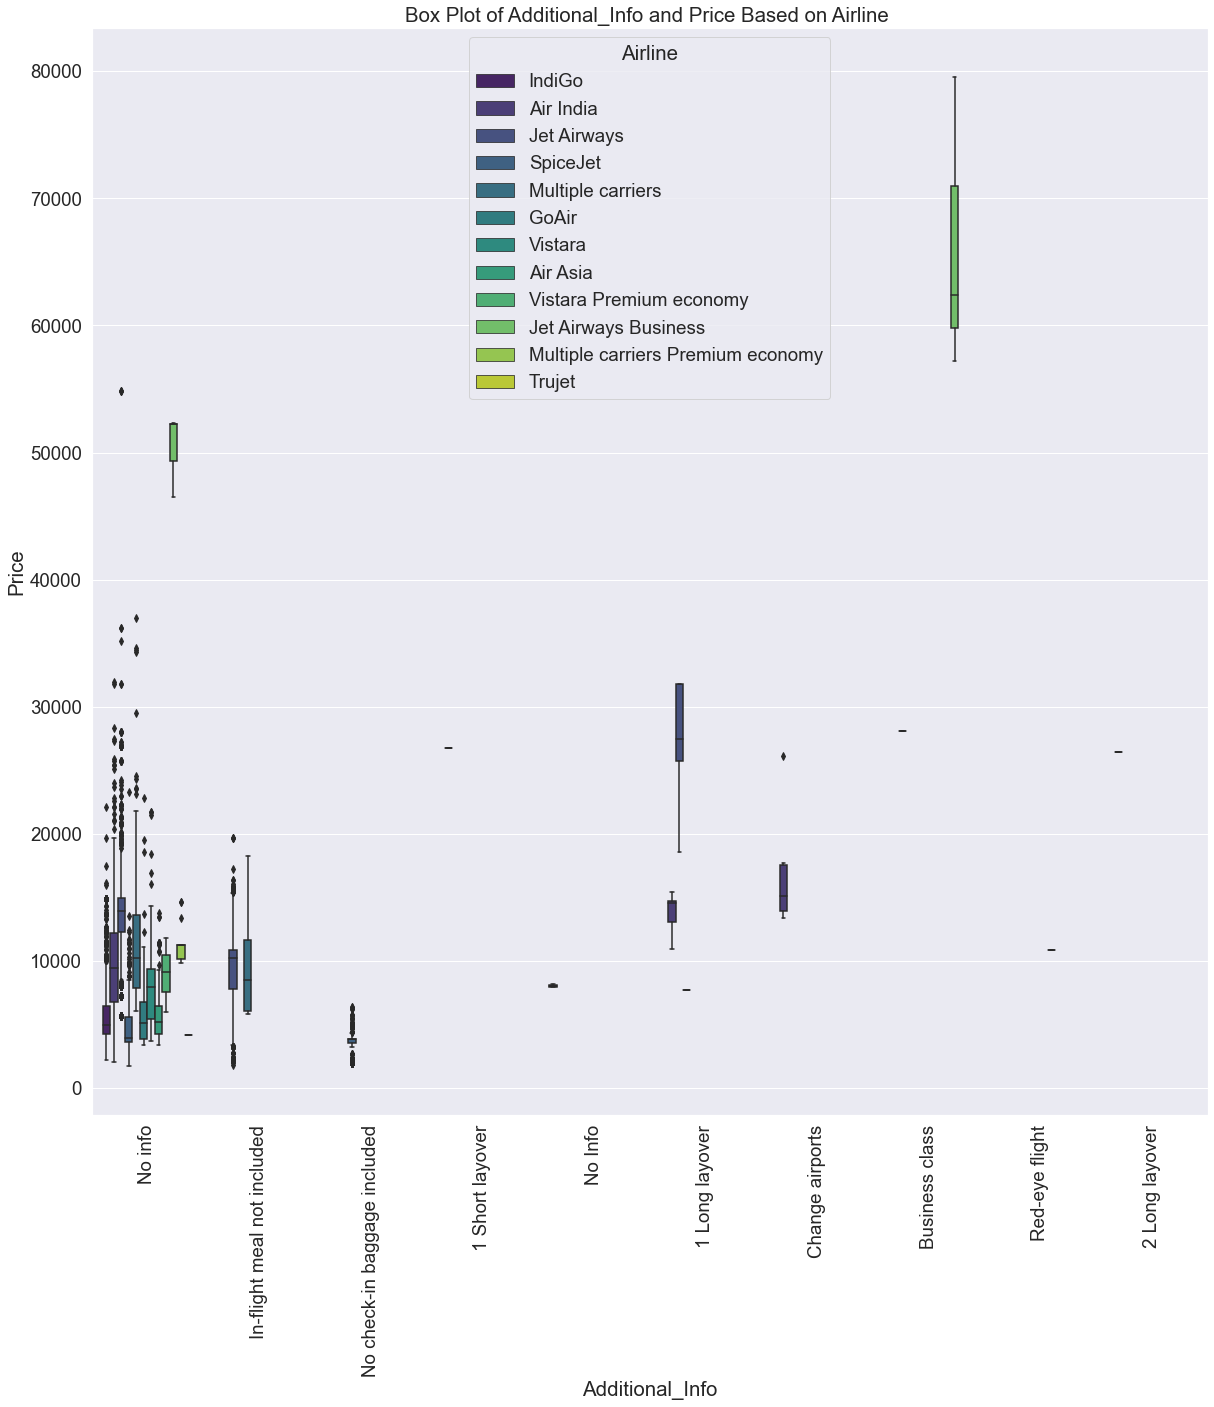

In [73]:
sns.boxplot( x = "Additional_Info" , y = "Price" , data = df ,hue = "Airline" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of Additional_Info and Price Based on Airline ")
plt.xticks(rotation = 90)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Source           10683 non-null  object        
 2   Destination      10683 non-null  object        
 3   Dep_Time         10683 non-null  object        
 4   Arrival_Time     10683 non-null  object        
 5   Duration         10683 non-null  int32         
 6   Total_Stops      10683 non-null  object        
 7   Additional_Info  10683 non-null  object        
 8   Price            10683 non-null  int64         
 9   Date             10683 non-null  datetime64[ns]
 10  Day              10683 non-null  int64         
 11  Month            10683 non-null  int64         
 12  Weekday          10683 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(4), object(7)
memory usage: 1.0+ MB


Text(0.5, 1.0, 'Count Plot of Airline ')

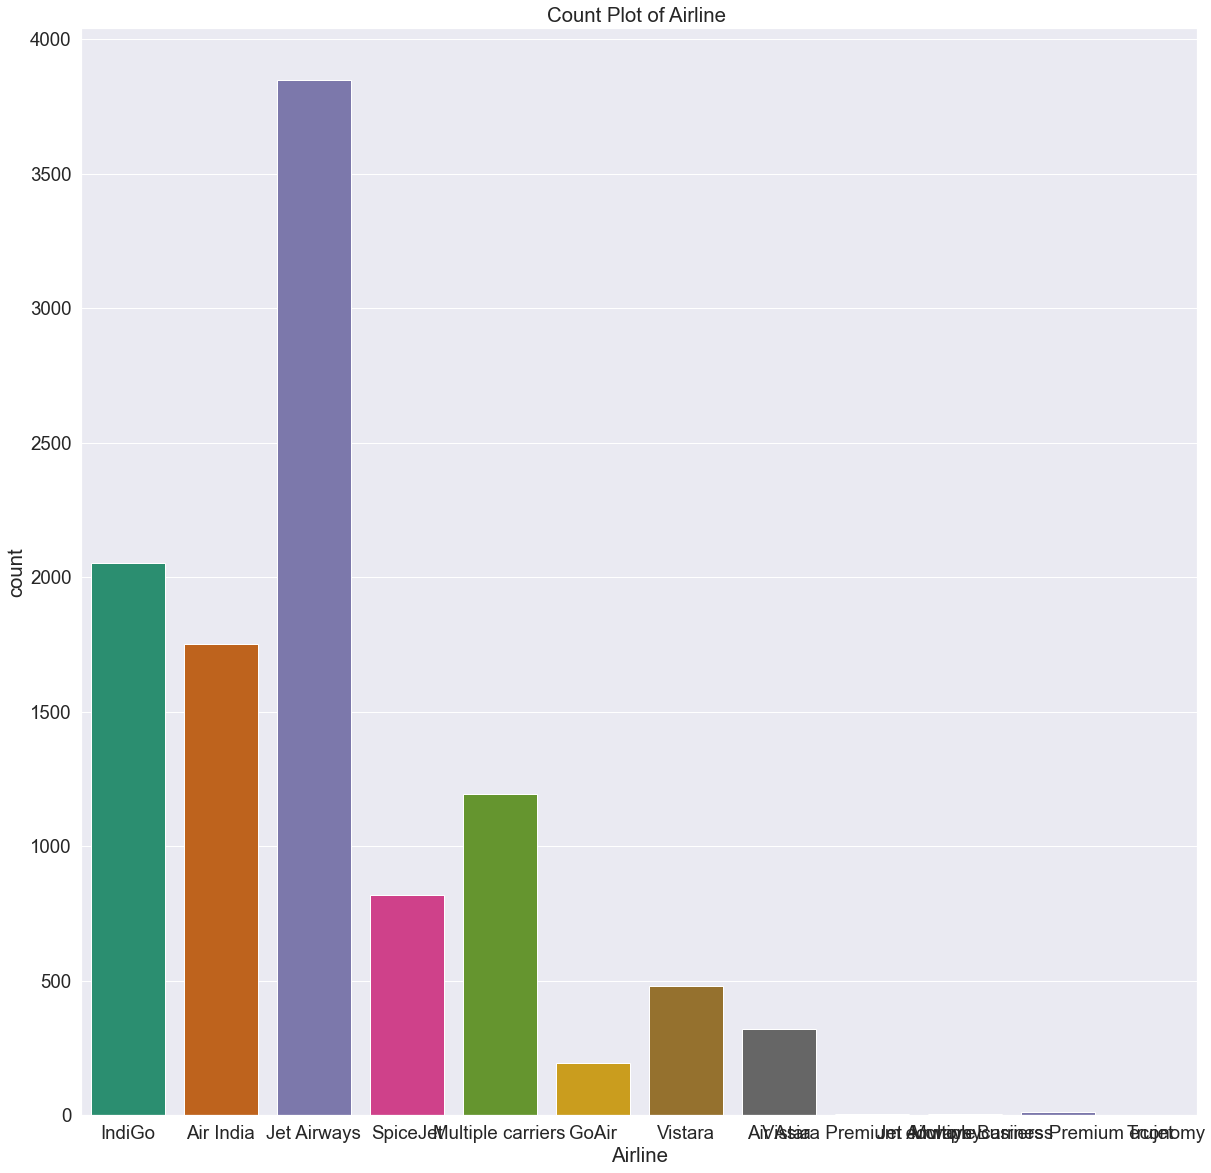

In [75]:
sns.countplot( x = "Airline"  , data = df , palette="Dark2")
plt.title("Count Plot of Airline ")


Text(0.5, 1.0, 'Count Plot of Source ')

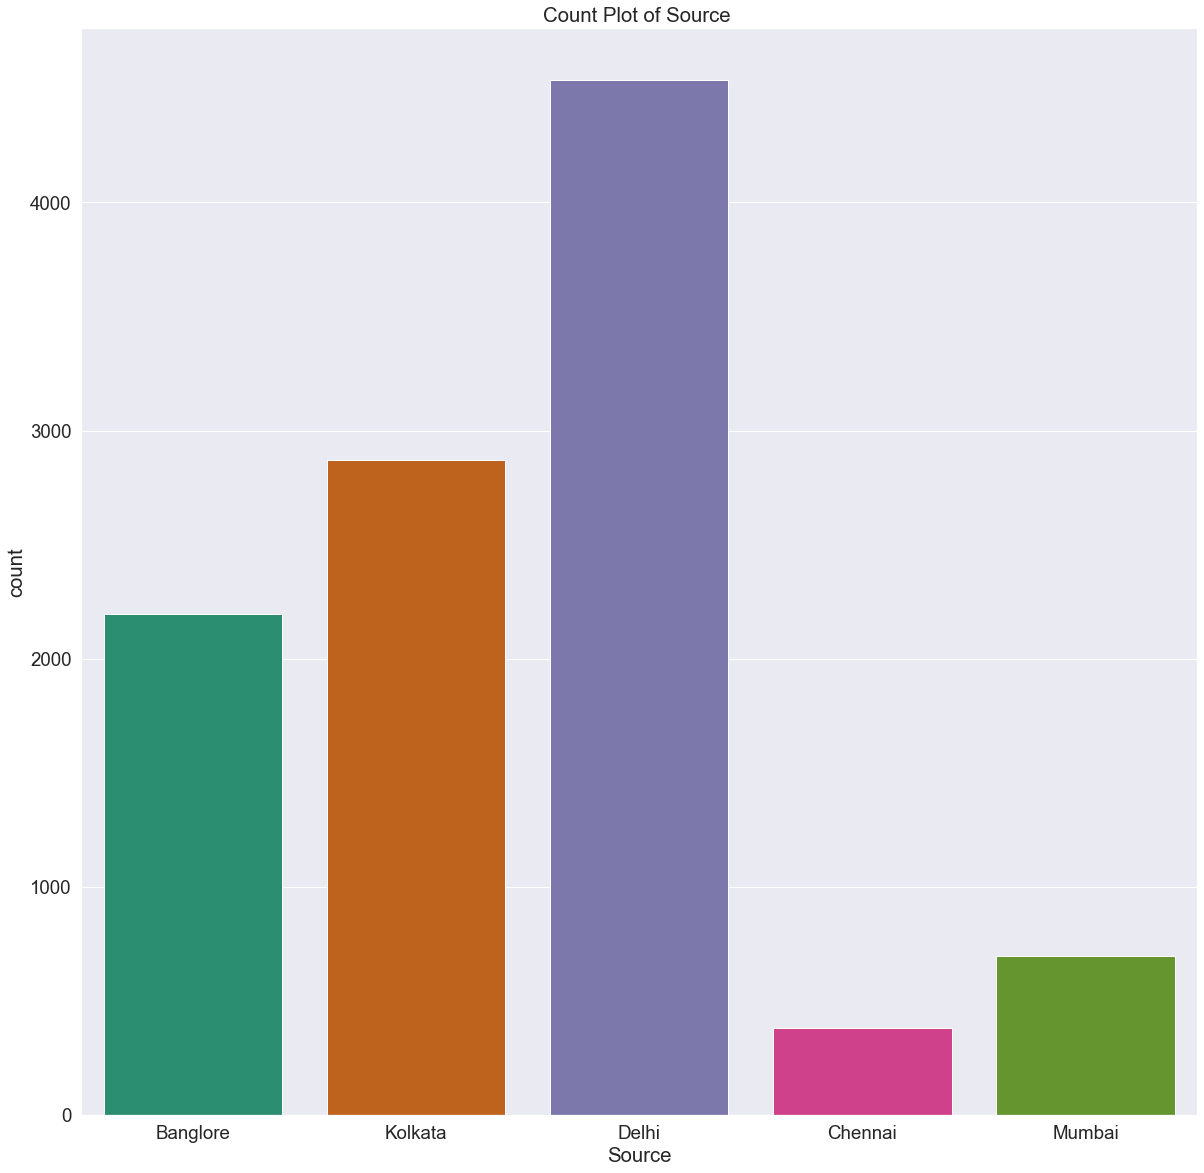

In [76]:
sns.countplot( x = "Source"  , data = df , palette="Dark2")
plt.title("Count Plot of Source ")


Text(0.5, 1.0, 'Count Plot of Destination ')

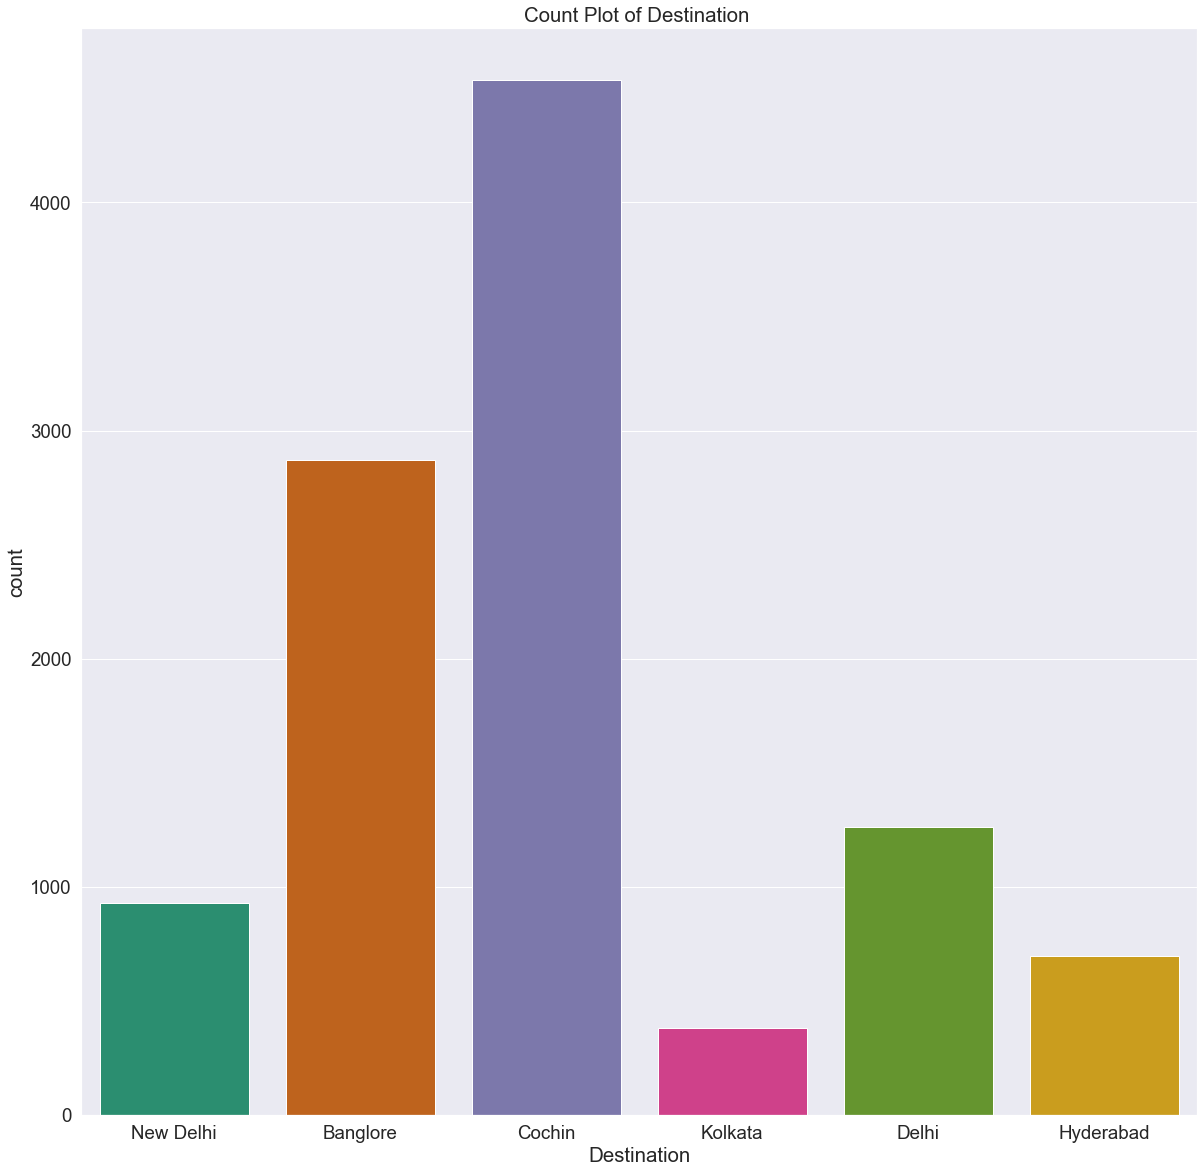

In [77]:
sns.countplot( x = "Destination"  , data = df , palette="Dark2")
plt.title("Count Plot of Destination ")


Text(0.5, 1.0, 'Count Plot of Dep_Time ')

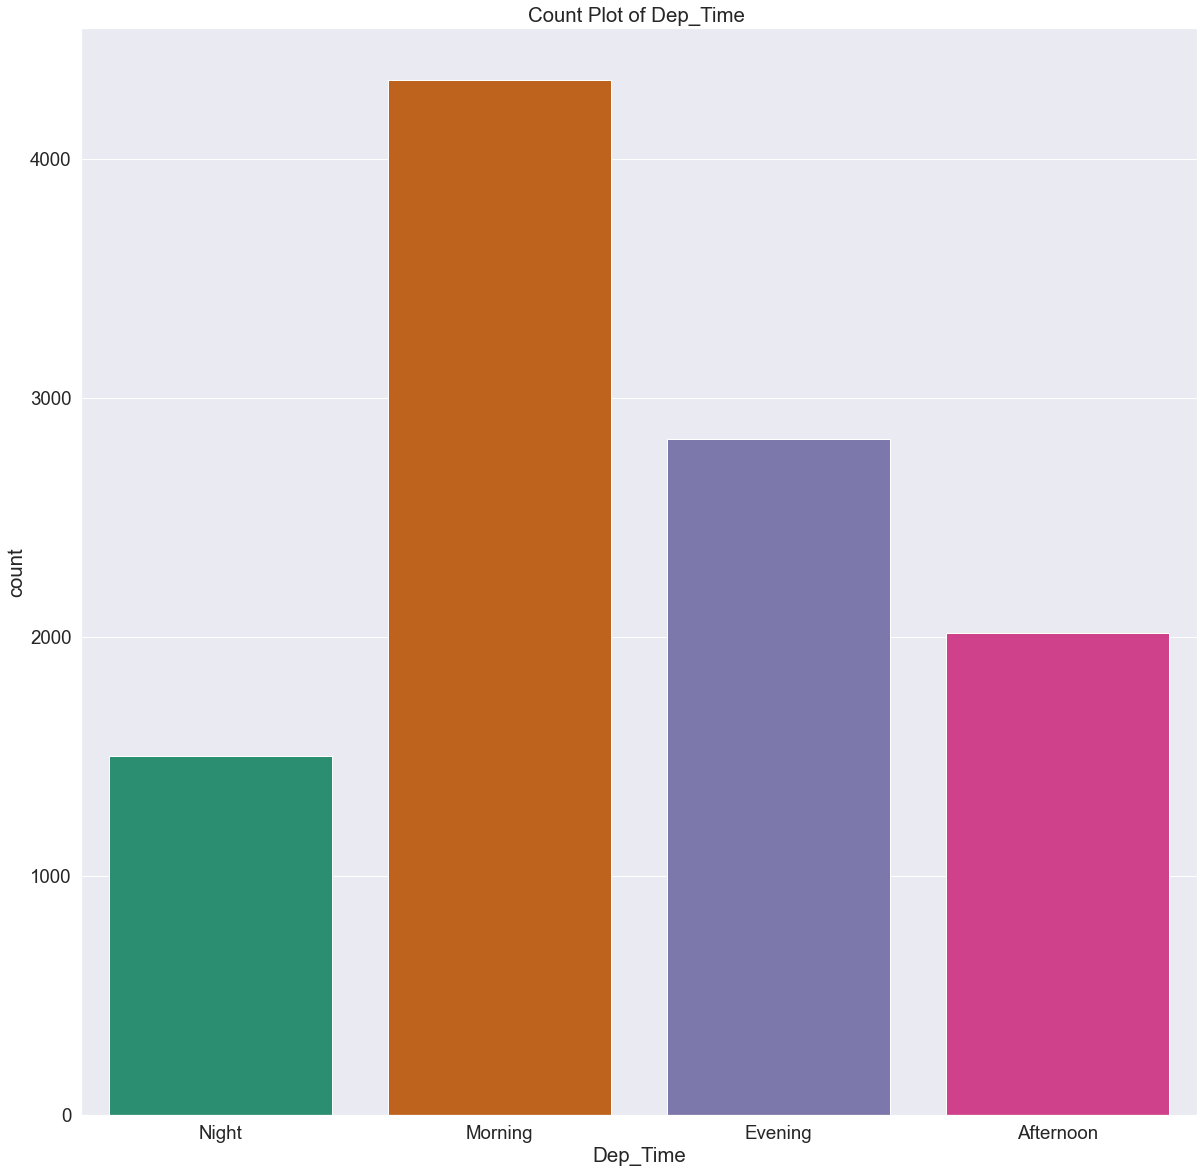

In [78]:
sns.countplot( x = "Dep_Time"  , data = df , palette="Dark2")
plt.title("Count Plot of Dep_Time ")


Text(0.5, 1.0, 'Count Plot of Arrival_Time ')

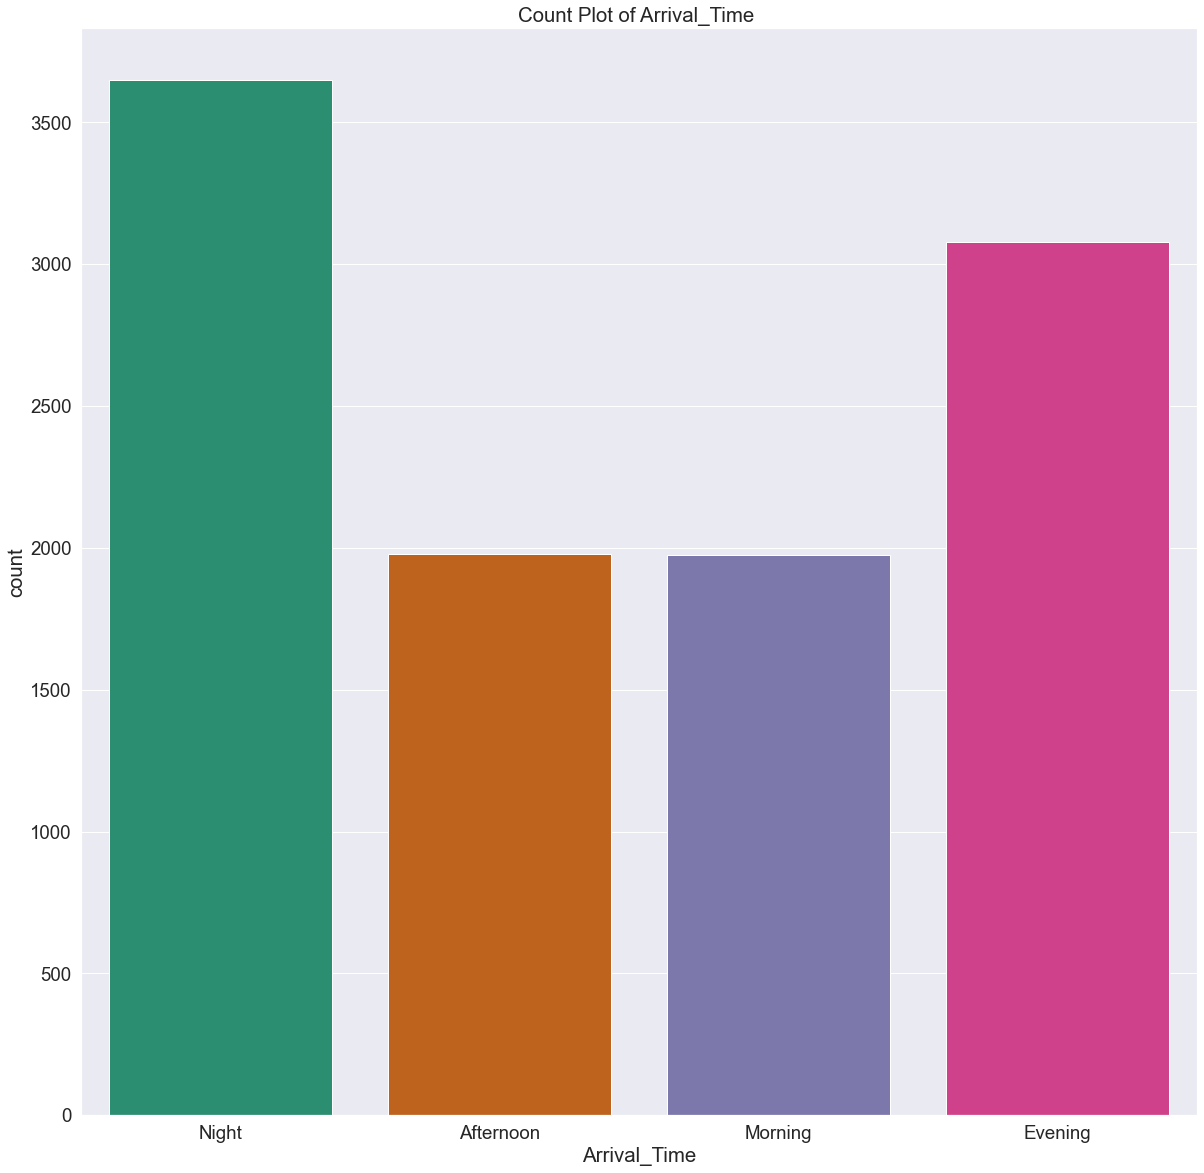

In [79]:
sns.countplot( x = "Arrival_Time"  , data = df , palette="Dark2")
plt.title("Count Plot of Arrival_Time ")


Text(0.5, 1.0, 'Count Plot of Total_Stops ')

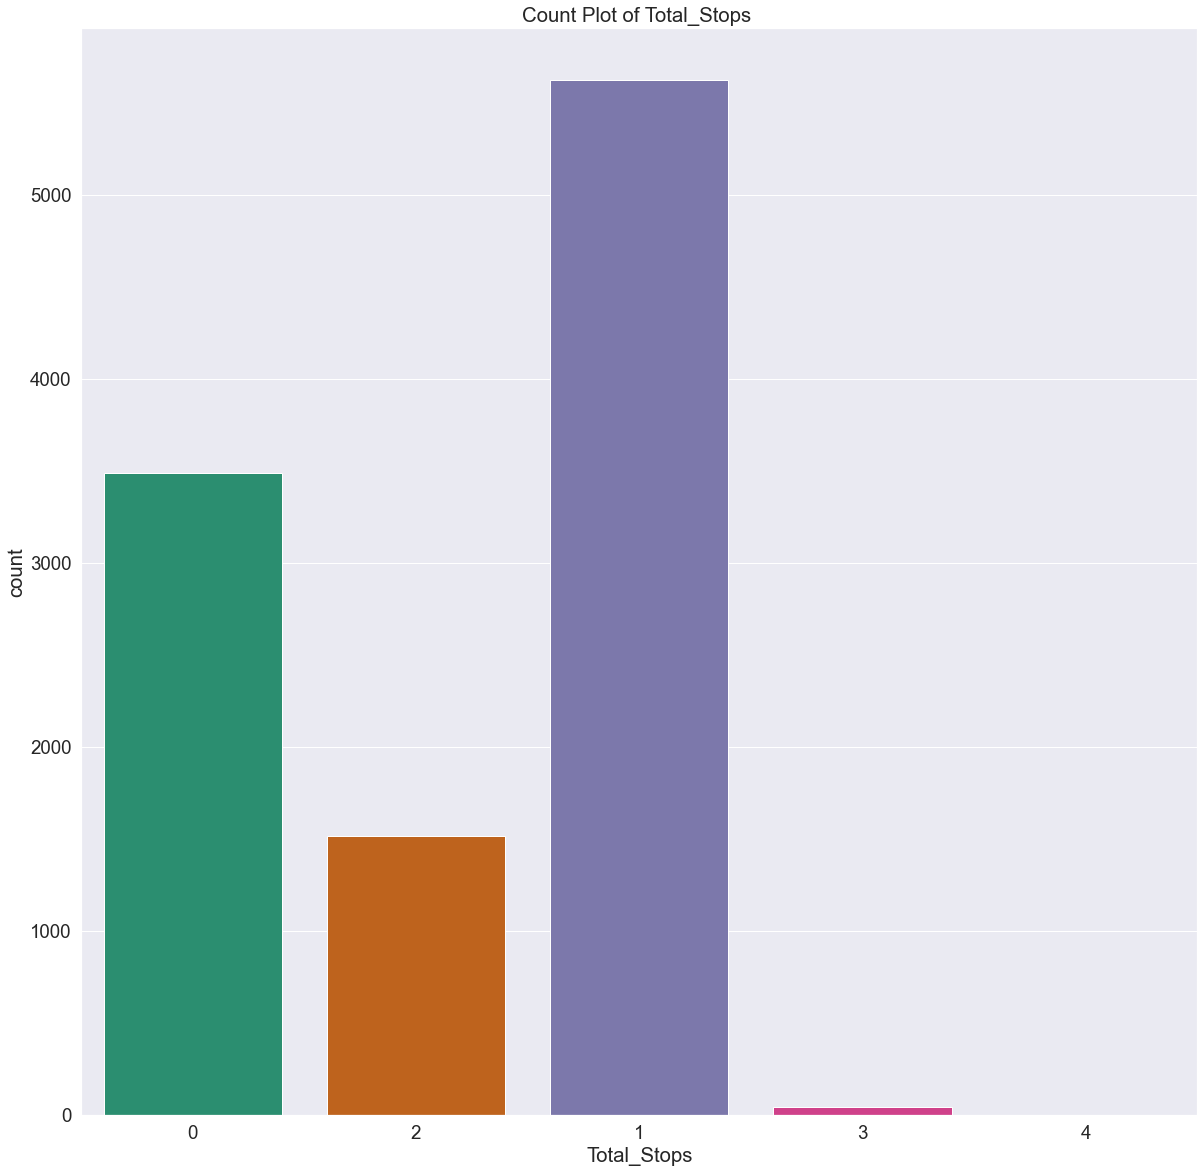

In [80]:
sns.countplot( x = "Total_Stops"  , data = df , palette="Dark2")
plt.title("Count Plot of Total_Stops ")


Text(0.5, 1.0, 'Count Plot of Additional_Info ')

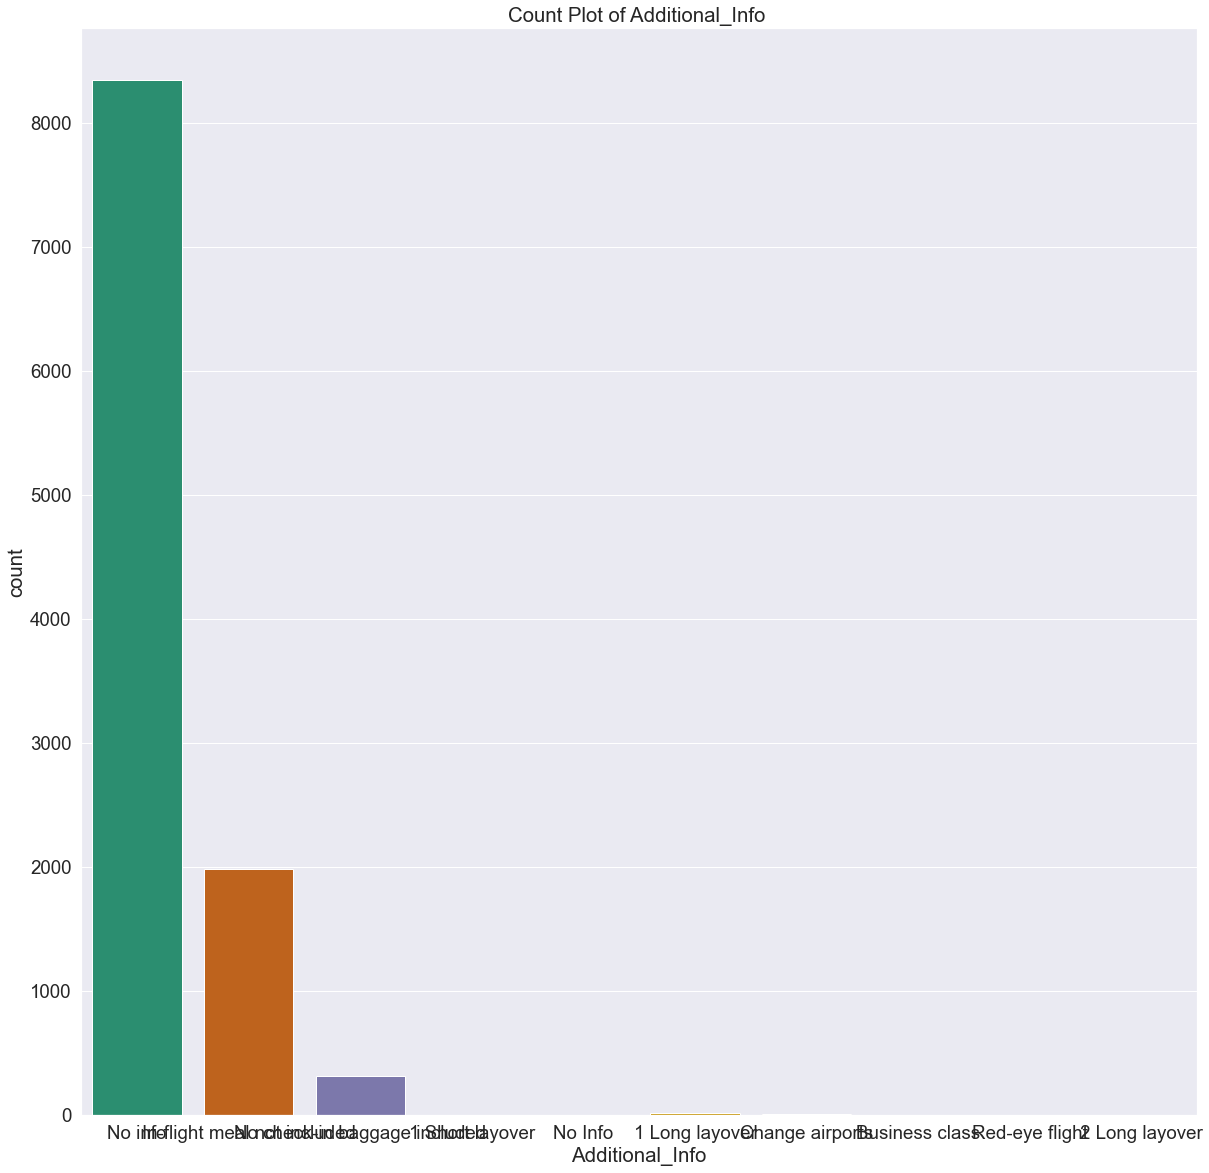

In [81]:
sns.countplot( x = "Additional_Info"  , data = df , palette="Dark2")
plt.title("Count Plot of Additional_Info ")


Text(0.5, 1.0, 'Count Plot of Day ')

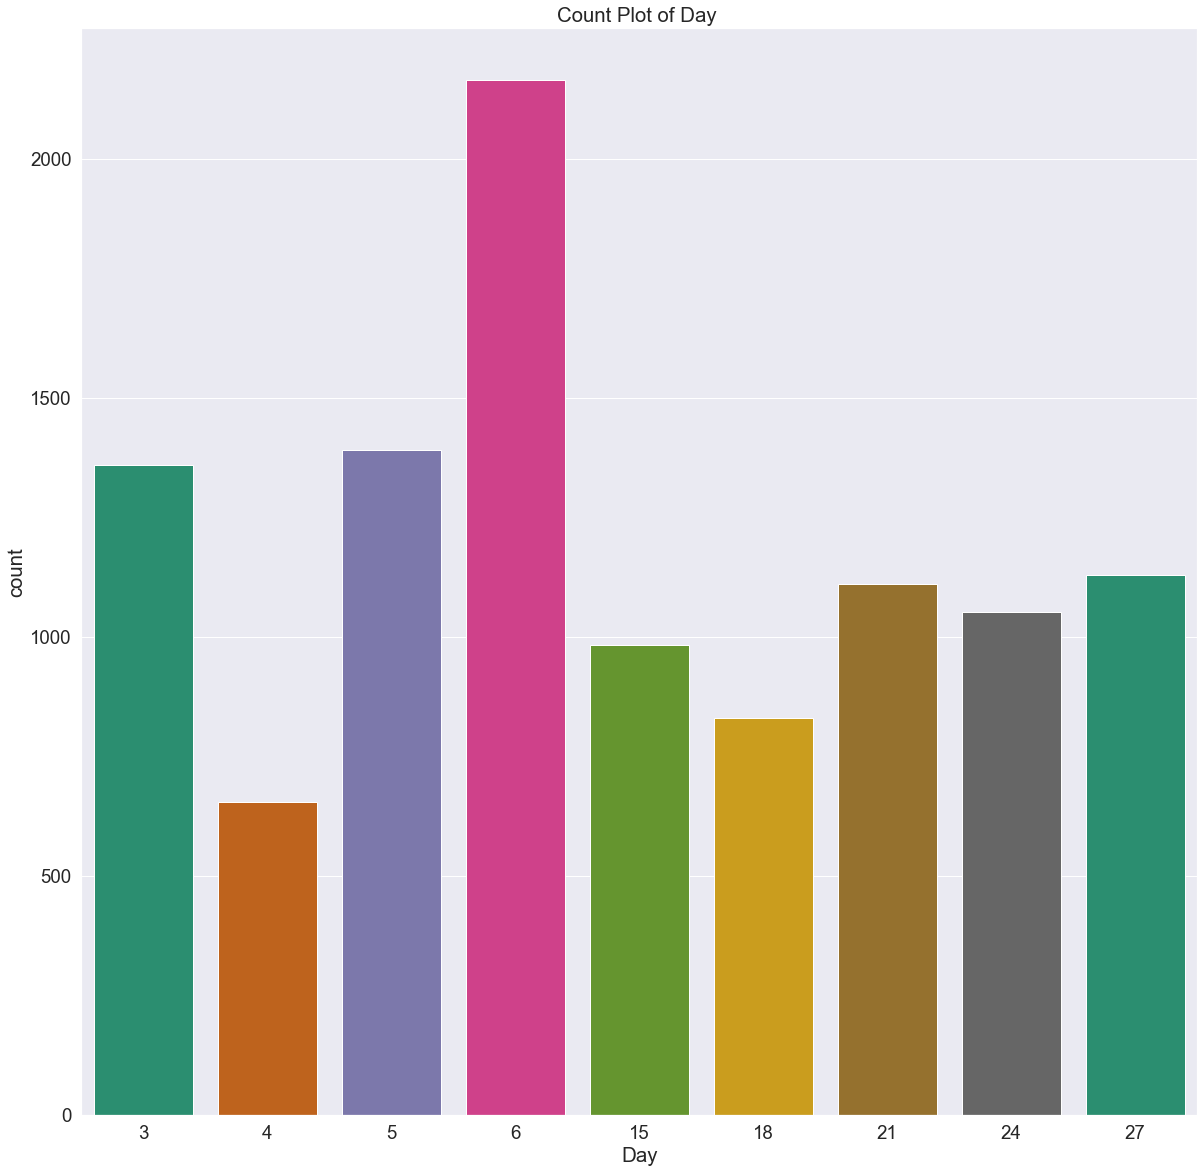

In [82]:
sns.countplot( x = "Day"  , data = df , palette="Dark2")
plt.title("Count Plot of Day ")


Text(0.5, 1.0, 'Count Plot of Month ')

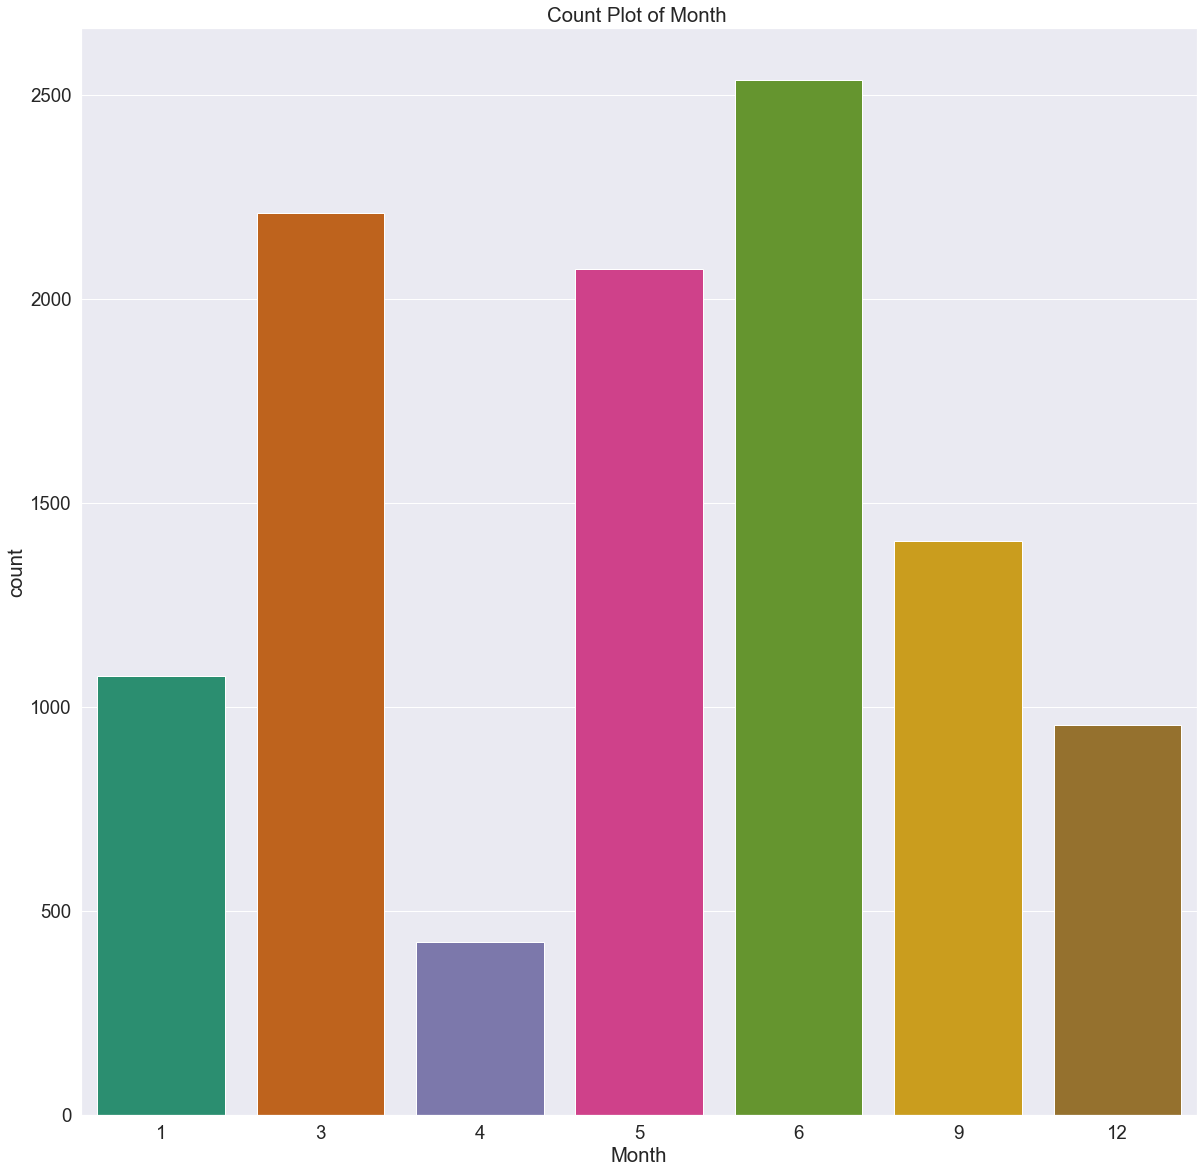

In [83]:
sns.countplot( x = "Month"  , data = df , palette="Dark2")
plt.title("Count Plot of Month ")


Text(0.5, 1.0, 'Count Plot of Weekday ')

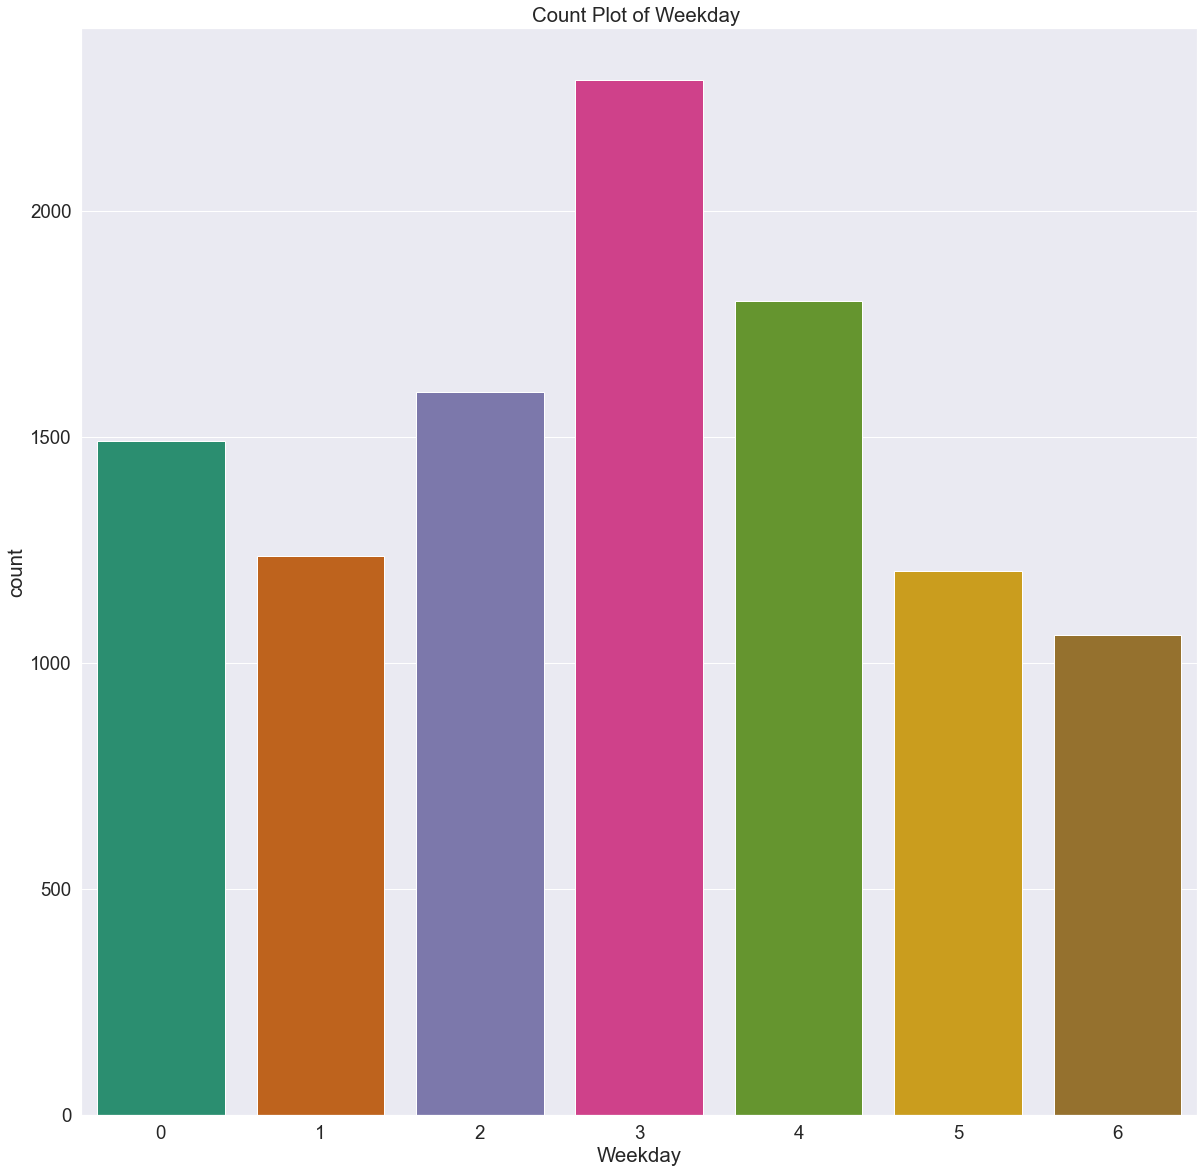

In [84]:
sns.countplot( x = "Weekday"  , data = df , palette="Dark2")
plt.title("Count Plot of Weekday ")


In [85]:
#get describtion file of data ::

profile = pp.ProfileReport(df , title = "Flight_Fare_Report" , explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [86]:
# To save report as html file
profile.to_file("Flight_Fare_Data_Report.html")


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<p id = "ETl">ETL-Process</p>

# 1 - Feature_Engineering Technice ::
*********************************************************************
* Its one of the most important phase in data scientist life cycle which use to generate new usefull features from the old  features which not enough for train model.

In [87]:
df

Airline    Source Destination   Dep_Time Arrival_Time  Duration  \
0           IndiGo  Banglore   New Delhi      Night        Night       170   
1        Air India   Kolkata    Banglore    Morning    Afternoon       445   
2      Jet Airways     Delhi      Cochin    Morning        Night      1140   
3           IndiGo   Kolkata    Banglore    Evening        Night       325   
4           IndiGo  Banglore   New Delhi    Evening        Night       285   
...            ...       ...         ...        ...          ...       ...   
10678     Air Asia   Kolkata    Banglore    Evening        Night       150   
10679    Air India   Kolkata    Banglore    Evening        Night       155   
10680  Jet Airways  Banglore       Delhi    Morning    Afternoon       180   
10681      Vistara  Banglore   New Delhi  Afternoon    Afternoon       160   
10682    Air India     Delhi      Cochin    Morning      Evening       500   

      Total_Stops Additional_Info  Price       Date  Day  Month  Weekday  
0               0         No info   3897 2019-03-24   24      3        6  
1               2         No info   7662 2019-01-05    5      1        5  
2               2         No info  13882 2019-09-06    6      9        4  
3               1         No info   6218 2019-12-05    5     12        3  
4               1         No info  13302 2019-01-03    3      1        3  
...           ...             ...    ...        ...  ...    ...      ...  
10678           0         No info   4107 2019-09-04    4      9        2  
10679           0         No info   4145 2019-04-27   27      4        5  
10680           0         No info   7229 2019-04-27   27      4        5  
10681           0         No info  12648 2019-01-03    3      1        3  
10682           2         No info  11753 2019-09-05    5      9        3  

[10683 rows x 13 columns]

* We are already we apply feature-engineering on data to extract more efficient features Becouse that current features not efficient for Traning thae Model. 

# 2 - Transform_data ::
*************************************************
* 2 :: *Cleancing data* ::
     * Data in the real state dont comes cleaned is come dirty may include ::
         * non_logic_data_values.
         * Noisy and Errors.
         * Duplicaties data.
         * Missing_data_Values.

# non_logic_Values ::
***********************************
* Its one of the common issuse which consider us on data which data may include errors , noisy data such as :
    * Negaive values and that not logic.
    * Fraction Values and that not logic also.

In [88]:
# Check data include Non_logic data_Values ::

for col in df.columns :
    print(f"The Col ({col})\n")
    print(f"The Unique Values of ({col}) :: {df[col].unique()}\n\n")
    print(f"The Value_Counts of ({col}) :: \n{df[col].value_counts()}")
    print("-" * 80)

The Col (Airline)

The Unique Values of (Airline) :: ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']


The Value_Counts of (Airline) :: 
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
--------------------------------------------------------------------------------
The Col (Source)

The Unique Values of (Source) :: ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


Th

# Dublicates data ::
***************************
* Its also one of the most common issue which may found reapat or redendant data that generate from :
    * Miss understanding from data entry person.
    * There are two cols have diff names but present the same entity.

In [89]:
# detect duplicated data ::

df.duplicated().sum()

310

In [90]:
# To confirm that ::
df.drop_duplicates(inplace=True)

In [91]:
# investigate data not include  duplicaties data ::

df.duplicated().sum()

0

# Missing Dtat Values ::
**********************************
* Its The Most common issue which consider us on data that generate from ::
    * Miss understanding from data entry person.
    * Falier the impute system.
* We must identify that missing data and impute it, we will solve that issue by ::
    * Fill Missing values use :
        * Mean value if data not include outliers.
        * Median value if data include outliers.
        * Mode value if that categorical data.
    * Or Impute data use :;
        * Simpleimputer ML Technice.
        * KNN ML Model.

In [92]:
# detect missing data values ::

df.isnull().sum()

Airline            0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Day                0
Month              0
Weekday            0
dtype: int64

In [93]:
Num_Missing     = df.isnull().sum().sort_values(ascending = False)
Precent_Missing = ( df.isnull().sum() / df.isnull().count() ).sort_values(ascending = False)
Missing_Data    = pd.concat( [ Num_Missing , Precent_Missing ] ,axis=1 , keys = ["Num_Missing" , "Prec_Missing"])
Missing_Data

Num_Missing  Prec_Missing
Airline                    0           0.0
Source                     0           0.0
Destination                0           0.0
Dep_Time                   0           0.0
Arrival_Time               0           0.0
Duration                   0           0.0
Total_Stops                0           0.0
Additional_Info            0           0.0
Price                      0           0.0
Date                       0           0.0
Day                        0           0.0
Month                      0           0.0
Weekday                    0           0.0

* From The result above we can see that data not include Missing-data-values.

* 3 :: *Data_Preprocessing* ::
    * Data may include ::
        * Outliers values.
        * Impalanced classes.
        * Text data.

# Outliers Values ::
**********************************
* Its one of the most common issuse which conseder us on data But we must investigate that value already outliers or anominal data values Based on ::
    * Understanding the domain of the Business well.
    * If num of ouliers values few that mean may that values outlier.
    * If num of outliers values hue that mean may that values not outliers.
* If that data outlier we will replace it by mean value or drop it.


In [94]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Date', 'Day',
       'Month', 'Weekday'],
      dtype='object')

In [95]:
# we will drop useless feature from the data such as Date featur.

df.drop("Date" , axis=1 , inplace = True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10373 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10373 non-null  object
 1   Source           10373 non-null  object
 2   Destination      10373 non-null  object
 3   Dep_Time         10373 non-null  object
 4   Arrival_Time     10373 non-null  object
 5   Duration         10373 non-null  int32 
 6   Total_Stops      10373 non-null  object
 7   Additional_Info  10373 non-null  object
 8   Price            10373 non-null  int64 
 9   Day              10373 non-null  int64 
 10  Month            10373 non-null  int64 
 11  Weekday          10373 non-null  int64 
dtypes: int32(1), int64(4), object(7)
memory usage: 1013.0+ KB


<AxesSubplot:ylabel='Price'>

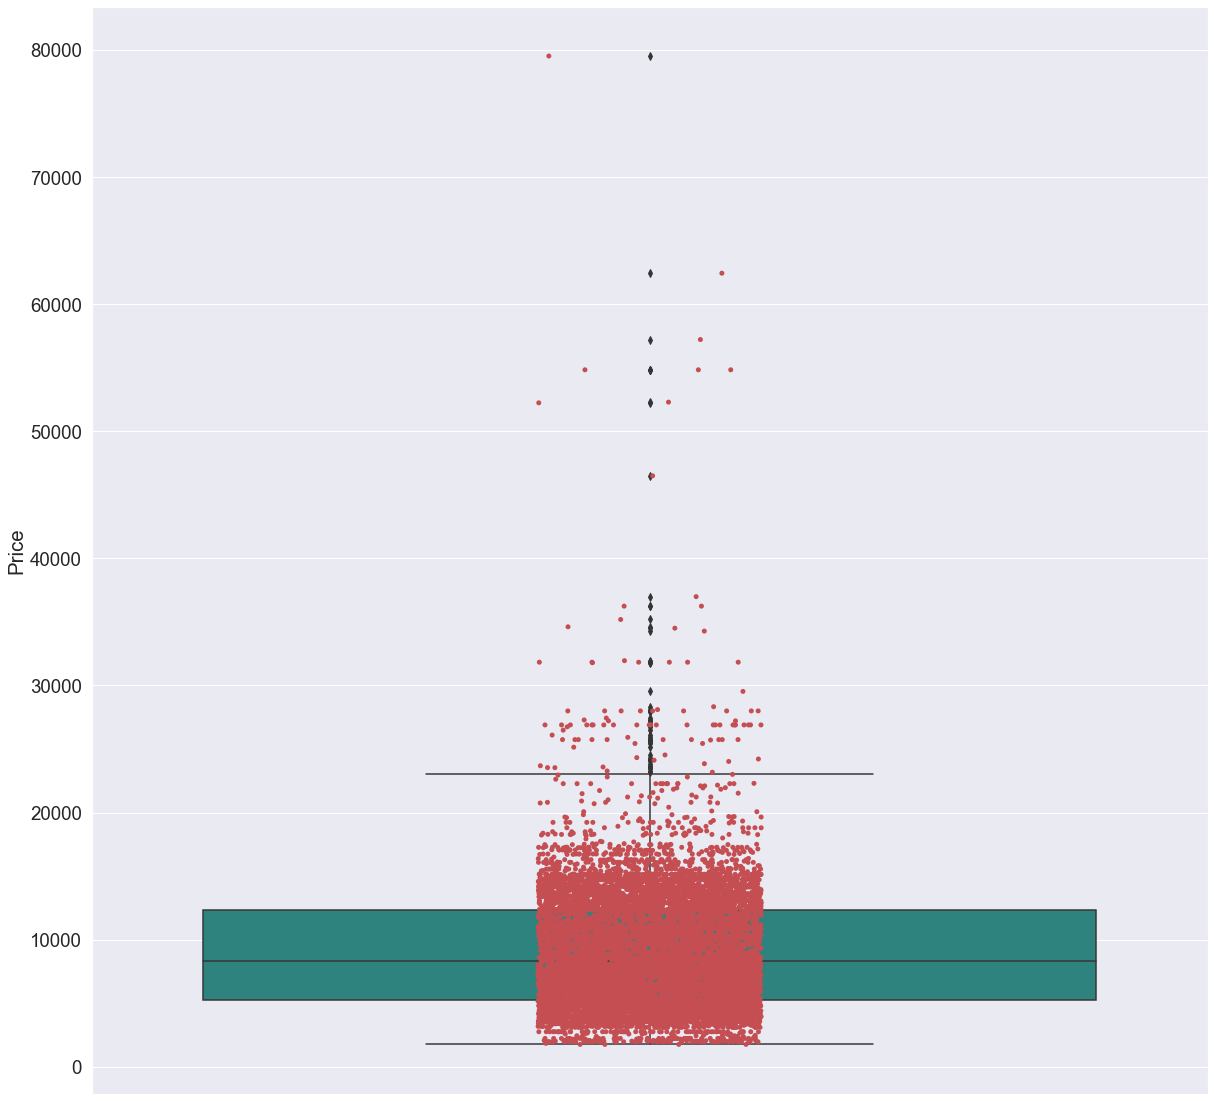

In [97]:
# detect outliers values in age feature ::

sns.boxplot  (y = "Price" , data = df , palette="viridis")
sns.stripplot(y = "Price" , data = df , color = "r")

<AxesSubplot:ylabel='Duration'>

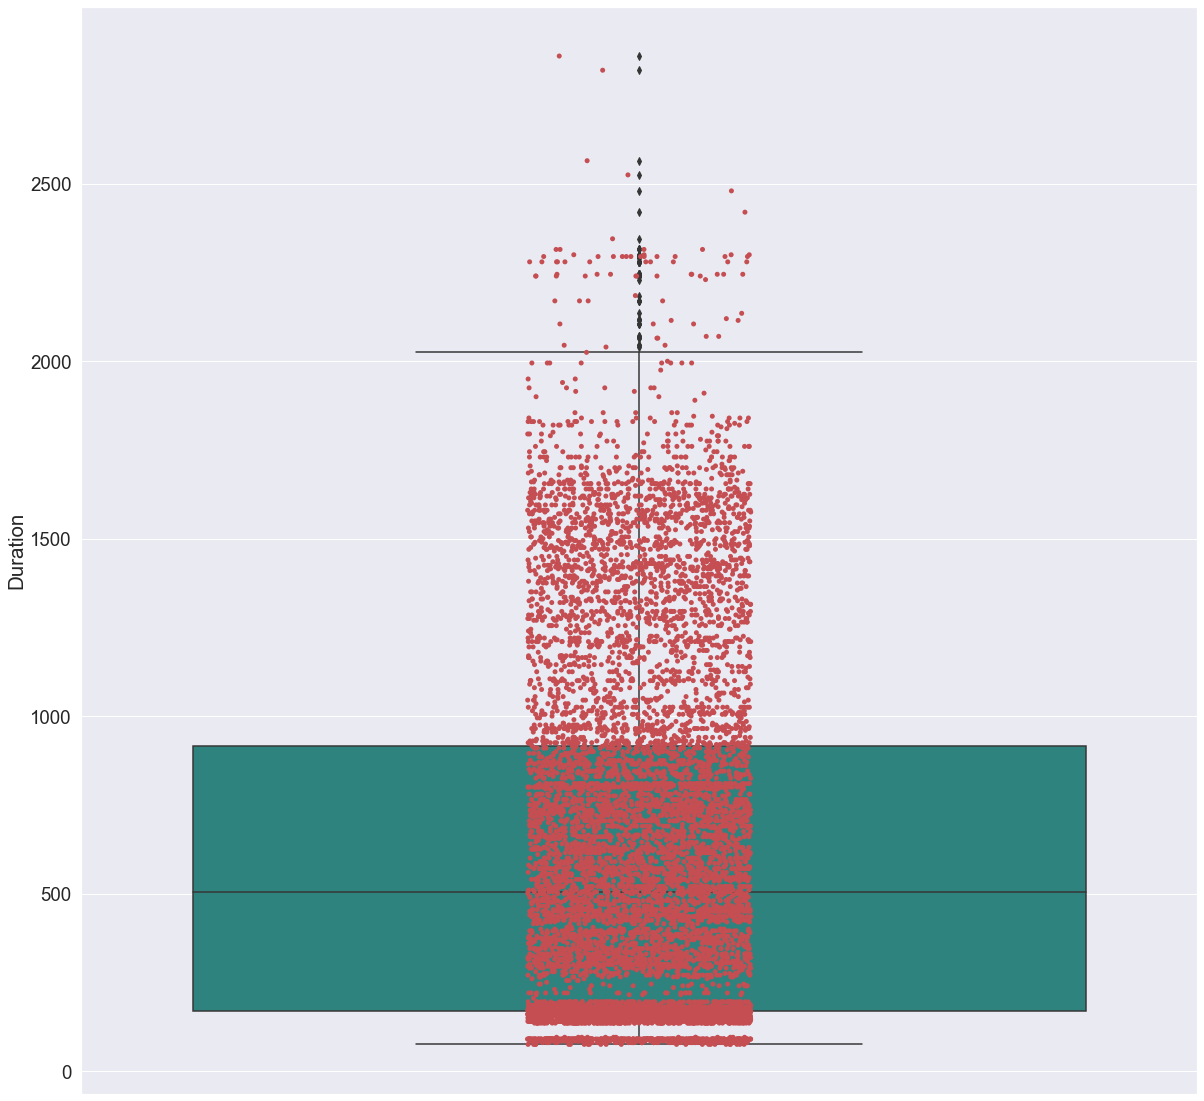

In [98]:
# detect outliers values in age feature ::

sns.boxplot  (y = "Duration" , data = df , palette="viridis")
sns.stripplot(y = "Duration" , data = df , color = "r")

# Processing Text data ::
**********************************************
* We must handling test data into numerical numbers becouse ML Models not understanding that text data so that we use one_hot_encoding or one_variable_encoding technices.


In [99]:
# Import label encoder 
colnames = list(df.columns)
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
for col in colnames:
    if df[col].dtype==object:
        df[col]= label_encoder.fit_transform(df[col]) 

In [100]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Day', 'Month',
       'Weekday'],
      dtype='object')

In [101]:
df.head(2)

Airline  Source  Destination  Dep_Time  Arrival_Time  Duration  \
0        3       0            5         3             3       170   
1        1       3            0         2             0       445   

   Total_Stops  Additional_Info  Price  Day  Month  Weekday  
0            0                8   3897   24      3        6  
1            2                8   7662    5      1        5

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'Airline'),
  Text(0, 1.5, 'Source'),
  Text(0, 2.5, 'Destination'),
  Text(0, 3.5, 'Dep_Time'),
  Text(0, 4.5, 'Arrival_Time'),
  Text(0, 5.5, 'Duration'),
  Text(0, 6.5, 'Total_Stops'),
  Text(0, 7.5, 'Additional_Info'),
  Text(0, 8.5, 'Price'),
  Text(0, 9.5, 'Day'),
  Text(0, 10.5, 'Month'),
  Text(0, 11.5, 'Weekday')])

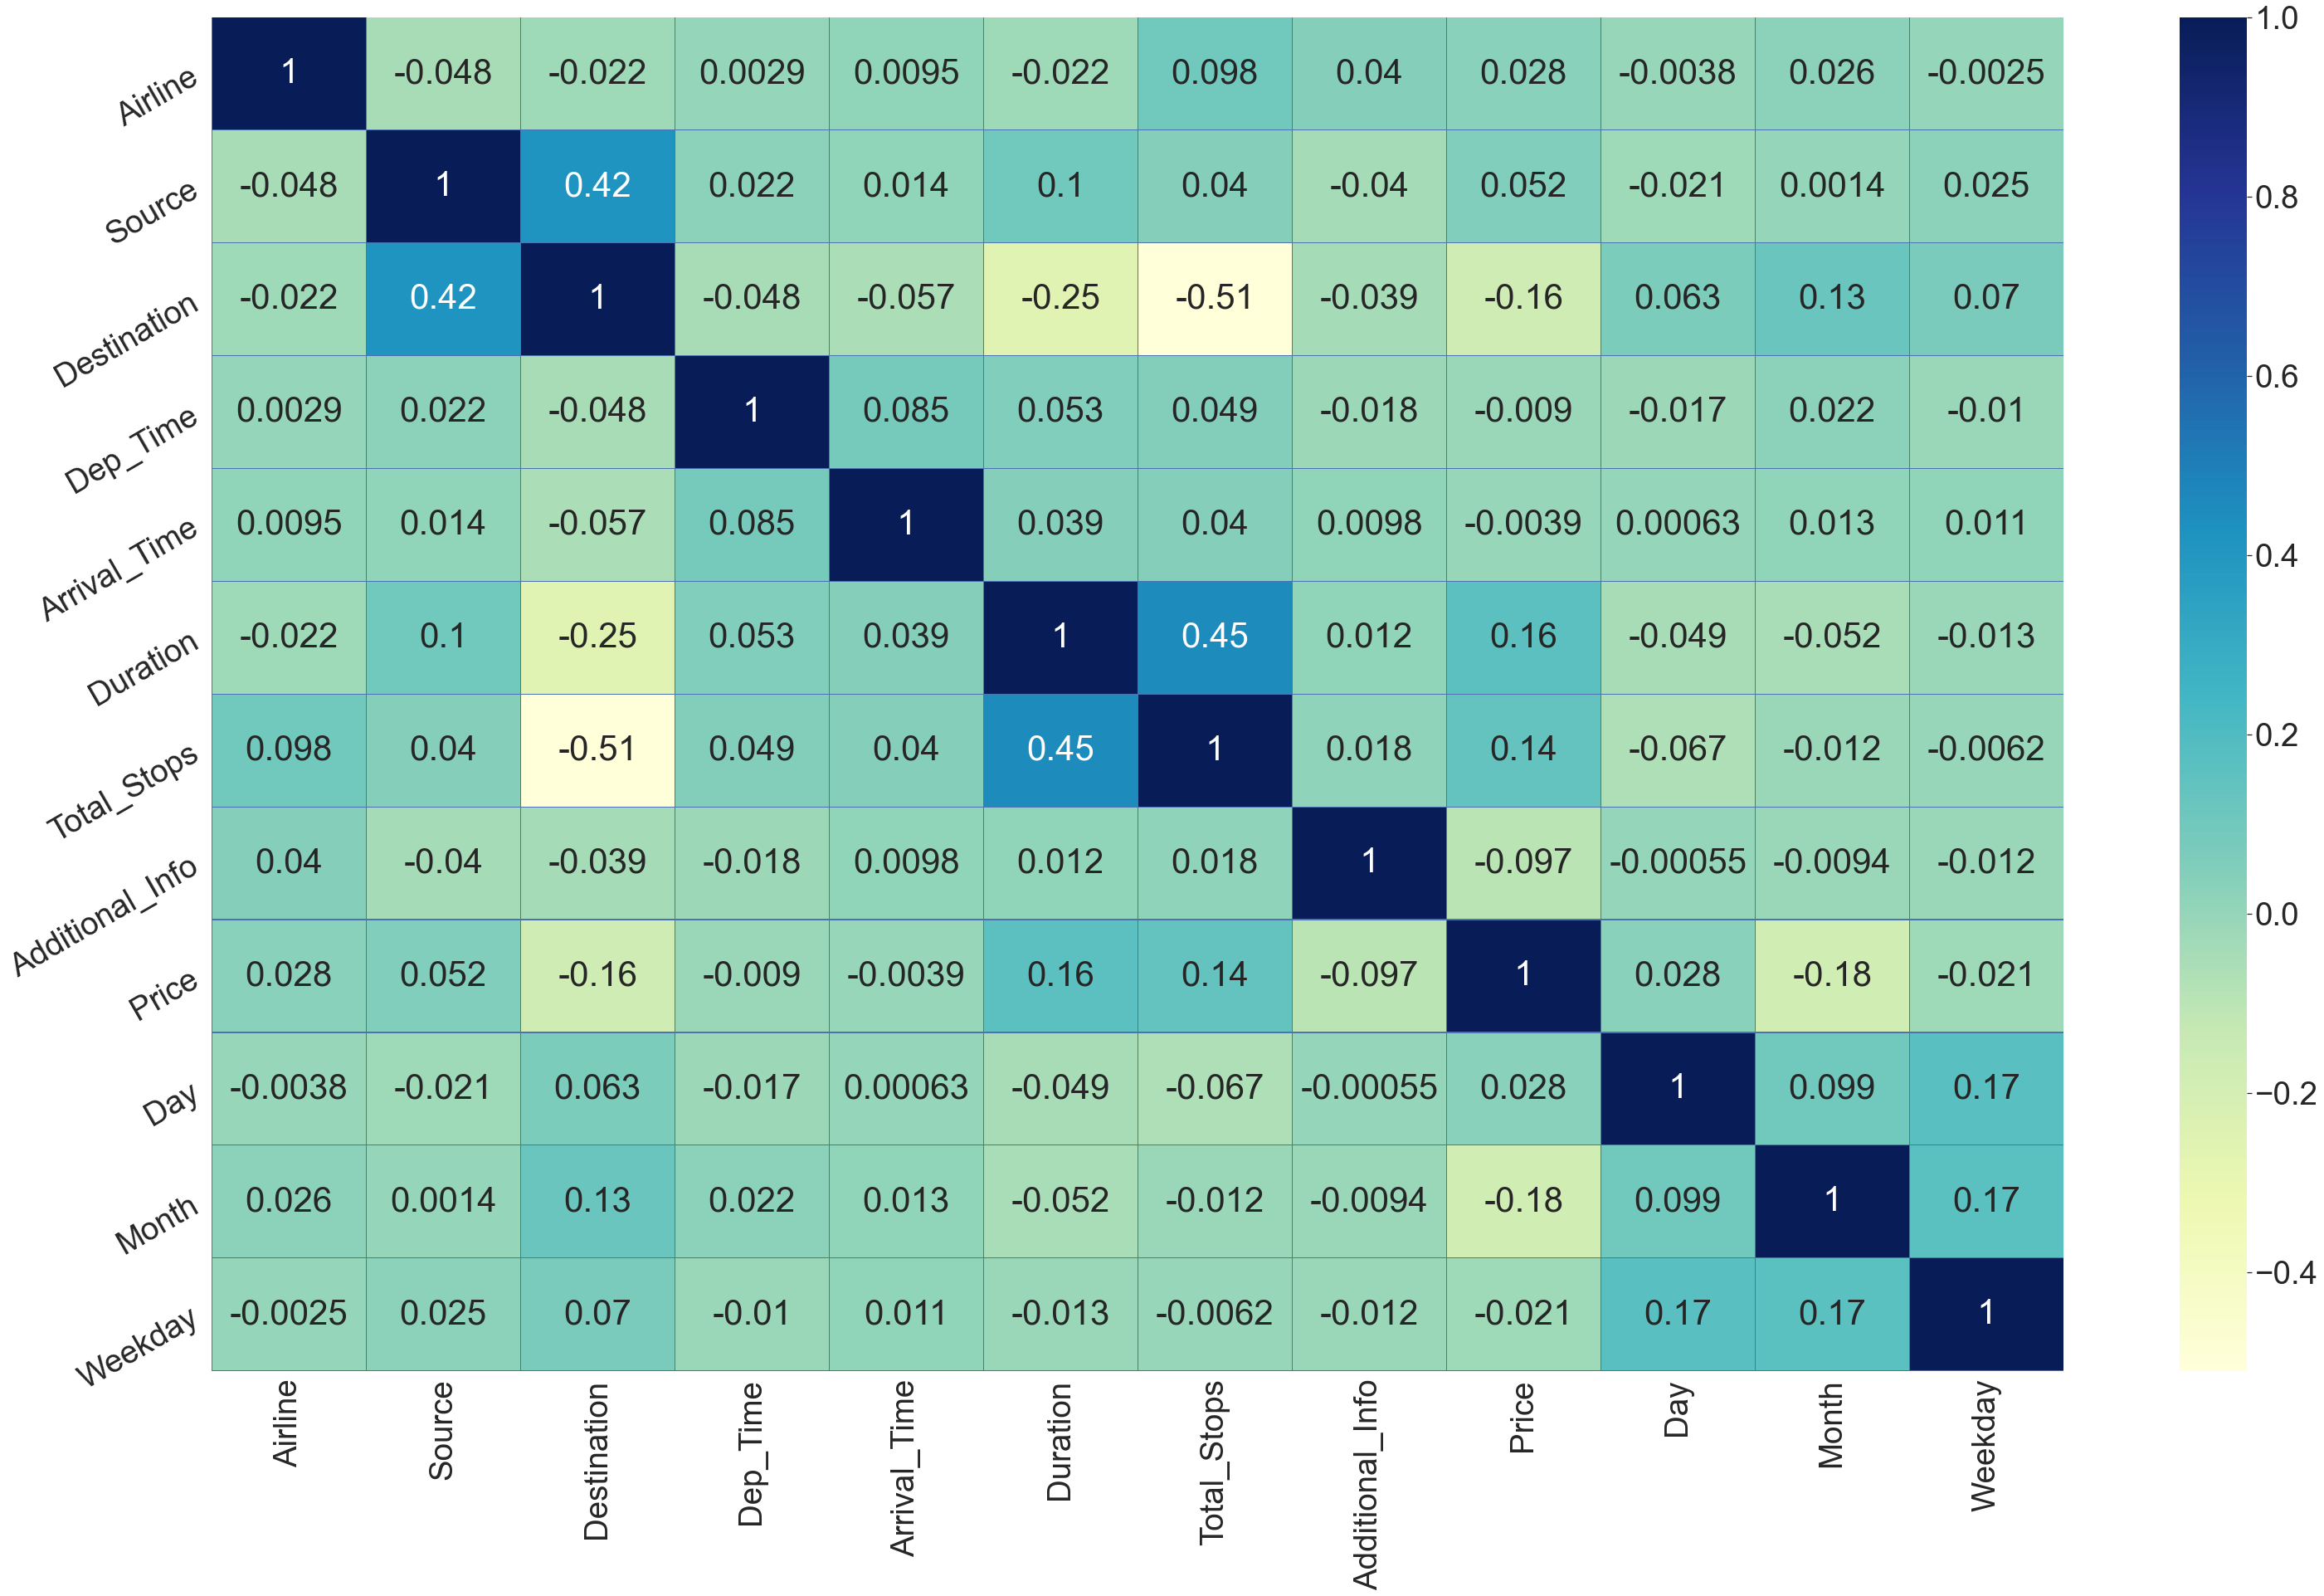

In [102]:
# get correlation between all features ::
sns.set( rc = {"figure.figsize" : [50 , 30]} , font_scale=3.5)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu", annot=True , linecolor="b")
plt.yticks(rotation = 30)


<AxesSubplot:>

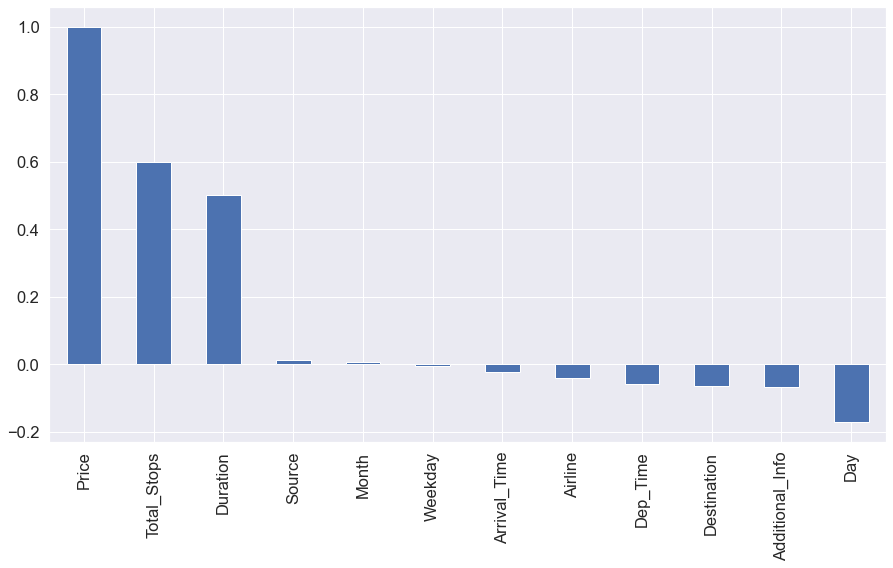

In [103]:
# Get Correlation of "Churn" with other features ::
sns.set( rc = {"figure.figsize" : [30 , 30]} , font_scale=1.5)

plt.figure(figsize=(15,8))
df.corr()['Price'].sort_values(ascending = False).plot(kind='bar'  )

# 3 :: Feture selection ::
***************************************************
* There are multi technices to get the most Correlation Columns with our target.

<p id = "Prepration">Data-Prepration</p>

In [104]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Day', 'Month',
       'Weekday'],
      dtype='object')

In [105]:
# Split data into input and output data
x = df.drop("Price", axis=1 )
y = df["Price"]

In [106]:
x

Airline  Source  Destination  Dep_Time  Arrival_Time  Duration  \
0            3       0            5         3             3       170   
1            1       3            0         2             0       445   
2            4       2            1         2             3      1140   
3            3       3            0         1             3       325   
4            3       0            5         1             3       285   
...        ...     ...          ...       ...           ...       ...   
10678        0       3            0         1             3       150   
10679        1       3            0         1             3       155   
10680        4       0            2         2             0       180   
10681       10       0            5         0             0       160   
10682        1       2            1         2             1       500   

       Total_Stops  Additional_Info  Day  Month  Weekday  
0                0                8   24      3        6  
1                2                8    5      1        5  
2                2                8    6      9        4  
3                1                8    5     12        3  
4                1                8    3      1        3  
...            ...              ...  ...    ...      ...  
10678            0                8    4      9        2  
10679            0                8   27      4        5  
10680            0                8   27      4        5  
10681            0                8    3      1        3  
10682            2                8    5      9        3  

[10373 rows x 11 columns]

In [107]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10373, dtype: int64

In [108]:
# Spliting data into Training and Testing data ::
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , random_state = 20 , test_size=0.2)

In [109]:
#Scalling data ::
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
x_train = scaller.fit_transform(x_train)
x_test  = scaller.transform(x_test)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10373 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10373 non-null  int32
 1   Source           10373 non-null  int32
 2   Destination      10373 non-null  int32
 3   Dep_Time         10373 non-null  int32
 4   Arrival_Time     10373 non-null  int32
 5   Duration         10373 non-null  int32
 6   Total_Stops      10373 non-null  int32
 7   Additional_Info  10373 non-null  int32
 8   Price            10373 non-null  int64
 9   Day              10373 non-null  int64
 10  Month            10373 non-null  int64
 11  Weekday          10373 non-null  int64
dtypes: int32(8), int64(4)
memory usage: 729.4 KB


<p id = "Model">Bulid_ML_Model</p>

# Build Models ::
*************************************
* On that Process we will ::
    * Bulid multi models fror classification problem.
    * Evaluate all models.
    * Select the most efficient model for churn problem.

In [111]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.svm          import SVR
from sklearn.tree         import DecisionTreeRegressor
from sklearn.ensemble     import RandomForestRegressor
from sklearn.neighbors    import KNeighborsRegressor
from xgboost              import XGBRegressor
from sklearn.metrics      import  mean_absolute_error , mean_squared_error , r2_score 


In [112]:
Models = { "Linear_Regressor" : LinearRegression(),
           "Ridge_Regressor"  : Ridge(),
           "Lasso_Regressor"  : Lasso(),
           "SVRegressor"      : SVR(),
           "DTRegressor"      : DecisionTreeRegressor(),
           "RFRegressor"      : RandomForestRegressor(),
           "KNNRegressor"     : KNeighborsRegressor(),
           "XGBRegressor"     : XGBRegressor()
         }

In [113]:
for name , model in Models.items() :
    print(f"The Model :: {name}")
    model.fit(x_train , y_train)
    Train_Score = model.score(x_train , y_train)
    Test_Score  = model.score(x_test , y_test)
    print(f"The Training_Score :: {Train_Score}\nThe Test_Score :: {Test_Score}")
    print("*" *80)

The Model :: Linear_Regressor
The Training_Score :: 0.4138458809359622
The Test_Score :: 0.4452826285458965
********************************************************************************
The Model :: Ridge_Regressor
The Training_Score :: 0.41384587257017436
The Test_Score :: 0.4452854659663982
********************************************************************************
The Model :: Lasso_Regressor
The Training_Score :: 0.41384531989881024
The Test_Score :: 0.445310963287175
********************************************************************************
The Model :: SVRegressor
The Training_Score :: 0.03281320273249866
The Test_Score :: 0.04244363331694967
********************************************************************************
The Model :: DTRegressor
The Training_Score :: 0.9885965471163934
The Test_Score :: 0.7763847167610647
********************************************************************************
The Model :: RFRegressor
The Training_Score :: 0.970136946235475

* Select the Most Efficient Model which have high Performance and Accuracy

In [114]:
XGB_Model = XGBRegressor()
XGB_Model.fit(x_train , y_train)
print(XGB_Model.score(x_train , y_train))
print(XGB_Model.score(x_test , y_test))
print("-" * 80)

0.9577742738629496
0.8904708785598925
--------------------------------------------------------------------------------


<p id = "Evaluation">Evaluate_Model</p>

# Evaluate Model ::
*********************************
* Its one off the most important phase in data scientist life cycle which estimate the performance and accuracy of the model in that problem.

In [115]:
XGB_Model.score(x_train , y_train)

0.9577742738629496

In [116]:
XGB_Model.score(x_test , y_test)

0.8904708785598925

In [117]:
y_pred = XGB_Model.predict(x_test)

In [118]:
MAE = mean_absolute_error(y_test , y_pred  , multioutput="uniform_average")
MSE = mean_squared_error(y_test , y_pred , multioutput="uniform_average")
r2_square = r2_score(y_test , y_pred , multioutput="uniform_average")
print(f"The MAE :: {MAE}\n*************\nThe MSE :: {MSE}\n************\nThe r2_Score :: {r2_square}")

The MAE :: 850.1555511695218
*************
The MSE :: 2147353.7162949424
************
The r2_Score :: 0.8904708785598925


<p id = "Save">Save_Model</p>

In [119]:
import joblib

In [120]:
scaler = joblib.dump(scaller , "scaler.h5")

In [121]:
Model = joblib.dump(XGB_Model , "Model.h5")

<p id = "conclusions">conclusions</p>

# Conclusion ::
*****************************
* On that Step We will ::
  * Input data features.
  * Scaling input data.
  * Predict Flight-Fare-Price .

In [122]:
df.head(2)

Airline  Source  Destination  Dep_Time  Arrival_Time  Duration  \
0        3       0            5         3             3       170   
1        1       3            0         2             0       445   

   Total_Stops  Additional_Info  Price  Day  Month  Weekday  
0            0                8   3897   24      3        6  
1            2                8   7662    5      1        5

In [123]:
x.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Day', 'Month',
       'Weekday'],
      dtype='object')

In [124]:
for col in df.columns :
    print(f"The Col :: ({col})\n\nThe Col _ ({col}) _Unique_values :: {df[col].unique()}\n\n\
The Col _ ({col})_Value_counts :: \n\n{df[col].value_counts()}\n\n-----------\n-----------\n")

The Col :: (Airline)

The Col _ (Airline) _Unique_values :: [ 3  1  4  8  6  2 10  0 11  5  7  9]

The Col _ (Airline)_Value_counts :: 

4     3674
3     1981
1     1695
6     1196
8      815
10     477
0      318
2      194
7       13
5        6
11       3
9        1
Name: Airline, dtype: int64

-----------
-----------

The Col :: (Source)

The Col _ (Source) _Unique_values :: [0 3 2 1 4]

The Col _ (Source)_Value_counts :: 

2    4346
3    2818
0    2145
4     684
1     380
Name: Source, dtype: int64

-----------
-----------

The Col :: (Destination)

The Col _ (Destination) _Unique_values :: [5 0 1 4 2 3]

The Col _ (Destination)_Value_counts :: 

1    4346
0    2818
2    1243
5     902
3     684
4     380
Name: Destination, dtype: int64

-----------
-----------

The Col :: (Dep_Time)

The Col _ (Dep_Time) _Unique_values :: [3 2 1 0]

The Col _ (Dep_Time)_Value_counts :: 

2    4189
1    2760
0    1976
3    1448
Name: Dep_Time, dtype: int64

-----------
-----------

The Col :: (Arri

In [125]:
len(x.columns)

11

In [126]:
custom_data = np.array([3 , 1 , 5 , 2 , 0 ,  170 , 0 , 8 , 25 , 12 , 6 ])

In [127]:
custom_data.shape

(11,)

In [128]:
len(custom_data)

11

In [129]:
custom_data = scaller.transform([custom_data])
custom_data

array([[-0.4155366 , -0.80521041,  2.41227536,  0.53361345, -1.49269758,
        -0.92137489, -1.22345613,  0.49914983,  1.4181884 ,  2.15177586,
         1.69739759]])

In [130]:
prediction = XGB_Model.predict(custom_data)
prediction

array([5475.9487], dtype=float32)